# *Bank Note Analysis*

## *Dataset Information:*

Dataset link (UCI) - https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Dataset link (Kaggle) - https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

## *Attribute Information:*

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) - 0 (non-counterfeit) or 1 (counterfeit)


## *Data Set Characteristics: Multivariate*
 
## *Associated Tasks: Classification*

----------------------------------------------------------------------------------

## *Can we classify banknote as fake or genuine ?*

In [1]:
#!pip install pyforest
from pyforest import * # Importing the libraries we need

In [2]:
lazy_imports() # To check the libraries which are installed

['import re',
 'import sys',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.preprocessing import OneHotEncoder',
 'import bokeh',
 'from sklearn.model_selection import cross_val_score',
 'import imutils',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from xlrd import open_workbook',
 'from sklearn.cluster import KMeans',
 'import datetime as dt',
 'from sklearn.linear_model import ElasticNetCV',
 'import glob',
 'import numpy as np',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from scipy import signal as sg',
 'from sklearn.impute import SimpleImputer',
 'import os',
 'import pandas as pd',
 'import dash',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import awswrangler as wr',
 'import fbprophet',
 'from sklearn.linear

In [3]:
bData = pd.read_csv('BankNote_Authentication.csv') # Loading Dataset
bData.head() # first 5 rows

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bData.shape # Shape of the dataset

(1372, 5)

In [5]:
bData['class'].value_counts() # Checking the target distribution

0    762
1    610
Name: class, dtype: int64

In [6]:
bData.isnull().sum() # Checking Null Values

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
bData.dtypes # Validating Data types

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

## *Visualizations*

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 360x288 with 0 Axes>

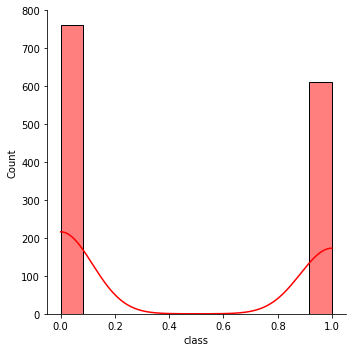

In [8]:
plt.figure(figsize = (5,4))

# Histogram Plot along with KDE
sns.displot(x = bData['class'], kde = True, color = 'red')
plt.show()

<IPython.core.display.Javascript object>

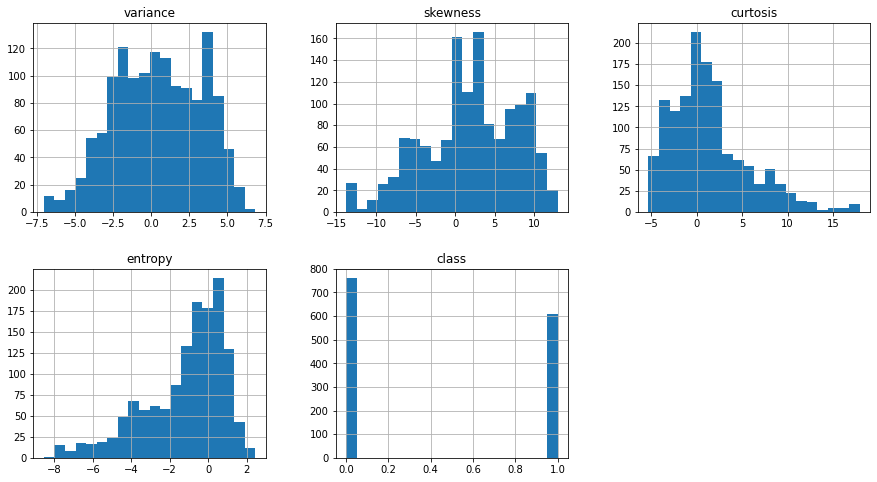

In [9]:
bData.hist(bins = 20,figsize=(15,8),layout=(2,3)) # Histogram for all the features
plt.show()

In [10]:
bData.skew() # Checking the skewness of the features

# variance - not much skewed
# skewness - not much skewed
# curtosis - positively skewed
# entropy - negatively skewed

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

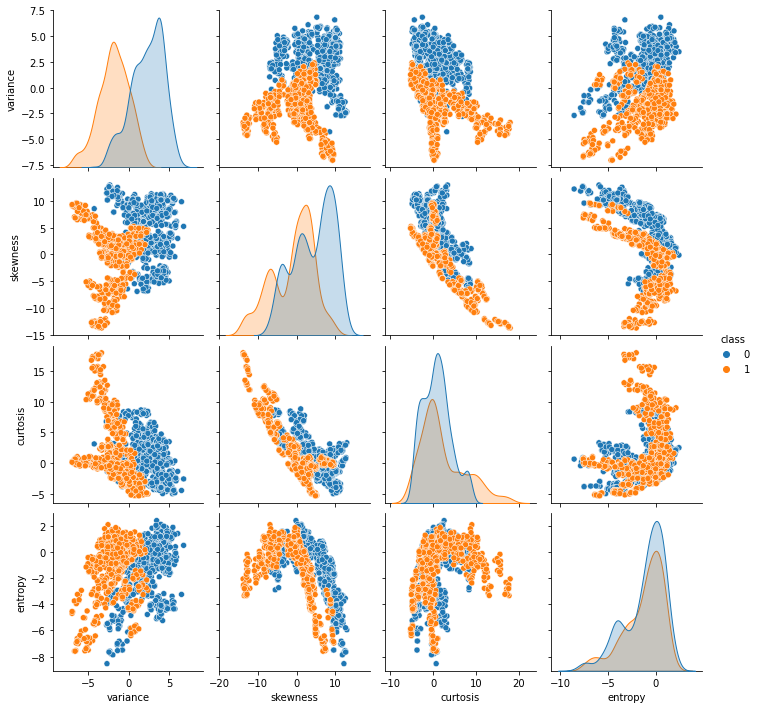

In [11]:
sns.pairplot(bData, hue = 'class') # Visualising with pairplot with only numerical features
plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:>

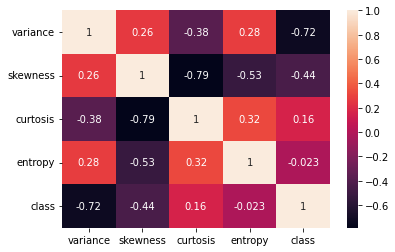

In [12]:
sns.heatmap(bData.corr(), annot = True) # Checking Correlation

# variance is highly negatively correlated with our target
# skewness is highly negatively correlated with curtosis

## *Preparing our data to build our model*

In [13]:
bData.head(2) # Class is out target(dependent) and rest of our features are predictors(independent)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [29]:
# Seperating into predictors and target
y = bData['class'] 
X = bData.drop('class', axis = 1)

In [30]:
X.head(2)

,variance,skewness,curtosis,entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [31]:
y.head(2)

0    0
1    0
Name: class, dtype: int64

In [32]:
# from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20, random_state=0) # Splitting the data into train and test datasets

<IPython.core.display.Javascript object>

In [33]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape) # Checking the train and test datasets shape

(1097, 4) (275, 4) (1097,) (275,)


In [34]:
bData.describe() # Checking the 5 number summary

# The number scale between the predictors are not the same 
# wew might use Euclidean distance which will have an impact and so we need to normalize or standardize the dataset

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [35]:
# from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() # initializing Standard scaler

xtrain = scaler.fit_transform(xtrain) # training and transforming the xtrain data with Standard scaler
xtest = scaler.transform(xtest) # transforming the xtest data with Standard scaler which learnt from xtrain

<IPython.core.display.Javascript object>

In [36]:
xtrain # Checking the standarized xtrain

array([[-0.60234962,  0.13706318, -0.52441296, -0.41116219],
       [-0.291035  ,  0.21026408, -1.02368742, -0.72585061],
       [-0.68266235, -1.4422953 ,  1.02948859,  0.98074362],
       ...,
       [ 0.06363093, -0.15181461, -0.8474923 ,  0.60907164],
       [ 0.5613238 , -0.36784698,  0.89144827,  1.07801487],
       [-0.87706484,  1.54323822,  0.29632752, -1.75475574]])

In [37]:
xtest # Checking the standarized xtest

array([[-0.77000464, -2.18217308,  2.08030018,  0.08130195],
       [ 1.65638872, -0.32963963, -0.24955469,  1.09660204],
       [-0.85562469,  0.31202402, -0.78293531, -1.301957  ],
       ...,
       [-0.90845183,  0.19704581, -0.89473831, -0.59885426],
       [ 0.02407911,  0.29131655, -1.3598972 , -1.26353714],
       [-1.68223069,  0.72303272, -0.19163475, -2.05646189]])

## *LOGISTIC REGRESSION*

In [38]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

In [58]:
lr = LogisticRegression(solver='liblinear',random_state=0) # initializing Logistic Regression
lr.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

lraccuracies = cross_val_score(lr,xtrain,ytrain,cv=10) # To get the accuracies 

print('Accuracy',lraccuracies)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy [0.96363636 0.99090909 0.97272727 0.96363636 0.96363636 0.99090909
 0.95454545 0.99082569 1.         1.        ]


In [59]:
print('Mean Accuracy',np.mean(lraccuracies)) # To get the mean of the accuracies 

<IPython.core.display.Javascript object>

Mean Accuracy 0.9790825688073396


In [60]:
lrypred = lr.predict(xtest) # Predictions

lrypred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, lrypred) # getting the performance between the original and predicted from the test set

0.9890909090909091

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

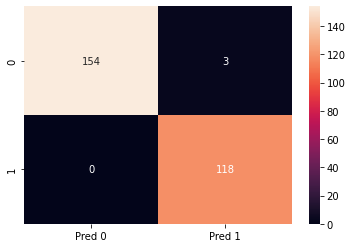

In [62]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(ytest, lrypred, labels = [0,1]), columns = ['Pred 0','Pred 1']), annot=True, fmt = 'g')
# Visualing the comparision between predicted and actual using heamap

In [56]:
# We made 3 false negative errors
# 3 actual notes were predicted to be false

## *SUPPORT VECTOR MACHINES*

In [64]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') # initializing Support vector Classifier with linear

svm.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

svcaccuracies = cross_val_score(svm, xtrain, ytrain, cv = 10)  # To get the accuracies 

print('SVM Accuracy',svcaccuracies) # To get the accuracies 

<IPython.core.display.Javascript object>

SVM Accuracy [0.97272727 0.99090909 0.97272727 0.97272727 0.97272727 0.99090909
 0.96363636 1.         1.         1.        ]


In [66]:
print('SVM Mean Accuracy',svcaccuracies.mean()) # To get the mean of the accuracies 

SVM Mean Accuracy 0.9836363636363636


In [67]:
svcypred = svm.predict(xtest) # Predictions

svcypred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, svcypred) # getting the performance between the original and predicted from the test set

0.9890909090909091

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

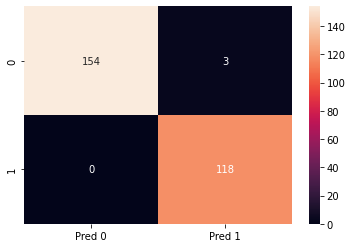

In [69]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(ytest, svcypred, labels = [0,1]), columns = ['Pred 0','Pred 1']), annot=True, fmt = 'g')
# Visualing the comparision between predicted and actual using heamap

In [70]:
# We made 3 false negative errors
# 3 actual notes were predicted to be false

In [71]:
from sklearn.svm import SVC
svmrbf = SVC(kernel='rbf') # initializing Support vector Classifier with rbf

svmrbf.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

svmrbfaccuracies = cross_val_score(svmrbf, xtrain, ytrain, cv = 10)  # To get the accuracies 

print('SVM Accuracy',svmrbfaccuracies) # To get the accuracies 

<IPython.core.display.Javascript object>

SVM Accuracy [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [72]:
print('SVM Mean Accuracy',svmrbfaccuracies.mean()) # To get the mean of the accuracies 

SVM Mean Accuracy 1.0


In [73]:
svmrbfypred = svmrbf.predict(xtest) # Predictions

svmrbfypred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, svmrbfypred) # getting the performance between the original and predicted from the test set

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

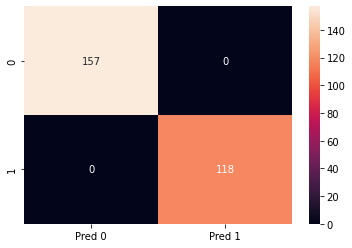

In [75]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(ytest, svmrbfypred, labels = [0,1]), columns = ['Pred 0','Pred 1']), annot=True, fmt = 'g')
# Visualing the comparision between predicted and actual using heamap

In [76]:
# No mistakes with SVC with rbf kernel

## *RANDOM FOREST CLASSIFIER*

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, criterion='entropy') # initializing Random Forest Classifier

rf.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

rfaccuracies = cross_val_score(rf, xtrain, ytrain, cv = 10)  # To get the accuracies 

print('Random Forest Accuracy',rfaccuracies) # To get the accuracies 

<IPython.core.display.Javascript object>

Random Forest Accuracy [0.99090909 0.99090909 0.98181818 0.97272727 0.99090909 1.
 1.         0.99082569 1.         0.98165138]


In [78]:
print('Random Forest Mean Accuracy',rfaccuracies.mean()) # To get the mean of the accuracies 

Random ForestM Mean Accuracy 0.9899749791492912


In [79]:
rfypred = rf.predict(xtest) # Predictions

rfypred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, rfypred) # getting the performance between the original and predicted from the test set

0.9927272727272727

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

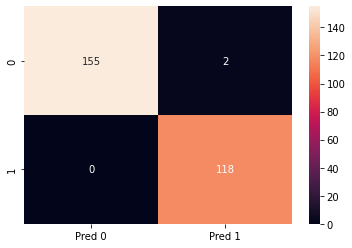

In [81]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(ytest, rfypred, labels = [0,1]), columns = ['Pred 0','Pred 1']), annot=True, fmt = 'g')
# Visualing the comparision between predicted and actual using heamap

In [82]:
# We made 2 false negative errors
# 2 actual notes were predicted to be false

## *K NEAREST CLASSIFIER*

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid ={
    'n_neighbors':[2,5,7,9,11] ,
    'p' : [1,2],
    'leaf_size' :[2,5,7,9,11]
} # Parameters we need to check which will give highest accuracies

gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid) # Initializing Grid Search

gs.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [85]:
gs.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [86]:
knc = KNeighborsClassifier(n_neighbors=2,p = 1,leaf_size = 2) # initializing K Nearest Classifier

knc.fit(xtrain, ytrain) # Fitting the xtrain and ytrain

kncaccuracies = cross_val_score(knc, xtrain, ytrain, cv = 10)  # To get the accuracies 

print('K Nearest Neighbor Accuracy',kncaccuracies) # To get the accuracies 

<IPython.core.display.Javascript object>

K Nearest Neighbor Accuracy [0.99090909 1.         1.         1.         1.         1.
 0.99090909 1.         1.         1.        ]


In [87]:
print('K Nearest Neighbor Mean Accuracy',kncaccuracies.mean()) # To get the mean of the accuracies 

K Nearest Neighbor Mean Accuracy 0.9981818181818183


In [88]:
kncypred = knc.predict(xtest) # Predictions

kncypred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, kncypred) # getting the performance between the original and predicted from the test set

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

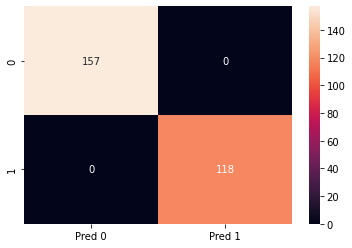

In [90]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(ytest, kncypred, labels = [0,1]), columns = ['Pred 0','Pred 1']), annot=True, fmt = 'g')
# Visualing the comparision between predicted and actual using heamap

In [ ]:
# No mistakes with KNC with GridSearch best parameters

## *MULTILAYER PERCEPTRON*

In [92]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10, random_state=0, tol=0.000000001) 
# initializing MLP Classifier

mlpc.fit(xtrain, ytrain) # Fitting the xtrain and ytrain


Iteration 1, loss = 0.83111316
Iteration 2, loss = 0.82186991
Iteration 3, loss = 0.80974123
Iteration 4, loss = 0.79589139
Iteration 5, loss = 0.78320225
Iteration 6, loss = 0.77093447
Iteration 7, loss = 0.76007838
Iteration 8, loss = 0.75029074
Iteration 9, loss = 0.74151888
Iteration 10, loss = 0.73388339
Iteration 11, loss = 0.72694813
Iteration 12, loss = 0.72093008
Iteration 13, loss = 0.71521377
Iteration 14, loss = 0.71034094
Iteration 15, loss = 0.70563626
Iteration 16, loss = 0.70158675
Iteration 17, loss = 0.69790543
Iteration 18, loss = 0.69452358
Iteration 19, loss = 0.69118397
Iteration 20, loss = 0.68857214
Iteration 21, loss = 0.68585476
Iteration 22, loss = 0.68333535
Iteration 23, loss = 0.68103976
Iteration 24, loss = 0.67896422
Iteration 25, loss = 0.67692751
Iteration 26, loss = 0.67509561
Iteration 27, loss = 0.67339957
Iteration 28, loss = 0.67164966
Iteration 29, loss = 0.67015160
Iteration 30, loss = 0.66860468
Iteration 31, loss = 0.66722947
Iteration 32, los

Iteration 325, loss = 0.16020289
Iteration 326, loss = 0.15958004
Iteration 327, loss = 0.15895465
Iteration 328, loss = 0.15833462
Iteration 329, loss = 0.15772680
Iteration 330, loss = 0.15710980
Iteration 331, loss = 0.15650223
Iteration 332, loss = 0.15591254
Iteration 333, loss = 0.15531342
Iteration 334, loss = 0.15473164
Iteration 335, loss = 0.15414563
Iteration 336, loss = 0.15358113
Iteration 337, loss = 0.15300028
Iteration 338, loss = 0.15243487
Iteration 339, loss = 0.15187440
Iteration 340, loss = 0.15133760
Iteration 341, loss = 0.15077284
Iteration 342, loss = 0.15022309
Iteration 343, loss = 0.14968468
Iteration 344, loss = 0.14914025
Iteration 345, loss = 0.14859485
Iteration 346, loss = 0.14807186
Iteration 347, loss = 0.14754181
Iteration 348, loss = 0.14700239
Iteration 349, loss = 0.14647814
Iteration 350, loss = 0.14596527
Iteration 351, loss = 0.14545120
Iteration 352, loss = 0.14493584
Iteration 353, loss = 0.14442393
Iteration 354, loss = 0.14392079
Iteration 

Iteration 645, loss = 0.07535967
Iteration 646, loss = 0.07524877
Iteration 647, loss = 0.07514200
Iteration 648, loss = 0.07502523
Iteration 649, loss = 0.07491752
Iteration 650, loss = 0.07480381
Iteration 651, loss = 0.07469864
Iteration 652, loss = 0.07459519
Iteration 653, loss = 0.07448377
Iteration 654, loss = 0.07437546
Iteration 655, loss = 0.07426466
Iteration 656, loss = 0.07416256
Iteration 657, loss = 0.07405081
Iteration 658, loss = 0.07394597
Iteration 659, loss = 0.07383632
Iteration 660, loss = 0.07373121
Iteration 661, loss = 0.07363416
Iteration 662, loss = 0.07353123
Iteration 663, loss = 0.07342097
Iteration 664, loss = 0.07331966
Iteration 665, loss = 0.07321671
Iteration 666, loss = 0.07310798
Iteration 667, loss = 0.07300210
Iteration 668, loss = 0.07290723
Iteration 669, loss = 0.07279932
Iteration 670, loss = 0.07269683
Iteration 671, loss = 0.07259411
Iteration 672, loss = 0.07250145
Iteration 673, loss = 0.07239130
Iteration 674, loss = 0.07229127
Iteration 

Iteration 974, loss = 0.05152228
Iteration 975, loss = 0.05147077
Iteration 976, loss = 0.05142892
Iteration 977, loss = 0.05138091
Iteration 978, loss = 0.05133236
Iteration 979, loss = 0.05127605
Iteration 980, loss = 0.05123693
Iteration 981, loss = 0.05118325
Iteration 982, loss = 0.05113498
Iteration 983, loss = 0.05108862
Iteration 984, loss = 0.05104044
Iteration 985, loss = 0.05099313
Iteration 986, loss = 0.05094750
Iteration 987, loss = 0.05090197
Iteration 988, loss = 0.05085235
Iteration 989, loss = 0.05080167
Iteration 990, loss = 0.05075755
Iteration 991, loss = 0.05070785
Iteration 992, loss = 0.05066963
Iteration 993, loss = 0.05061809
Iteration 994, loss = 0.05056904
Iteration 995, loss = 0.05052040
Iteration 996, loss = 0.05047188
Iteration 997, loss = 0.05043121
Iteration 998, loss = 0.05037799
Iteration 999, loss = 0.05033133
Iteration 1000, loss = 0.05029313
Iteration 1001, loss = 0.05024377
Iteration 1002, loss = 0.05018838
Iteration 1003, loss = 0.05014611
Iterat

Iteration 1232, loss = 0.04142284
Iteration 1233, loss = 0.04139424
Iteration 1234, loss = 0.04135890
Iteration 1235, loss = 0.04132978
Iteration 1236, loss = 0.04129405
Iteration 1237, loss = 0.04126440
Iteration 1238, loss = 0.04122809
Iteration 1239, loss = 0.04120165
Iteration 1240, loss = 0.04118507
Iteration 1241, loss = 0.04114077
Iteration 1242, loss = 0.04110213
Iteration 1243, loss = 0.04106904
Iteration 1244, loss = 0.04103867
Iteration 1245, loss = 0.04101391
Iteration 1246, loss = 0.04097852
Iteration 1247, loss = 0.04094612
Iteration 1248, loss = 0.04092606
Iteration 1249, loss = 0.04089375
Iteration 1250, loss = 0.04085706
Iteration 1251, loss = 0.04082412
Iteration 1252, loss = 0.04078851
Iteration 1253, loss = 0.04076704
Iteration 1254, loss = 0.04072696
Iteration 1255, loss = 0.04069902
Iteration 1256, loss = 0.04067595
Iteration 1257, loss = 0.04064142
Iteration 1258, loss = 0.04060861
Iteration 1259, loss = 0.04057990
Iteration 1260, loss = 0.04054550
Iteration 1261

Iteration 1520, loss = 0.03367701
Iteration 1521, loss = 0.03365322
Iteration 1522, loss = 0.03362960
Iteration 1523, loss = 0.03360308
Iteration 1524, loss = 0.03357880
Iteration 1525, loss = 0.03355822
Iteration 1526, loss = 0.03353568
Iteration 1527, loss = 0.03350725
Iteration 1528, loss = 0.03349340
Iteration 1529, loss = 0.03346800
Iteration 1530, loss = 0.03344113
Iteration 1531, loss = 0.03341667
Iteration 1532, loss = 0.03339790
Iteration 1533, loss = 0.03337235
Iteration 1534, loss = 0.03335416
Iteration 1535, loss = 0.03333025
Iteration 1536, loss = 0.03330802
Iteration 1537, loss = 0.03328603
Iteration 1538, loss = 0.03326145
Iteration 1539, loss = 0.03324590
Iteration 1540, loss = 0.03322086
Iteration 1541, loss = 0.03320169
Iteration 1542, loss = 0.03318014
Iteration 1543, loss = 0.03315606
Iteration 1544, loss = 0.03312905
Iteration 1545, loss = 0.03310706
Iteration 1546, loss = 0.03308636
Iteration 1547, loss = 0.03306640
Iteration 1548, loss = 0.03303630
Iteration 1549

Iteration 1770, loss = 0.02851788
Iteration 1771, loss = 0.02849896
Iteration 1772, loss = 0.02848043
Iteration 1773, loss = 0.02845941
Iteration 1774, loss = 0.02844181
Iteration 1775, loss = 0.02843155
Iteration 1776, loss = 0.02840571
Iteration 1777, loss = 0.02839106
Iteration 1778, loss = 0.02837302
Iteration 1779, loss = 0.02834871
Iteration 1780, loss = 0.02833254
Iteration 1781, loss = 0.02832170
Iteration 1782, loss = 0.02829742
Iteration 1783, loss = 0.02828392
Iteration 1784, loss = 0.02825703
Iteration 1785, loss = 0.02823305
Iteration 1786, loss = 0.02821475
Iteration 1787, loss = 0.02820848
Iteration 1788, loss = 0.02817986
Iteration 1789, loss = 0.02816110
Iteration 1790, loss = 0.02814464
Iteration 1791, loss = 0.02812379
Iteration 1792, loss = 0.02810705
Iteration 1793, loss = 0.02809723
Iteration 1794, loss = 0.02806845
Iteration 1795, loss = 0.02805045
Iteration 1796, loss = 0.02803231
Iteration 1797, loss = 0.02801788
Iteration 1798, loss = 0.02800645
Iteration 1799

Iteration 2027, loss = 0.02413064
Iteration 2028, loss = 0.02411741
Iteration 2029, loss = 0.02409644
Iteration 2030, loss = 0.02408302
Iteration 2031, loss = 0.02407016
Iteration 2032, loss = 0.02404811
Iteration 2033, loss = 0.02403719
Iteration 2034, loss = 0.02402733
Iteration 2035, loss = 0.02401021
Iteration 2036, loss = 0.02398733
Iteration 2037, loss = 0.02397167
Iteration 2038, loss = 0.02395998
Iteration 2039, loss = 0.02394272
Iteration 2040, loss = 0.02392723
Iteration 2041, loss = 0.02391247
Iteration 2042, loss = 0.02389705
Iteration 2043, loss = 0.02388008
Iteration 2044, loss = 0.02387042
Iteration 2045, loss = 0.02385141
Iteration 2046, loss = 0.02383657
Iteration 2047, loss = 0.02382056
Iteration 2048, loss = 0.02381295
Iteration 2049, loss = 0.02378584
Iteration 2050, loss = 0.02377248
Iteration 2051, loss = 0.02375564
Iteration 2052, loss = 0.02374321
Iteration 2053, loss = 0.02373042
Iteration 2054, loss = 0.02371110
Iteration 2055, loss = 0.02369567
Iteration 2056

Iteration 2275, loss = 0.02058467
Iteration 2276, loss = 0.02056815
Iteration 2277, loss = 0.02055431
Iteration 2278, loss = 0.02054145
Iteration 2279, loss = 0.02052757
Iteration 2280, loss = 0.02051352
Iteration 2281, loss = 0.02050010
Iteration 2282, loss = 0.02048819
Iteration 2283, loss = 0.02047401
Iteration 2284, loss = 0.02046260
Iteration 2285, loss = 0.02045403
Iteration 2286, loss = 0.02043606
Iteration 2287, loss = 0.02042282
Iteration 2288, loss = 0.02040992
Iteration 2289, loss = 0.02039763
Iteration 2290, loss = 0.02038470
Iteration 2291, loss = 0.02036935
Iteration 2292, loss = 0.02035498
Iteration 2293, loss = 0.02034245
Iteration 2294, loss = 0.02033078
Iteration 2295, loss = 0.02031841
Iteration 2296, loss = 0.02031188
Iteration 2297, loss = 0.02029274
Iteration 2298, loss = 0.02027897
Iteration 2299, loss = 0.02027024
Iteration 2300, loss = 0.02025222
Iteration 2301, loss = 0.02024375
Iteration 2302, loss = 0.02022825
Iteration 2303, loss = 0.02021890
Iteration 2304

Iteration 2527, loss = 0.01752608
Iteration 2528, loss = 0.01751435
Iteration 2529, loss = 0.01750348
Iteration 2530, loss = 0.01749387
Iteration 2531, loss = 0.01748164
Iteration 2532, loss = 0.01747171
Iteration 2533, loss = 0.01745969
Iteration 2534, loss = 0.01744874
Iteration 2535, loss = 0.01743814
Iteration 2536, loss = 0.01742931
Iteration 2537, loss = 0.01741362
Iteration 2538, loss = 0.01740419
Iteration 2539, loss = 0.01739369
Iteration 2540, loss = 0.01738044
Iteration 2541, loss = 0.01737022
Iteration 2542, loss = 0.01735988
Iteration 2543, loss = 0.01735005
Iteration 2544, loss = 0.01734095
Iteration 2545, loss = 0.01732732
Iteration 2546, loss = 0.01731973
Iteration 2547, loss = 0.01730574
Iteration 2548, loss = 0.01729946
Iteration 2549, loss = 0.01728714
Iteration 2550, loss = 0.01727513
Iteration 2551, loss = 0.01726278
Iteration 2552, loss = 0.01725239
Iteration 2553, loss = 0.01724547
Iteration 2554, loss = 0.01723171
Iteration 2555, loss = 0.01722090
Iteration 2556

Iteration 2775, loss = 0.01507724
Iteration 2776, loss = 0.01507089
Iteration 2777, loss = 0.01506013
Iteration 2778, loss = 0.01505311
Iteration 2779, loss = 0.01504279
Iteration 2780, loss = 0.01503210
Iteration 2781, loss = 0.01502658
Iteration 2782, loss = 0.01501591
Iteration 2783, loss = 0.01500577
Iteration 2784, loss = 0.01499884
Iteration 2785, loss = 0.01498861
Iteration 2786, loss = 0.01498015
Iteration 2787, loss = 0.01497032
Iteration 2788, loss = 0.01496351
Iteration 2789, loss = 0.01495457
Iteration 2790, loss = 0.01494836
Iteration 2791, loss = 0.01493767
Iteration 2792, loss = 0.01492710
Iteration 2793, loss = 0.01491929
Iteration 2794, loss = 0.01491037
Iteration 2795, loss = 0.01490282
Iteration 2796, loss = 0.01489245
Iteration 2797, loss = 0.01488483
Iteration 2798, loss = 0.01487742
Iteration 2799, loss = 0.01486709
Iteration 2800, loss = 0.01486036
Iteration 2801, loss = 0.01485049
Iteration 2802, loss = 0.01484324
Iteration 2803, loss = 0.01483447
Iteration 2804

Iteration 3030, loss = 0.01305980
Iteration 3031, loss = 0.01305315
Iteration 3032, loss = 0.01304317
Iteration 3033, loss = 0.01303761
Iteration 3034, loss = 0.01303054
Iteration 3035, loss = 0.01302758
Iteration 3036, loss = 0.01301579
Iteration 3037, loss = 0.01300776
Iteration 3038, loss = 0.01300338
Iteration 3039, loss = 0.01299584
Iteration 3040, loss = 0.01298981
Iteration 3041, loss = 0.01298139
Iteration 3042, loss = 0.01297613
Iteration 3043, loss = 0.01296869
Iteration 3044, loss = 0.01296253
Iteration 3045, loss = 0.01295435
Iteration 3046, loss = 0.01294815
Iteration 3047, loss = 0.01294009
Iteration 3048, loss = 0.01293450
Iteration 3049, loss = 0.01292835
Iteration 3050, loss = 0.01291778
Iteration 3051, loss = 0.01291246
Iteration 3052, loss = 0.01290730
Iteration 3053, loss = 0.01289996
Iteration 3054, loss = 0.01289559
Iteration 3055, loss = 0.01288253
Iteration 3056, loss = 0.01287999
Iteration 3057, loss = 0.01287062
Iteration 3058, loss = 0.01286552
Iteration 3059

Iteration 3285, loss = 0.01145153
Iteration 3286, loss = 0.01144219
Iteration 3287, loss = 0.01143806
Iteration 3288, loss = 0.01143186
Iteration 3289, loss = 0.01142680
Iteration 3290, loss = 0.01142331
Iteration 3291, loss = 0.01141578
Iteration 3292, loss = 0.01140978
Iteration 3293, loss = 0.01140392
Iteration 3294, loss = 0.01139862
Iteration 3295, loss = 0.01139273
Iteration 3296, loss = 0.01138764
Iteration 3297, loss = 0.01138164
Iteration 3298, loss = 0.01137909
Iteration 3299, loss = 0.01137102
Iteration 3300, loss = 0.01136505
Iteration 3301, loss = 0.01135996
Iteration 3302, loss = 0.01135389
Iteration 3303, loss = 0.01134866
Iteration 3304, loss = 0.01134368
Iteration 3305, loss = 0.01133828
Iteration 3306, loss = 0.01133536
Iteration 3307, loss = 0.01132618
Iteration 3308, loss = 0.01132391
Iteration 3309, loss = 0.01131488
Iteration 3310, loss = 0.01131065
Iteration 3311, loss = 0.01130352
Iteration 3312, loss = 0.01129845
Iteration 3313, loss = 0.01129331
Iteration 3314

Iteration 3596, loss = 0.00990489
Iteration 3597, loss = 0.00990085
Iteration 3598, loss = 0.00989649
Iteration 3599, loss = 0.00989331
Iteration 3600, loss = 0.00988813
Iteration 3601, loss = 0.00988401
Iteration 3602, loss = 0.00987869
Iteration 3603, loss = 0.00987391
Iteration 3604, loss = 0.00987150
Iteration 3605, loss = 0.00986606
Iteration 3606, loss = 0.00986172
Iteration 3607, loss = 0.00985719
Iteration 3608, loss = 0.00985237
Iteration 3609, loss = 0.00984972
Iteration 3610, loss = 0.00984464
Iteration 3611, loss = 0.00983978
Iteration 3612, loss = 0.00983598
Iteration 3613, loss = 0.00983118
Iteration 3614, loss = 0.00982751
Iteration 3615, loss = 0.00982305
Iteration 3616, loss = 0.00982042
Iteration 3617, loss = 0.00981593
Iteration 3618, loss = 0.00980956
Iteration 3619, loss = 0.00980617
Iteration 3620, loss = 0.00980073
Iteration 3621, loss = 0.00979645
Iteration 3622, loss = 0.00979264
Iteration 3623, loss = 0.00978816
Iteration 3624, loss = 0.00978379
Iteration 3625

Iteration 3917, loss = 0.00866725
Iteration 3918, loss = 0.00866346
Iteration 3919, loss = 0.00865979
Iteration 3920, loss = 0.00865603
Iteration 3921, loss = 0.00865289
Iteration 3922, loss = 0.00864909
Iteration 3923, loss = 0.00864581
Iteration 3924, loss = 0.00864337
Iteration 3925, loss = 0.00863932
Iteration 3926, loss = 0.00863545
Iteration 3927, loss = 0.00863245
Iteration 3928, loss = 0.00862877
Iteration 3929, loss = 0.00862647
Iteration 3930, loss = 0.00862304
Iteration 3931, loss = 0.00861878
Iteration 3932, loss = 0.00861694
Iteration 3933, loss = 0.00861284
Iteration 3934, loss = 0.00860882
Iteration 3935, loss = 0.00860521
Iteration 3936, loss = 0.00860232
Iteration 3937, loss = 0.00859882
Iteration 3938, loss = 0.00859589
Iteration 3939, loss = 0.00859230
Iteration 3940, loss = 0.00858901
Iteration 3941, loss = 0.00858564
Iteration 3942, loss = 0.00858281
Iteration 3943, loss = 0.00857950
Iteration 3944, loss = 0.00857648
Iteration 3945, loss = 0.00857200
Iteration 3946

Iteration 4158, loss = 0.00791299
Iteration 4159, loss = 0.00790990
Iteration 4160, loss = 0.00790746
Iteration 4161, loss = 0.00790497
Iteration 4162, loss = 0.00790030
Iteration 4163, loss = 0.00789743
Iteration 4164, loss = 0.00789556
Iteration 4165, loss = 0.00789239
Iteration 4166, loss = 0.00788878
Iteration 4167, loss = 0.00788631
Iteration 4168, loss = 0.00788367
Iteration 4169, loss = 0.00788199
Iteration 4170, loss = 0.00787879
Iteration 4171, loss = 0.00787541
Iteration 4172, loss = 0.00787250
Iteration 4173, loss = 0.00786985
Iteration 4174, loss = 0.00786717
Iteration 4175, loss = 0.00786411
Iteration 4176, loss = 0.00786100
Iteration 4177, loss = 0.00785846
Iteration 4178, loss = 0.00785610
Iteration 4179, loss = 0.00785264
Iteration 4180, loss = 0.00784978
Iteration 4181, loss = 0.00784724
Iteration 4182, loss = 0.00784409
Iteration 4183, loss = 0.00784153
Iteration 4184, loss = 0.00783864
Iteration 4185, loss = 0.00783559
Iteration 4186, loss = 0.00783296
Iteration 4187

Iteration 4414, loss = 0.00723996
Iteration 4415, loss = 0.00723748
Iteration 4416, loss = 0.00723527
Iteration 4417, loss = 0.00723307
Iteration 4418, loss = 0.00723058
Iteration 4419, loss = 0.00722934
Iteration 4420, loss = 0.00722522
Iteration 4421, loss = 0.00722296
Iteration 4422, loss = 0.00722131
Iteration 4423, loss = 0.00721843
Iteration 4424, loss = 0.00721597
Iteration 4425, loss = 0.00721425
Iteration 4426, loss = 0.00721096
Iteration 4427, loss = 0.00720875
Iteration 4428, loss = 0.00720585
Iteration 4429, loss = 0.00720361
Iteration 4430, loss = 0.00720136
Iteration 4431, loss = 0.00719917
Iteration 4432, loss = 0.00719688
Iteration 4433, loss = 0.00719477
Iteration 4434, loss = 0.00719208
Iteration 4435, loss = 0.00719024
Iteration 4436, loss = 0.00718849
Iteration 4437, loss = 0.00718573
Iteration 4438, loss = 0.00718333
Iteration 4439, loss = 0.00718060
Iteration 4440, loss = 0.00717804
Iteration 4441, loss = 0.00717549
Iteration 4442, loss = 0.00717295
Iteration 4443

Iteration 4737, loss = 0.00653852
Iteration 4738, loss = 0.00653647
Iteration 4739, loss = 0.00653438
Iteration 4740, loss = 0.00653248
Iteration 4741, loss = 0.00653055
Iteration 4742, loss = 0.00652891
Iteration 4743, loss = 0.00652663
Iteration 4744, loss = 0.00652506
Iteration 4745, loss = 0.00652267
Iteration 4746, loss = 0.00652094
Iteration 4747, loss = 0.00651972
Iteration 4748, loss = 0.00651684
Iteration 4749, loss = 0.00651527
Iteration 4750, loss = 0.00651337
Iteration 4751, loss = 0.00651125
Iteration 4752, loss = 0.00650931
Iteration 4753, loss = 0.00650702
Iteration 4754, loss = 0.00650549
Iteration 4755, loss = 0.00650339
Iteration 4756, loss = 0.00650145
Iteration 4757, loss = 0.00649931
Iteration 4758, loss = 0.00649724
Iteration 4759, loss = 0.00649599
Iteration 4760, loss = 0.00649352
Iteration 4761, loss = 0.00649142
Iteration 4762, loss = 0.00648969
Iteration 4763, loss = 0.00648782
Iteration 4764, loss = 0.00648628
Iteration 4765, loss = 0.00648386
Iteration 4766

Iteration 4979, loss = 0.00609576
Iteration 4980, loss = 0.00609394
Iteration 4981, loss = 0.00609216
Iteration 4982, loss = 0.00609056
Iteration 4983, loss = 0.00608878
Iteration 4984, loss = 0.00608723
Iteration 4985, loss = 0.00608548
Iteration 4986, loss = 0.00608374
Iteration 4987, loss = 0.00608176
Iteration 4988, loss = 0.00607995
Iteration 4989, loss = 0.00607852
Iteration 4990, loss = 0.00607682
Iteration 4991, loss = 0.00607528
Iteration 4992, loss = 0.00607357
Iteration 4993, loss = 0.00607159
Iteration 4994, loss = 0.00607001
Iteration 4995, loss = 0.00606822
Iteration 4996, loss = 0.00606649
Iteration 4997, loss = 0.00606462
Iteration 4998, loss = 0.00606285
Iteration 4999, loss = 0.00606093
Iteration 5000, loss = 0.00606049
Iteration 5001, loss = 0.00605791
Iteration 5002, loss = 0.00605620
Iteration 5003, loss = 0.00605516
Iteration 5004, loss = 0.00605322
Iteration 5005, loss = 0.00605164
Iteration 5006, loss = 0.00604969
Iteration 5007, loss = 0.00604800
Iteration 5008

Iteration 5221, loss = 0.00570775
Iteration 5222, loss = 0.00570584
Iteration 5223, loss = 0.00570440
Iteration 5224, loss = 0.00570320
Iteration 5225, loss = 0.00570144
Iteration 5226, loss = 0.00569968
Iteration 5227, loss = 0.00569840
Iteration 5228, loss = 0.00569713
Iteration 5229, loss = 0.00569557
Iteration 5230, loss = 0.00569391
Iteration 5231, loss = 0.00569241
Iteration 5232, loss = 0.00569111
Iteration 5233, loss = 0.00568958
Iteration 5234, loss = 0.00568792
Iteration 5235, loss = 0.00568661
Iteration 5236, loss = 0.00568504
Iteration 5237, loss = 0.00568380
Iteration 5238, loss = 0.00568227
Iteration 5239, loss = 0.00568059
Iteration 5240, loss = 0.00567906
Iteration 5241, loss = 0.00567791
Iteration 5242, loss = 0.00567648
Iteration 5243, loss = 0.00567463
Iteration 5244, loss = 0.00567311
Iteration 5245, loss = 0.00567168
Iteration 5246, loss = 0.00567009
Iteration 5247, loss = 0.00566863
Iteration 5248, loss = 0.00566698
Iteration 5249, loss = 0.00566583
Iteration 5250

Iteration 5534, loss = 0.00527045
Iteration 5535, loss = 0.00526913
Iteration 5536, loss = 0.00526780
Iteration 5537, loss = 0.00526693
Iteration 5538, loss = 0.00526522
Iteration 5539, loss = 0.00526426
Iteration 5540, loss = 0.00526324
Iteration 5541, loss = 0.00526155
Iteration 5542, loss = 0.00526051
Iteration 5543, loss = 0.00525914
Iteration 5544, loss = 0.00525795
Iteration 5545, loss = 0.00525633
Iteration 5546, loss = 0.00525507
Iteration 5547, loss = 0.00525375
Iteration 5548, loss = 0.00525273
Iteration 5549, loss = 0.00525143
Iteration 5550, loss = 0.00525034
Iteration 5551, loss = 0.00524867
Iteration 5552, loss = 0.00524761
Iteration 5553, loss = 0.00524634
Iteration 5554, loss = 0.00524458
Iteration 5555, loss = 0.00524438
Iteration 5556, loss = 0.00524203
Iteration 5557, loss = 0.00524106
Iteration 5558, loss = 0.00524002
Iteration 5559, loss = 0.00523854
Iteration 5560, loss = 0.00523685
Iteration 5561, loss = 0.00523584
Iteration 5562, loss = 0.00523483
Iteration 5563

Iteration 5778, loss = 0.00497186
Iteration 5779, loss = 0.00497082
Iteration 5780, loss = 0.00496957
Iteration 5781, loss = 0.00496839
Iteration 5782, loss = 0.00496715
Iteration 5783, loss = 0.00496618
Iteration 5784, loss = 0.00496493
Iteration 5785, loss = 0.00496379
Iteration 5786, loss = 0.00496260
Iteration 5787, loss = 0.00496156
Iteration 5788, loss = 0.00496029
Iteration 5789, loss = 0.00495957
Iteration 5790, loss = 0.00495798
Iteration 5791, loss = 0.00495730
Iteration 5792, loss = 0.00495582
Iteration 5793, loss = 0.00495455
Iteration 5794, loss = 0.00495364
Iteration 5795, loss = 0.00495246
Iteration 5796, loss = 0.00495156
Iteration 5797, loss = 0.00495045
Iteration 5798, loss = 0.00494922
Iteration 5799, loss = 0.00494785
Iteration 5800, loss = 0.00494673
Iteration 5801, loss = 0.00494558
Iteration 5802, loss = 0.00494431
Iteration 5803, loss = 0.00494334
Iteration 5804, loss = 0.00494255
Iteration 5805, loss = 0.00494099
Iteration 5806, loss = 0.00493985
Iteration 5807

Iteration 6104, loss = 0.00462100
Iteration 6105, loss = 0.00462002
Iteration 6106, loss = 0.00461903
Iteration 6107, loss = 0.00461806
Iteration 6108, loss = 0.00461699
Iteration 6109, loss = 0.00461611
Iteration 6110, loss = 0.00461496
Iteration 6111, loss = 0.00461384
Iteration 6112, loss = 0.00461307
Iteration 6113, loss = 0.00461189
Iteration 6114, loss = 0.00461098
Iteration 6115, loss = 0.00460997
Iteration 6116, loss = 0.00460911
Iteration 6117, loss = 0.00460788
Iteration 6118, loss = 0.00460695
Iteration 6119, loss = 0.00460589
Iteration 6120, loss = 0.00460493
Iteration 6121, loss = 0.00460404
Iteration 6122, loss = 0.00460314
Iteration 6123, loss = 0.00460201
Iteration 6124, loss = 0.00460094
Iteration 6125, loss = 0.00460022
Iteration 6126, loss = 0.00459909
Iteration 6127, loss = 0.00459793
Iteration 6128, loss = 0.00459692
Iteration 6129, loss = 0.00459627
Iteration 6130, loss = 0.00459520
Iteration 6131, loss = 0.00459417
Iteration 6132, loss = 0.00459302
Iteration 6133

Iteration 6346, loss = 0.00438963
Iteration 6347, loss = 0.00438884
Iteration 6348, loss = 0.00438792
Iteration 6349, loss = 0.00438725
Iteration 6350, loss = 0.00438616
Iteration 6351, loss = 0.00438511
Iteration 6352, loss = 0.00438438
Iteration 6353, loss = 0.00438334
Iteration 6354, loss = 0.00438258
Iteration 6355, loss = 0.00438146
Iteration 6356, loss = 0.00438055
Iteration 6357, loss = 0.00437984
Iteration 6358, loss = 0.00437883
Iteration 6359, loss = 0.00437801
Iteration 6360, loss = 0.00437719
Iteration 6361, loss = 0.00437617
Iteration 6362, loss = 0.00437532
Iteration 6363, loss = 0.00437430
Iteration 6364, loss = 0.00437349
Iteration 6365, loss = 0.00437256
Iteration 6366, loss = 0.00437187
Iteration 6367, loss = 0.00437077
Iteration 6368, loss = 0.00436995
Iteration 6369, loss = 0.00436911
Iteration 6370, loss = 0.00436811
Iteration 6371, loss = 0.00436726
Iteration 6372, loss = 0.00436627
Iteration 6373, loss = 0.00436530
Iteration 6374, loss = 0.00436466
Iteration 6375

Iteration 6664, loss = 0.00411876
Iteration 6665, loss = 0.00411801
Iteration 6666, loss = 0.00411724
Iteration 6667, loss = 0.00411631
Iteration 6668, loss = 0.00411554
Iteration 6669, loss = 0.00411477
Iteration 6670, loss = 0.00411407
Iteration 6671, loss = 0.00411327
Iteration 6672, loss = 0.00411247
Iteration 6673, loss = 0.00411153
Iteration 6674, loss = 0.00411076
Iteration 6675, loss = 0.00411010
Iteration 6676, loss = 0.00410949
Iteration 6677, loss = 0.00410842
Iteration 6678, loss = 0.00410769
Iteration 6679, loss = 0.00410706
Iteration 6680, loss = 0.00410609
Iteration 6681, loss = 0.00410527
Iteration 6682, loss = 0.00410459
Iteration 6683, loss = 0.00410376
Iteration 6684, loss = 0.00410305
Iteration 6685, loss = 0.00410223
Iteration 6686, loss = 0.00410130
Iteration 6687, loss = 0.00410060
Iteration 6688, loss = 0.00409986
Iteration 6689, loss = 0.00409919
Iteration 6690, loss = 0.00409840
Iteration 6691, loss = 0.00409732
Iteration 6692, loss = 0.00409671
Iteration 6693

Iteration 6983, loss = 0.00387810
Iteration 6984, loss = 0.00387743
Iteration 6985, loss = 0.00387650
Iteration 6986, loss = 0.00387599
Iteration 6987, loss = 0.00387535
Iteration 6988, loss = 0.00387454
Iteration 6989, loss = 0.00387379
Iteration 6990, loss = 0.00387314
Iteration 6991, loss = 0.00387236
Iteration 6992, loss = 0.00387169
Iteration 6993, loss = 0.00387095
Iteration 6994, loss = 0.00387023
Iteration 6995, loss = 0.00386949
Iteration 6996, loss = 0.00386878
Iteration 6997, loss = 0.00386814
Iteration 6998, loss = 0.00386738
Iteration 6999, loss = 0.00386668
Iteration 7000, loss = 0.00386605
Iteration 7001, loss = 0.00386521
Iteration 7002, loss = 0.00386450
Iteration 7003, loss = 0.00386380
Iteration 7004, loss = 0.00386307
Iteration 7005, loss = 0.00386239
Iteration 7006, loss = 0.00386174
Iteration 7007, loss = 0.00386104
Iteration 7008, loss = 0.00386044
Iteration 7009, loss = 0.00385980
Iteration 7010, loss = 0.00385894
Iteration 7011, loss = 0.00385819
Iteration 7012

Iteration 7225, loss = 0.00371301
Iteration 7226, loss = 0.00371235
Iteration 7227, loss = 0.00371167
Iteration 7228, loss = 0.00371103
Iteration 7229, loss = 0.00371042
Iteration 7230, loss = 0.00370978
Iteration 7231, loss = 0.00370907
Iteration 7232, loss = 0.00370838
Iteration 7233, loss = 0.00370770
Iteration 7234, loss = 0.00370712
Iteration 7235, loss = 0.00370640
Iteration 7236, loss = 0.00370596
Iteration 7237, loss = 0.00370528
Iteration 7238, loss = 0.00370461
Iteration 7239, loss = 0.00370383
Iteration 7240, loss = 0.00370323
Iteration 7241, loss = 0.00370259
Iteration 7242, loss = 0.00370184
Iteration 7243, loss = 0.00370123
Iteration 7244, loss = 0.00370055
Iteration 7245, loss = 0.00369996
Iteration 7246, loss = 0.00369920
Iteration 7247, loss = 0.00369858
Iteration 7248, loss = 0.00369794
Iteration 7249, loss = 0.00369738
Iteration 7250, loss = 0.00369663
Iteration 7251, loss = 0.00369607
Iteration 7252, loss = 0.00369545
Iteration 7253, loss = 0.00369482
Iteration 7254

Iteration 7544, loss = 0.00351505
Iteration 7545, loss = 0.00351445
Iteration 7546, loss = 0.00351381
Iteration 7547, loss = 0.00351334
Iteration 7548, loss = 0.00351257
Iteration 7549, loss = 0.00351203
Iteration 7550, loss = 0.00351154
Iteration 7551, loss = 0.00351088
Iteration 7552, loss = 0.00351025
Iteration 7553, loss = 0.00350972
Iteration 7554, loss = 0.00350917
Iteration 7555, loss = 0.00350853
Iteration 7556, loss = 0.00350802
Iteration 7557, loss = 0.00350737
Iteration 7558, loss = 0.00350686
Iteration 7559, loss = 0.00350629
Iteration 7560, loss = 0.00350568
Iteration 7561, loss = 0.00350503
Iteration 7562, loss = 0.00350448
Iteration 7563, loss = 0.00350387
Iteration 7564, loss = 0.00350336
Iteration 7565, loss = 0.00350289
Iteration 7566, loss = 0.00350214
Iteration 7567, loss = 0.00350151
Iteration 7568, loss = 0.00350091
Iteration 7569, loss = 0.00350038
Iteration 7570, loss = 0.00349983
Iteration 7571, loss = 0.00349929
Iteration 7572, loss = 0.00349855
Iteration 7573

Iteration 7785, loss = 0.00337873
Iteration 7786, loss = 0.00337833
Iteration 7787, loss = 0.00337761
Iteration 7788, loss = 0.00337703
Iteration 7789, loss = 0.00337654
Iteration 7790, loss = 0.00337587
Iteration 7791, loss = 0.00337536
Iteration 7792, loss = 0.00337491
Iteration 7793, loss = 0.00337438
Iteration 7794, loss = 0.00337383
Iteration 7795, loss = 0.00337323
Iteration 7796, loss = 0.00337276
Iteration 7797, loss = 0.00337220
Iteration 7798, loss = 0.00337164
Iteration 7799, loss = 0.00337109
Iteration 7800, loss = 0.00337049
Iteration 7801, loss = 0.00337007
Iteration 7802, loss = 0.00336947
Iteration 7803, loss = 0.00336890
Iteration 7804, loss = 0.00336836
Iteration 7805, loss = 0.00336783
Iteration 7806, loss = 0.00336727
Iteration 7807, loss = 0.00336676
Iteration 7808, loss = 0.00336642
Iteration 7809, loss = 0.00336563
Iteration 7810, loss = 0.00336509
Iteration 7811, loss = 0.00336454
Iteration 7812, loss = 0.00336406
Iteration 7813, loss = 0.00336357
Iteration 7814

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=0,
              solver='sgd', tol=1e-09, verbose=10)

In [93]:
mlpcaccuracies = cross_val_score(mlpc, xtrain, ytrain)  # To get the accuracies 

print('MLP Classifier Accuracy',mlpcaccuracies) # To get the accuracies 

<IPython.core.display.Javascript object>

Iteration 1, loss = 0.83237364
Iteration 2, loss = 0.82550080
Iteration 3, loss = 0.81558599
Iteration 4, loss = 0.80418948
Iteration 5, loss = 0.79345336
Iteration 6, loss = 0.78198981
Iteration 7, loss = 0.77178735
Iteration 8, loss = 0.76261820
Iteration 9, loss = 0.75364986
Iteration 10, loss = 0.74594800
Iteration 11, loss = 0.73859802
Iteration 12, loss = 0.73219046
Iteration 13, loss = 0.72631144
Iteration 14, loss = 0.72100702
Iteration 15, loss = 0.71608390
Iteration 16, loss = 0.71174145
Iteration 17, loss = 0.70782049
Iteration 18, loss = 0.70429893
Iteration 19, loss = 0.70087584
Iteration 20, loss = 0.69769239
Iteration 21, loss = 0.69495029
Iteration 22, loss = 0.69234512
Iteration 23, loss = 0.68990235
Iteration 24, loss = 0.68753517
Iteration 25, loss = 0.68540051
Iteration 26, loss = 0.68328933
Iteration 27, loss = 0.68137185
Iteration 28, loss = 0.67954735
Iteration 29, loss = 0.67785359
Iteration 30, loss = 0.67628415
Iteration 31, loss = 0.67471474
Iteration 32, los

Iteration 294, loss = 0.23574912
Iteration 295, loss = 0.23466530
Iteration 296, loss = 0.23357626
Iteration 297, loss = 0.23249241
Iteration 298, loss = 0.23142565
Iteration 299, loss = 0.23035247
Iteration 300, loss = 0.22929422
Iteration 301, loss = 0.22825662
Iteration 302, loss = 0.22720594
Iteration 303, loss = 0.22618018
Iteration 304, loss = 0.22516108
Iteration 305, loss = 0.22414179
Iteration 306, loss = 0.22314506
Iteration 307, loss = 0.22214367
Iteration 308, loss = 0.22116025
Iteration 309, loss = 0.22017946
Iteration 310, loss = 0.21920991
Iteration 311, loss = 0.21822787
Iteration 312, loss = 0.21726734
Iteration 313, loss = 0.21632590
Iteration 314, loss = 0.21537919
Iteration 315, loss = 0.21444029
Iteration 316, loss = 0.21351205
Iteration 317, loss = 0.21260452
Iteration 318, loss = 0.21168725
Iteration 319, loss = 0.21078185
Iteration 320, loss = 0.20987855
Iteration 321, loss = 0.20899152
Iteration 322, loss = 0.20811679
Iteration 323, loss = 0.20722829
Iteration 

Iteration 595, loss = 0.09724833
Iteration 596, loss = 0.09706776
Iteration 597, loss = 0.09689084
Iteration 598, loss = 0.09671339
Iteration 599, loss = 0.09654454
Iteration 600, loss = 0.09636783
Iteration 601, loss = 0.09619207
Iteration 602, loss = 0.09601749
Iteration 603, loss = 0.09585234
Iteration 604, loss = 0.09567659
Iteration 605, loss = 0.09550331
Iteration 606, loss = 0.09533557
Iteration 607, loss = 0.09516484
Iteration 608, loss = 0.09499551
Iteration 609, loss = 0.09482382
Iteration 610, loss = 0.09465697
Iteration 611, loss = 0.09449208
Iteration 612, loss = 0.09432719
Iteration 613, loss = 0.09415607
Iteration 614, loss = 0.09399390
Iteration 615, loss = 0.09382817
Iteration 616, loss = 0.09366937
Iteration 617, loss = 0.09350003
Iteration 618, loss = 0.09333821
Iteration 619, loss = 0.09317919
Iteration 620, loss = 0.09301348
Iteration 621, loss = 0.09284845
Iteration 622, loss = 0.09269338
Iteration 623, loss = 0.09252392
Iteration 624, loss = 0.09237575
Iteration 

Iteration 902, loss = 0.06397490
Iteration 903, loss = 0.06391954
Iteration 904, loss = 0.06384392
Iteration 905, loss = 0.06377550
Iteration 906, loss = 0.06370805
Iteration 907, loss = 0.06364277
Iteration 908, loss = 0.06358056
Iteration 909, loss = 0.06351321
Iteration 910, loss = 0.06344618
Iteration 911, loss = 0.06337822
Iteration 912, loss = 0.06331330
Iteration 913, loss = 0.06324756
Iteration 914, loss = 0.06318021
Iteration 915, loss = 0.06311953
Iteration 916, loss = 0.06305410
Iteration 917, loss = 0.06298756
Iteration 918, loss = 0.06292241
Iteration 919, loss = 0.06285971
Iteration 920, loss = 0.06279679
Iteration 921, loss = 0.06273336
Iteration 922, loss = 0.06267420
Iteration 923, loss = 0.06260168
Iteration 924, loss = 0.06253898
Iteration 925, loss = 0.06247501
Iteration 926, loss = 0.06241036
Iteration 927, loss = 0.06235194
Iteration 928, loss = 0.06228595
Iteration 929, loss = 0.06222079
Iteration 930, loss = 0.06216124
Iteration 931, loss = 0.06210083
Iteration 

Iteration 1211, loss = 0.04844964
Iteration 1212, loss = 0.04841506
Iteration 1213, loss = 0.04837587
Iteration 1214, loss = 0.04833772
Iteration 1215, loss = 0.04829691
Iteration 1216, loss = 0.04827155
Iteration 1217, loss = 0.04822792
Iteration 1218, loss = 0.04818808
Iteration 1219, loss = 0.04815226
Iteration 1220, loss = 0.04811245
Iteration 1221, loss = 0.04807363
Iteration 1222, loss = 0.04803676
Iteration 1223, loss = 0.04800143
Iteration 1224, loss = 0.04796469
Iteration 1225, loss = 0.04792306
Iteration 1226, loss = 0.04788538
Iteration 1227, loss = 0.04785247
Iteration 1228, loss = 0.04781278
Iteration 1229, loss = 0.04777865
Iteration 1230, loss = 0.04774039
Iteration 1231, loss = 0.04770844
Iteration 1232, loss = 0.04766963
Iteration 1233, loss = 0.04763249
Iteration 1234, loss = 0.04759702
Iteration 1235, loss = 0.04755720
Iteration 1236, loss = 0.04752196
Iteration 1237, loss = 0.04748155
Iteration 1238, loss = 0.04744912
Iteration 1239, loss = 0.04741744
Iteration 1240

Iteration 1522, loss = 0.03898525
Iteration 1523, loss = 0.03896089
Iteration 1524, loss = 0.03893785
Iteration 1525, loss = 0.03891200
Iteration 1526, loss = 0.03888730
Iteration 1527, loss = 0.03886131
Iteration 1528, loss = 0.03883390
Iteration 1529, loss = 0.03880930
Iteration 1530, loss = 0.03878269
Iteration 1531, loss = 0.03876049
Iteration 1532, loss = 0.03873633
Iteration 1533, loss = 0.03870975
Iteration 1534, loss = 0.03868493
Iteration 1535, loss = 0.03866338
Iteration 1536, loss = 0.03863888
Iteration 1537, loss = 0.03861305
Iteration 1538, loss = 0.03858736
Iteration 1539, loss = 0.03856355
Iteration 1540, loss = 0.03853991
Iteration 1541, loss = 0.03851480
Iteration 1542, loss = 0.03849144
Iteration 1543, loss = 0.03846580
Iteration 1544, loss = 0.03844400
Iteration 1545, loss = 0.03842466
Iteration 1546, loss = 0.03839235
Iteration 1547, loss = 0.03836967
Iteration 1548, loss = 0.03834797
Iteration 1549, loss = 0.03832538
Iteration 1550, loss = 0.03830254
Iteration 1551

Iteration 1813, loss = 0.03272392
Iteration 1814, loss = 0.03270377
Iteration 1815, loss = 0.03268103
Iteration 1816, loss = 0.03266813
Iteration 1817, loss = 0.03265163
Iteration 1818, loss = 0.03262724
Iteration 1819, loss = 0.03261824
Iteration 1820, loss = 0.03259228
Iteration 1821, loss = 0.03257290
Iteration 1822, loss = 0.03255852
Iteration 1823, loss = 0.03253665
Iteration 1824, loss = 0.03251713
Iteration 1825, loss = 0.03249697
Iteration 1826, loss = 0.03247825
Iteration 1827, loss = 0.03245612
Iteration 1828, loss = 0.03243986
Iteration 1829, loss = 0.03241978
Iteration 1830, loss = 0.03240164
Iteration 1831, loss = 0.03238453
Iteration 1832, loss = 0.03236596
Iteration 1833, loss = 0.03234468
Iteration 1834, loss = 0.03232738
Iteration 1835, loss = 0.03230684
Iteration 1836, loss = 0.03229030
Iteration 1837, loss = 0.03227649
Iteration 1838, loss = 0.03225293
Iteration 1839, loss = 0.03223469
Iteration 1840, loss = 0.03221773
Iteration 1841, loss = 0.03220128
Iteration 1842

Iteration 2106, loss = 0.02786071
Iteration 2107, loss = 0.02784775
Iteration 2108, loss = 0.02783062
Iteration 2109, loss = 0.02781301
Iteration 2110, loss = 0.02779994
Iteration 2111, loss = 0.02779398
Iteration 2112, loss = 0.02776981
Iteration 2113, loss = 0.02776187
Iteration 2114, loss = 0.02774046
Iteration 2115, loss = 0.02773366
Iteration 2116, loss = 0.02771478
Iteration 2117, loss = 0.02769592
Iteration 2118, loss = 0.02768467
Iteration 2119, loss = 0.02766475
Iteration 2120, loss = 0.02765331
Iteration 2121, loss = 0.02764424
Iteration 2122, loss = 0.02762661
Iteration 2123, loss = 0.02760838
Iteration 2124, loss = 0.02759173
Iteration 2125, loss = 0.02757943
Iteration 2126, loss = 0.02756710
Iteration 2127, loss = 0.02754879
Iteration 2128, loss = 0.02753848
Iteration 2129, loss = 0.02752131
Iteration 2130, loss = 0.02750859
Iteration 2131, loss = 0.02749732
Iteration 2132, loss = 0.02748214
Iteration 2133, loss = 0.02746373
Iteration 2134, loss = 0.02745014
Iteration 2135

Iteration 2401, loss = 0.02387692
Iteration 2402, loss = 0.02387190
Iteration 2403, loss = 0.02386381
Iteration 2404, loss = 0.02385751
Iteration 2405, loss = 0.02384179
Iteration 2406, loss = 0.02382378
Iteration 2407, loss = 0.02381505
Iteration 2408, loss = 0.02379377
Iteration 2409, loss = 0.02378381
Iteration 2410, loss = 0.02376593
Iteration 2411, loss = 0.02375123
Iteration 2412, loss = 0.02373817
Iteration 2413, loss = 0.02372779
Iteration 2414, loss = 0.02371421
Iteration 2415, loss = 0.02370899
Iteration 2416, loss = 0.02368735
Iteration 2417, loss = 0.02367954
Iteration 2418, loss = 0.02366220
Iteration 2419, loss = 0.02365063
Iteration 2420, loss = 0.02364064
Iteration 2421, loss = 0.02363100
Iteration 2422, loss = 0.02361600
Iteration 2423, loss = 0.02360554
Iteration 2424, loss = 0.02359382
Iteration 2425, loss = 0.02358110
Iteration 2426, loss = 0.02357288
Iteration 2427, loss = 0.02355706
Iteration 2428, loss = 0.02354611
Iteration 2429, loss = 0.02353385
Iteration 2430

Iteration 2688, loss = 0.02063373
Iteration 2689, loss = 0.02062735
Iteration 2690, loss = 0.02061474
Iteration 2691, loss = 0.02060445
Iteration 2692, loss = 0.02059294
Iteration 2693, loss = 0.02058350
Iteration 2694, loss = 0.02057305
Iteration 2695, loss = 0.02056550
Iteration 2696, loss = 0.02055284
Iteration 2697, loss = 0.02055394
Iteration 2698, loss = 0.02053327
Iteration 2699, loss = 0.02052318
Iteration 2700, loss = 0.02051404
Iteration 2701, loss = 0.02050671
Iteration 2702, loss = 0.02049556
Iteration 2703, loss = 0.02048099
Iteration 2704, loss = 0.02047607
Iteration 2705, loss = 0.02046158
Iteration 2706, loss = 0.02044960
Iteration 2707, loss = 0.02044075
Iteration 2708, loss = 0.02043420
Iteration 2709, loss = 0.02041839
Iteration 2710, loss = 0.02040877
Iteration 2711, loss = 0.02040012
Iteration 2712, loss = 0.02038659
Iteration 2713, loss = 0.02037697
Iteration 2714, loss = 0.02036437
Iteration 2715, loss = 0.02035980
Iteration 2716, loss = 0.02034526
Iteration 2717

Iteration 3000, loss = 0.01771050
Iteration 3001, loss = 0.01770116
Iteration 3002, loss = 0.01769122
Iteration 3003, loss = 0.01768607
Iteration 3004, loss = 0.01767333
Iteration 3005, loss = 0.01766648
Iteration 3006, loss = 0.01765504
Iteration 3007, loss = 0.01764605
Iteration 3008, loss = 0.01763798
Iteration 3009, loss = 0.01763319
Iteration 3010, loss = 0.01762197
Iteration 3011, loss = 0.01761238
Iteration 3012, loss = 0.01760587
Iteration 3013, loss = 0.01759787
Iteration 3014, loss = 0.01758786
Iteration 3015, loss = 0.01757963
Iteration 3016, loss = 0.01757155
Iteration 3017, loss = 0.01756407
Iteration 3018, loss = 0.01755864
Iteration 3019, loss = 0.01754499
Iteration 3020, loss = 0.01753906
Iteration 3021, loss = 0.01753221
Iteration 3022, loss = 0.01752524
Iteration 3023, loss = 0.01751068
Iteration 3024, loss = 0.01750451
Iteration 3025, loss = 0.01749843
Iteration 3026, loss = 0.01748750
Iteration 3027, loss = 0.01748016
Iteration 3028, loss = 0.01747220
Iteration 3029

Iteration 3301, loss = 0.01536291
Iteration 3302, loss = 0.01535548
Iteration 3303, loss = 0.01534811
Iteration 3304, loss = 0.01533871
Iteration 3305, loss = 0.01533533
Iteration 3306, loss = 0.01533021
Iteration 3307, loss = 0.01531777
Iteration 3308, loss = 0.01531419
Iteration 3309, loss = 0.01530489
Iteration 3310, loss = 0.01529892
Iteration 3311, loss = 0.01529029
Iteration 3312, loss = 0.01528604
Iteration 3313, loss = 0.01527616
Iteration 3314, loss = 0.01527369
Iteration 3315, loss = 0.01526310
Iteration 3316, loss = 0.01525986
Iteration 3317, loss = 0.01524611
Iteration 3318, loss = 0.01524228
Iteration 3319, loss = 0.01523487
Iteration 3320, loss = 0.01523068
Iteration 3321, loss = 0.01522445
Iteration 3322, loss = 0.01521663
Iteration 3323, loss = 0.01520953
Iteration 3324, loss = 0.01520424
Iteration 3325, loss = 0.01519499
Iteration 3326, loss = 0.01518853
Iteration 3327, loss = 0.01518030
Iteration 3328, loss = 0.01517616
Iteration 3329, loss = 0.01516674
Iteration 3330

Iteration 3611, loss = 0.01338518
Iteration 3612, loss = 0.01337933
Iteration 3613, loss = 0.01337275
Iteration 3614, loss = 0.01336704
Iteration 3615, loss = 0.01336146
Iteration 3616, loss = 0.01335517
Iteration 3617, loss = 0.01335034
Iteration 3618, loss = 0.01334238
Iteration 3619, loss = 0.01334074
Iteration 3620, loss = 0.01333072
Iteration 3621, loss = 0.01332609
Iteration 3622, loss = 0.01331991
Iteration 3623, loss = 0.01331440
Iteration 3624, loss = 0.01331069
Iteration 3625, loss = 0.01330375
Iteration 3626, loss = 0.01329721
Iteration 3627, loss = 0.01329442
Iteration 3628, loss = 0.01328740
Iteration 3629, loss = 0.01328270
Iteration 3630, loss = 0.01327626
Iteration 3631, loss = 0.01326911
Iteration 3632, loss = 0.01326367
Iteration 3633, loss = 0.01325763
Iteration 3634, loss = 0.01325347
Iteration 3635, loss = 0.01324717
Iteration 3636, loss = 0.01324196
Iteration 3637, loss = 0.01323334
Iteration 3638, loss = 0.01322905
Iteration 3639, loss = 0.01322618
Iteration 3640

Iteration 3911, loss = 0.01180626
Iteration 3912, loss = 0.01180262
Iteration 3913, loss = 0.01179641
Iteration 3914, loss = 0.01179383
Iteration 3915, loss = 0.01178677
Iteration 3916, loss = 0.01178252
Iteration 3917, loss = 0.01177778
Iteration 3918, loss = 0.01177364
Iteration 3919, loss = 0.01176909
Iteration 3920, loss = 0.01176304
Iteration 3921, loss = 0.01175867
Iteration 3922, loss = 0.01175365
Iteration 3923, loss = 0.01174985
Iteration 3924, loss = 0.01174522
Iteration 3925, loss = 0.01174047
Iteration 3926, loss = 0.01173582
Iteration 3927, loss = 0.01173026
Iteration 3928, loss = 0.01172519
Iteration 3929, loss = 0.01172187
Iteration 3930, loss = 0.01171682
Iteration 3931, loss = 0.01171136
Iteration 3932, loss = 0.01170660
Iteration 3933, loss = 0.01170186
Iteration 3934, loss = 0.01169840
Iteration 3935, loss = 0.01169253
Iteration 3936, loss = 0.01169070
Iteration 3937, loss = 0.01168307
Iteration 3938, loss = 0.01167885
Iteration 3939, loss = 0.01167349
Iteration 3940

Iteration 4218, loss = 0.01047245
Iteration 4219, loss = 0.01046833
Iteration 4220, loss = 0.01046408
Iteration 4221, loss = 0.01045953
Iteration 4222, loss = 0.01045617
Iteration 4223, loss = 0.01045236
Iteration 4224, loss = 0.01044859
Iteration 4225, loss = 0.01044577
Iteration 4226, loss = 0.01044133
Iteration 4227, loss = 0.01043671
Iteration 4228, loss = 0.01043367
Iteration 4229, loss = 0.01042884
Iteration 4230, loss = 0.01042630
Iteration 4231, loss = 0.01042252
Iteration 4232, loss = 0.01041817
Iteration 4233, loss = 0.01041407
Iteration 4234, loss = 0.01041111
Iteration 4235, loss = 0.01040566
Iteration 4236, loss = 0.01040430
Iteration 4237, loss = 0.01039784
Iteration 4238, loss = 0.01039518
Iteration 4239, loss = 0.01039340
Iteration 4240, loss = 0.01038576
Iteration 4241, loss = 0.01038150
Iteration 4242, loss = 0.01037913
Iteration 4243, loss = 0.01037504
Iteration 4244, loss = 0.01037124
Iteration 4245, loss = 0.01036827
Iteration 4246, loss = 0.01036283
Iteration 4247

Iteration 4512, loss = 0.00940989
Iteration 4513, loss = 0.00940520
Iteration 4514, loss = 0.00940198
Iteration 4515, loss = 0.00939794
Iteration 4516, loss = 0.00939596
Iteration 4517, loss = 0.00939159
Iteration 4518, loss = 0.00938997
Iteration 4519, loss = 0.00938574
Iteration 4520, loss = 0.00938329
Iteration 4521, loss = 0.00938048
Iteration 4522, loss = 0.00937583
Iteration 4523, loss = 0.00937261
Iteration 4524, loss = 0.00936924
Iteration 4525, loss = 0.00936710
Iteration 4526, loss = 0.00936301
Iteration 4527, loss = 0.00935999
Iteration 4528, loss = 0.00935691
Iteration 4529, loss = 0.00935286
Iteration 4530, loss = 0.00935144
Iteration 4531, loss = 0.00934629
Iteration 4532, loss = 0.00934429
Iteration 4533, loss = 0.00934080
Iteration 4534, loss = 0.00933639
Iteration 4535, loss = 0.00933410
Iteration 4536, loss = 0.00932961
Iteration 4537, loss = 0.00932804
Iteration 4538, loss = 0.00932398
Iteration 4539, loss = 0.00932054
Iteration 4540, loss = 0.00931788
Iteration 4541

Iteration 4814, loss = 0.00850265
Iteration 4815, loss = 0.00849776
Iteration 4816, loss = 0.00849531
Iteration 4817, loss = 0.00849252
Iteration 4818, loss = 0.00849065
Iteration 4819, loss = 0.00848739
Iteration 4820, loss = 0.00848477
Iteration 4821, loss = 0.00848187
Iteration 4822, loss = 0.00847922
Iteration 4823, loss = 0.00847730
Iteration 4824, loss = 0.00847361
Iteration 4825, loss = 0.00847025
Iteration 4826, loss = 0.00846742
Iteration 4827, loss = 0.00846576
Iteration 4828, loss = 0.00846251
Iteration 4829, loss = 0.00845908
Iteration 4830, loss = 0.00845668
Iteration 4831, loss = 0.00845382
Iteration 4832, loss = 0.00845128
Iteration 4833, loss = 0.00844913
Iteration 4834, loss = 0.00844674
Iteration 4835, loss = 0.00844409
Iteration 4836, loss = 0.00844052
Iteration 4837, loss = 0.00843829
Iteration 4838, loss = 0.00843574
Iteration 4839, loss = 0.00843404
Iteration 4840, loss = 0.00842996
Iteration 4841, loss = 0.00842731
Iteration 4842, loss = 0.00842474
Iteration 4843

Iteration 5115, loss = 0.00774770
Iteration 5116, loss = 0.00774541
Iteration 5117, loss = 0.00774278
Iteration 5118, loss = 0.00774032
Iteration 5119, loss = 0.00773828
Iteration 5120, loss = 0.00773662
Iteration 5121, loss = 0.00773394
Iteration 5122, loss = 0.00773220
Iteration 5123, loss = 0.00772946
Iteration 5124, loss = 0.00772753
Iteration 5125, loss = 0.00772551
Iteration 5126, loss = 0.00772308
Iteration 5127, loss = 0.00772039
Iteration 5128, loss = 0.00771771
Iteration 5129, loss = 0.00771497
Iteration 5130, loss = 0.00771268
Iteration 5131, loss = 0.00771087
Iteration 5132, loss = 0.00770874
Iteration 5133, loss = 0.00770600
Iteration 5134, loss = 0.00770356
Iteration 5135, loss = 0.00770170
Iteration 5136, loss = 0.00769916
Iteration 5137, loss = 0.00769685
Iteration 5138, loss = 0.00769464
Iteration 5139, loss = 0.00769222
Iteration 5140, loss = 0.00768994
Iteration 5141, loss = 0.00768806
Iteration 5142, loss = 0.00768599
Iteration 5143, loss = 0.00768410
Iteration 5144

Iteration 5398, loss = 0.00714408
Iteration 5399, loss = 0.00714213
Iteration 5400, loss = 0.00714061
Iteration 5401, loss = 0.00713774
Iteration 5402, loss = 0.00713613
Iteration 5403, loss = 0.00713398
Iteration 5404, loss = 0.00713219
Iteration 5405, loss = 0.00712990
Iteration 5406, loss = 0.00712746
Iteration 5407, loss = 0.00712624
Iteration 5408, loss = 0.00712409
Iteration 5409, loss = 0.00712185
Iteration 5410, loss = 0.00711970
Iteration 5411, loss = 0.00711802
Iteration 5412, loss = 0.00711537
Iteration 5413, loss = 0.00711368
Iteration 5414, loss = 0.00711268
Iteration 5415, loss = 0.00710946
Iteration 5416, loss = 0.00710778
Iteration 5417, loss = 0.00710655
Iteration 5418, loss = 0.00710386
Iteration 5419, loss = 0.00710203
Iteration 5420, loss = 0.00709997
Iteration 5421, loss = 0.00709784
Iteration 5422, loss = 0.00709661
Iteration 5423, loss = 0.00709481
Iteration 5424, loss = 0.00709211
Iteration 5425, loss = 0.00709020
Iteration 5426, loss = 0.00708860
Iteration 5427

Iteration 5682, loss = 0.00662084
Iteration 5683, loss = 0.00661932
Iteration 5684, loss = 0.00661756
Iteration 5685, loss = 0.00661656
Iteration 5686, loss = 0.00661455
Iteration 5687, loss = 0.00661355
Iteration 5688, loss = 0.00661111
Iteration 5689, loss = 0.00660882
Iteration 5690, loss = 0.00660756
Iteration 5691, loss = 0.00660613
Iteration 5692, loss = 0.00660436
Iteration 5693, loss = 0.00660246
Iteration 5694, loss = 0.00660074
Iteration 5695, loss = 0.00659940
Iteration 5696, loss = 0.00659737
Iteration 5697, loss = 0.00659553
Iteration 5698, loss = 0.00659434
Iteration 5699, loss = 0.00659241
Iteration 5700, loss = 0.00659059
Iteration 5701, loss = 0.00658876
Iteration 5702, loss = 0.00658745
Iteration 5703, loss = 0.00658544
Iteration 5704, loss = 0.00658408
Iteration 5705, loss = 0.00658250
Iteration 5706, loss = 0.00658046
Iteration 5707, loss = 0.00657876
Iteration 5708, loss = 0.00657695
Iteration 5709, loss = 0.00657580
Iteration 5710, loss = 0.00657377
Iteration 5711

Iteration 5976, loss = 0.00615323
Iteration 5977, loss = 0.00615190
Iteration 5978, loss = 0.00614987
Iteration 5979, loss = 0.00614869
Iteration 5980, loss = 0.00614754
Iteration 5981, loss = 0.00614590
Iteration 5982, loss = 0.00614427
Iteration 5983, loss = 0.00614305
Iteration 5984, loss = 0.00614163
Iteration 5985, loss = 0.00613991
Iteration 5986, loss = 0.00613843
Iteration 5987, loss = 0.00613714
Iteration 5988, loss = 0.00613548
Iteration 5989, loss = 0.00613392
Iteration 5990, loss = 0.00613264
Iteration 5991, loss = 0.00613128
Iteration 5992, loss = 0.00612985
Iteration 5993, loss = 0.00612833
Iteration 5994, loss = 0.00612675
Iteration 5995, loss = 0.00612534
Iteration 5996, loss = 0.00612390
Iteration 5997, loss = 0.00612246
Iteration 5998, loss = 0.00612078
Iteration 5999, loss = 0.00611952
Iteration 6000, loss = 0.00611793
Iteration 6001, loss = 0.00611646
Iteration 6002, loss = 0.00611513
Iteration 6003, loss = 0.00611380
Iteration 6004, loss = 0.00611232
Iteration 6005

Iteration 6227, loss = 0.00580279
Iteration 6228, loss = 0.00580098
Iteration 6229, loss = 0.00579955
Iteration 6230, loss = 0.00579861
Iteration 6231, loss = 0.00579694
Iteration 6232, loss = 0.00579577
Iteration 6233, loss = 0.00579436
Iteration 6234, loss = 0.00579324
Iteration 6235, loss = 0.00579233
Iteration 6236, loss = 0.00579079
Iteration 6237, loss = 0.00578935
Iteration 6238, loss = 0.00578800
Iteration 6239, loss = 0.00578674
Iteration 6240, loss = 0.00578589
Iteration 6241, loss = 0.00578395
Iteration 6242, loss = 0.00578253
Iteration 6243, loss = 0.00578146
Iteration 6244, loss = 0.00578025
Iteration 6245, loss = 0.00577889
Iteration 6246, loss = 0.00577722
Iteration 6247, loss = 0.00577591
Iteration 6248, loss = 0.00577474
Iteration 6249, loss = 0.00577337
Iteration 6250, loss = 0.00577212
Iteration 6251, loss = 0.00577098
Iteration 6252, loss = 0.00576930
Iteration 6253, loss = 0.00576801
Iteration 6254, loss = 0.00576690
Iteration 6255, loss = 0.00576564
Iteration 6256

Iteration 6473, loss = 0.00549250
Iteration 6474, loss = 0.00549134
Iteration 6475, loss = 0.00549046
Iteration 6476, loss = 0.00548887
Iteration 6477, loss = 0.00548781
Iteration 6478, loss = 0.00548644
Iteration 6479, loss = 0.00548529
Iteration 6480, loss = 0.00548412
Iteration 6481, loss = 0.00548306
Iteration 6482, loss = 0.00548171
Iteration 6483, loss = 0.00548064
Iteration 6484, loss = 0.00547913
Iteration 6485, loss = 0.00547802
Iteration 6486, loss = 0.00547669
Iteration 6487, loss = 0.00547588
Iteration 6488, loss = 0.00547442
Iteration 6489, loss = 0.00547336
Iteration 6490, loss = 0.00547237
Iteration 6491, loss = 0.00547094
Iteration 6492, loss = 0.00546969
Iteration 6493, loss = 0.00546879
Iteration 6494, loss = 0.00546774
Iteration 6495, loss = 0.00546679
Iteration 6496, loss = 0.00546533
Iteration 6497, loss = 0.00546393
Iteration 6498, loss = 0.00546327
Iteration 6499, loss = 0.00546176
Iteration 6500, loss = 0.00546021
Iteration 6501, loss = 0.00545911
Iteration 6502

Iteration 6758, loss = 0.00517239
Iteration 6759, loss = 0.00517138
Iteration 6760, loss = 0.00517024
Iteration 6761, loss = 0.00516919
Iteration 6762, loss = 0.00516796
Iteration 6763, loss = 0.00516711
Iteration 6764, loss = 0.00516605
Iteration 6765, loss = 0.00516507
Iteration 6766, loss = 0.00516391
Iteration 6767, loss = 0.00516254
Iteration 6768, loss = 0.00516178
Iteration 6769, loss = 0.00516095
Iteration 6770, loss = 0.00515958
Iteration 6771, loss = 0.00515844
Iteration 6772, loss = 0.00515733
Iteration 6773, loss = 0.00515651
Iteration 6774, loss = 0.00515555
Iteration 6775, loss = 0.00515433
Iteration 6776, loss = 0.00515322
Iteration 6777, loss = 0.00515217
Iteration 6778, loss = 0.00515154
Iteration 6779, loss = 0.00515011
Iteration 6780, loss = 0.00514919
Iteration 6781, loss = 0.00514810
Iteration 6782, loss = 0.00514697
Iteration 6783, loss = 0.00514606
Iteration 6784, loss = 0.00514504
Iteration 6785, loss = 0.00514395
Iteration 6786, loss = 0.00514274
Iteration 6787

Iteration 7047, loss = 0.00488230
Iteration 7048, loss = 0.00488133
Iteration 7049, loss = 0.00488056
Iteration 7050, loss = 0.00487948
Iteration 7051, loss = 0.00487853
Iteration 7052, loss = 0.00487754
Iteration 7053, loss = 0.00487672
Iteration 7054, loss = 0.00487588
Iteration 7055, loss = 0.00487480
Iteration 7056, loss = 0.00487375
Iteration 7057, loss = 0.00487299
Iteration 7058, loss = 0.00487217
Iteration 7059, loss = 0.00487101
Iteration 7060, loss = 0.00486981
Iteration 7061, loss = 0.00486952
Iteration 7062, loss = 0.00486834
Iteration 7063, loss = 0.00486701
Iteration 7064, loss = 0.00486604
Iteration 7065, loss = 0.00486500
Iteration 7066, loss = 0.00486402
Iteration 7067, loss = 0.00486315
Iteration 7068, loss = 0.00486216
Iteration 7069, loss = 0.00486120
Iteration 7070, loss = 0.00486013
Iteration 7071, loss = 0.00485931
Iteration 7072, loss = 0.00485850
Iteration 7073, loss = 0.00485744
Iteration 7074, loss = 0.00485661
Iteration 7075, loss = 0.00485547
Iteration 7076

Iteration 7347, loss = 0.00461283
Iteration 7348, loss = 0.00461210
Iteration 7349, loss = 0.00461122
Iteration 7350, loss = 0.00461047
Iteration 7351, loss = 0.00460981
Iteration 7352, loss = 0.00460890
Iteration 7353, loss = 0.00460798
Iteration 7354, loss = 0.00460738
Iteration 7355, loss = 0.00460648
Iteration 7356, loss = 0.00460540
Iteration 7357, loss = 0.00460435
Iteration 7358, loss = 0.00460350
Iteration 7359, loss = 0.00460271
Iteration 7360, loss = 0.00460210
Iteration 7361, loss = 0.00460114
Iteration 7362, loss = 0.00460023
Iteration 7363, loss = 0.00459941
Iteration 7364, loss = 0.00459847
Iteration 7365, loss = 0.00459767
Iteration 7366, loss = 0.00459679
Iteration 7367, loss = 0.00459616
Iteration 7368, loss = 0.00459517
Iteration 7369, loss = 0.00459438
Iteration 7370, loss = 0.00459360
Iteration 7371, loss = 0.00459268
Iteration 7372, loss = 0.00459172
Iteration 7373, loss = 0.00459096
Iteration 7374, loss = 0.00459013
Iteration 7375, loss = 0.00458945
Iteration 7376

Iteration 7645, loss = 0.00437327
Iteration 7646, loss = 0.00437274
Iteration 7647, loss = 0.00437187
Iteration 7648, loss = 0.00437095
Iteration 7649, loss = 0.00437027
Iteration 7650, loss = 0.00436941
Iteration 7651, loss = 0.00436880
Iteration 7652, loss = 0.00436795
Iteration 7653, loss = 0.00436717
Iteration 7654, loss = 0.00436659
Iteration 7655, loss = 0.00436594
Iteration 7656, loss = 0.00436482
Iteration 7657, loss = 0.00436413
Iteration 7658, loss = 0.00436341
Iteration 7659, loss = 0.00436256
Iteration 7660, loss = 0.00436199
Iteration 7661, loss = 0.00436126
Iteration 7662, loss = 0.00436023
Iteration 7663, loss = 0.00435999
Iteration 7664, loss = 0.00435893
Iteration 7665, loss = 0.00435838
Iteration 7666, loss = 0.00435741
Iteration 7667, loss = 0.00435665
Iteration 7668, loss = 0.00435584
Iteration 7669, loss = 0.00435520
Iteration 7670, loss = 0.00435435
Iteration 7671, loss = 0.00435381
Iteration 7672, loss = 0.00435293
Iteration 7673, loss = 0.00435221
Iteration 7674

Iteration 7942, loss = 0.00415657
Iteration 7943, loss = 0.00415581
Iteration 7944, loss = 0.00415523
Iteration 7945, loss = 0.00415454
Iteration 7946, loss = 0.00415384
Iteration 7947, loss = 0.00415301
Iteration 7948, loss = 0.00415238
Iteration 7949, loss = 0.00415182
Iteration 7950, loss = 0.00415105
Iteration 7951, loss = 0.00415034
Iteration 7952, loss = 0.00414971
Iteration 7953, loss = 0.00414931
Iteration 7954, loss = 0.00414847
Iteration 7955, loss = 0.00414756
Iteration 7956, loss = 0.00414682
Iteration 7957, loss = 0.00414607
Iteration 7958, loss = 0.00414542
Iteration 7959, loss = 0.00414470
Iteration 7960, loss = 0.00414432
Iteration 7961, loss = 0.00414329
Iteration 7962, loss = 0.00414284
Iteration 7963, loss = 0.00414196
Iteration 7964, loss = 0.00414139
Iteration 7965, loss = 0.00414068
Iteration 7966, loss = 0.00414006
Iteration 7967, loss = 0.00413958
Iteration 7968, loss = 0.00413868
Iteration 7969, loss = 0.00413792
Iteration 7970, loss = 0.00413725
Iteration 7971

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.66725444
Iteration 38, loss = 0.66600603
Iteration 39, loss = 0.66491621
Iteration 40, loss = 0.66378770
Iteration 41, loss = 0.66266120
Iteration 42, loss = 0.66160911
Iteration 43, loss = 0.66052961
Iteration 44, loss = 0.65954573
Iteration 45, loss = 0.65847140
Iteration 46, loss = 0.65746144
Iteration 47, loss = 0.65647434
Iteration 48, loss = 0.65542633
Iteration 49, loss = 0.65440997
Iteration 50, loss = 0.65338949
Iteration 51, loss = 0.65234874
Iteration 52, loss = 0.65133267
Iteration 53, loss = 0.65027894
Iteration 54, loss = 0.64926935
Iteration 55, loss = 0.64820542
Iteration 56, loss = 0.64717063
Iteration 57, loss = 0.64609433
Iteration 58, loss = 0.64504205
Iteration 59, loss = 0.64394221
Iteration 60, loss = 0.64286073
Iteration 61, loss = 0.64177156
Iteration 62, loss = 0.64065291
Iteration 63, loss = 0.63953897
Iteration 64, loss = 0.63839447
Iteration 65, loss = 0.63723658
Iteration 66, loss = 0.63609389
Iteration 67, loss = 0.63488302
Iteratio

Iteration 326, loss = 0.19790126
Iteration 327, loss = 0.19708028
Iteration 328, loss = 0.19629046
Iteration 329, loss = 0.19548590
Iteration 330, loss = 0.19469722
Iteration 331, loss = 0.19391521
Iteration 332, loss = 0.19314711
Iteration 333, loss = 0.19237985
Iteration 334, loss = 0.19162030
Iteration 335, loss = 0.19086933
Iteration 336, loss = 0.19011431
Iteration 337, loss = 0.18937136
Iteration 338, loss = 0.18862554
Iteration 339, loss = 0.18789813
Iteration 340, loss = 0.18716466
Iteration 341, loss = 0.18643543
Iteration 342, loss = 0.18572207
Iteration 343, loss = 0.18500094
Iteration 344, loss = 0.18429540
Iteration 345, loss = 0.18359439
Iteration 346, loss = 0.18290378
Iteration 347, loss = 0.18221579
Iteration 348, loss = 0.18153171
Iteration 349, loss = 0.18086177
Iteration 350, loss = 0.18020122
Iteration 351, loss = 0.17953558
Iteration 352, loss = 0.17887948
Iteration 353, loss = 0.17822663
Iteration 354, loss = 0.17757879
Iteration 355, loss = 0.17692430
Iteration 

Iteration 601, loss = 0.09519611
Iteration 602, loss = 0.09502899
Iteration 603, loss = 0.09486859
Iteration 604, loss = 0.09470218
Iteration 605, loss = 0.09453557
Iteration 606, loss = 0.09437178
Iteration 607, loss = 0.09421217
Iteration 608, loss = 0.09404898
Iteration 609, loss = 0.09388456
Iteration 610, loss = 0.09372362
Iteration 611, loss = 0.09356330
Iteration 612, loss = 0.09340399
Iteration 613, loss = 0.09323958
Iteration 614, loss = 0.09308275
Iteration 615, loss = 0.09292253
Iteration 616, loss = 0.09276359
Iteration 617, loss = 0.09260572
Iteration 618, loss = 0.09245027
Iteration 619, loss = 0.09230157
Iteration 620, loss = 0.09214345
Iteration 621, loss = 0.09198309
Iteration 622, loss = 0.09183456
Iteration 623, loss = 0.09167958
Iteration 624, loss = 0.09152684
Iteration 625, loss = 0.09137674
Iteration 626, loss = 0.09122697
Iteration 627, loss = 0.09107386
Iteration 628, loss = 0.09092273
Iteration 629, loss = 0.09077483
Iteration 630, loss = 0.09062113
Iteration 

Iteration 892, loss = 0.06382053
Iteration 893, loss = 0.06375573
Iteration 894, loss = 0.06368767
Iteration 895, loss = 0.06361492
Iteration 896, loss = 0.06354701
Iteration 897, loss = 0.06348231
Iteration 898, loss = 0.06341508
Iteration 899, loss = 0.06334836
Iteration 900, loss = 0.06327588
Iteration 901, loss = 0.06321235
Iteration 902, loss = 0.06315046
Iteration 903, loss = 0.06309010
Iteration 904, loss = 0.06301252
Iteration 905, loss = 0.06294539
Iteration 906, loss = 0.06287818
Iteration 907, loss = 0.06281076
Iteration 908, loss = 0.06275138
Iteration 909, loss = 0.06268391
Iteration 910, loss = 0.06261522
Iteration 911, loss = 0.06255358
Iteration 912, loss = 0.06248433
Iteration 913, loss = 0.06241683
Iteration 914, loss = 0.06235223
Iteration 915, loss = 0.06229147
Iteration 916, loss = 0.06223113
Iteration 917, loss = 0.06216427
Iteration 918, loss = 0.06209927
Iteration 919, loss = 0.06203937
Iteration 920, loss = 0.06197129
Iteration 921, loss = 0.06190829
Iteration 

Iteration 1178, loss = 0.04901360
Iteration 1179, loss = 0.04897529
Iteration 1180, loss = 0.04894644
Iteration 1181, loss = 0.04889431
Iteration 1182, loss = 0.04885419
Iteration 1183, loss = 0.04881700
Iteration 1184, loss = 0.04877569
Iteration 1185, loss = 0.04873750
Iteration 1186, loss = 0.04870550
Iteration 1187, loss = 0.04866201
Iteration 1188, loss = 0.04862579
Iteration 1189, loss = 0.04858365
Iteration 1190, loss = 0.04855089
Iteration 1191, loss = 0.04851220
Iteration 1192, loss = 0.04847753
Iteration 1193, loss = 0.04843937
Iteration 1194, loss = 0.04839464
Iteration 1195, loss = 0.04835955
Iteration 1196, loss = 0.04832024
Iteration 1197, loss = 0.04828286
Iteration 1198, loss = 0.04824739
Iteration 1199, loss = 0.04820738
Iteration 1200, loss = 0.04817277
Iteration 1201, loss = 0.04813138
Iteration 1202, loss = 0.04809261
Iteration 1203, loss = 0.04805745
Iteration 1204, loss = 0.04801502
Iteration 1205, loss = 0.04797873
Iteration 1206, loss = 0.04794015
Iteration 1207

Iteration 1472, loss = 0.03958038
Iteration 1473, loss = 0.03954513
Iteration 1474, loss = 0.03951846
Iteration 1475, loss = 0.03950033
Iteration 1476, loss = 0.03946950
Iteration 1477, loss = 0.03944218
Iteration 1478, loss = 0.03942184
Iteration 1479, loss = 0.03940495
Iteration 1480, loss = 0.03937005
Iteration 1481, loss = 0.03934193
Iteration 1482, loss = 0.03932003
Iteration 1483, loss = 0.03929352
Iteration 1484, loss = 0.03926532
Iteration 1485, loss = 0.03924189
Iteration 1486, loss = 0.03921607
Iteration 1487, loss = 0.03919162
Iteration 1488, loss = 0.03916280
Iteration 1489, loss = 0.03914413
Iteration 1490, loss = 0.03911484
Iteration 1491, loss = 0.03908472
Iteration 1492, loss = 0.03906094
Iteration 1493, loss = 0.03903272
Iteration 1494, loss = 0.03900637
Iteration 1495, loss = 0.03898013
Iteration 1496, loss = 0.03895714
Iteration 1497, loss = 0.03893321
Iteration 1498, loss = 0.03890471
Iteration 1499, loss = 0.03888218
Iteration 1500, loss = 0.03885719
Iteration 1501

Iteration 1763, loss = 0.03309429
Iteration 1764, loss = 0.03307600
Iteration 1765, loss = 0.03305175
Iteration 1766, loss = 0.03303264
Iteration 1767, loss = 0.03301505
Iteration 1768, loss = 0.03299580
Iteration 1769, loss = 0.03297381
Iteration 1770, loss = 0.03295497
Iteration 1771, loss = 0.03293805
Iteration 1772, loss = 0.03293038
Iteration 1773, loss = 0.03290277
Iteration 1774, loss = 0.03288821
Iteration 1775, loss = 0.03286133
Iteration 1776, loss = 0.03284147
Iteration 1777, loss = 0.03282923
Iteration 1778, loss = 0.03281007
Iteration 1779, loss = 0.03279713
Iteration 1780, loss = 0.03276347
Iteration 1781, loss = 0.03274360
Iteration 1782, loss = 0.03272471
Iteration 1783, loss = 0.03270491
Iteration 1784, loss = 0.03268965
Iteration 1785, loss = 0.03266913
Iteration 1786, loss = 0.03265237
Iteration 1787, loss = 0.03263483
Iteration 1788, loss = 0.03261433
Iteration 1789, loss = 0.03259114
Iteration 1790, loss = 0.03258157
Iteration 1791, loss = 0.03255884
Iteration 1792

Iteration 2071, loss = 0.02787181
Iteration 2072, loss = 0.02785246
Iteration 2073, loss = 0.02784214
Iteration 2074, loss = 0.02782043
Iteration 2075, loss = 0.02780803
Iteration 2076, loss = 0.02779069
Iteration 2077, loss = 0.02777629
Iteration 2078, loss = 0.02776623
Iteration 2079, loss = 0.02775002
Iteration 2080, loss = 0.02773082
Iteration 2081, loss = 0.02771203
Iteration 2082, loss = 0.02769891
Iteration 2083, loss = 0.02768743
Iteration 2084, loss = 0.02767627
Iteration 2085, loss = 0.02765720
Iteration 2086, loss = 0.02764985
Iteration 2087, loss = 0.02762687
Iteration 2088, loss = 0.02761607
Iteration 2089, loss = 0.02759920
Iteration 2090, loss = 0.02758407
Iteration 2091, loss = 0.02757097
Iteration 2092, loss = 0.02755575
Iteration 2093, loss = 0.02754853
Iteration 2094, loss = 0.02752957
Iteration 2095, loss = 0.02751076
Iteration 2096, loss = 0.02750490
Iteration 2097, loss = 0.02748387
Iteration 2098, loss = 0.02747056
Iteration 2099, loss = 0.02745565
Iteration 2100

Iteration 2368, loss = 0.02384388
Iteration 2369, loss = 0.02383354
Iteration 2370, loss = 0.02381742
Iteration 2371, loss = 0.02381241
Iteration 2372, loss = 0.02379329
Iteration 2373, loss = 0.02378226
Iteration 2374, loss = 0.02377201
Iteration 2375, loss = 0.02376489
Iteration 2376, loss = 0.02374220
Iteration 2377, loss = 0.02374070
Iteration 2378, loss = 0.02372085
Iteration 2379, loss = 0.02371044
Iteration 2380, loss = 0.02370494
Iteration 2381, loss = 0.02368796
Iteration 2382, loss = 0.02367832
Iteration 2383, loss = 0.02366499
Iteration 2384, loss = 0.02365483
Iteration 2385, loss = 0.02364423
Iteration 2386, loss = 0.02362970
Iteration 2387, loss = 0.02361294
Iteration 2388, loss = 0.02361320
Iteration 2389, loss = 0.02360070
Iteration 2390, loss = 0.02358062
Iteration 2391, loss = 0.02356397
Iteration 2392, loss = 0.02355673
Iteration 2393, loss = 0.02355900
Iteration 2394, loss = 0.02355217
Iteration 2395, loss = 0.02353287
Iteration 2396, loss = 0.02352174
Iteration 2397

Iteration 2654, loss = 0.02064251
Iteration 2655, loss = 0.02063463
Iteration 2656, loss = 0.02062324
Iteration 2657, loss = 0.02061529
Iteration 2658, loss = 0.02060627
Iteration 2659, loss = 0.02059745
Iteration 2660, loss = 0.02058307
Iteration 2661, loss = 0.02057717
Iteration 2662, loss = 0.02055953
Iteration 2663, loss = 0.02054811
Iteration 2664, loss = 0.02053471
Iteration 2665, loss = 0.02053421
Iteration 2666, loss = 0.02051563
Iteration 2667, loss = 0.02050622
Iteration 2668, loss = 0.02049548
Iteration 2669, loss = 0.02048516
Iteration 2670, loss = 0.02047379
Iteration 2671, loss = 0.02046541
Iteration 2672, loss = 0.02045552
Iteration 2673, loss = 0.02044486
Iteration 2674, loss = 0.02043322
Iteration 2675, loss = 0.02042282
Iteration 2676, loss = 0.02041751
Iteration 2677, loss = 0.02040136
Iteration 2678, loss = 0.02039311
Iteration 2679, loss = 0.02038540
Iteration 2680, loss = 0.02037109
Iteration 2681, loss = 0.02036475
Iteration 2682, loss = 0.02035050
Iteration 2683

Iteration 2935, loss = 0.01797176
Iteration 2936, loss = 0.01795858
Iteration 2937, loss = 0.01795133
Iteration 2938, loss = 0.01794260
Iteration 2939, loss = 0.01793334
Iteration 2940, loss = 0.01793111
Iteration 2941, loss = 0.01791873
Iteration 2942, loss = 0.01791002
Iteration 2943, loss = 0.01790066
Iteration 2944, loss = 0.01788847
Iteration 2945, loss = 0.01788363
Iteration 2946, loss = 0.01786980
Iteration 2947, loss = 0.01786066
Iteration 2948, loss = 0.01785294
Iteration 2949, loss = 0.01784347
Iteration 2950, loss = 0.01783490
Iteration 2951, loss = 0.01782745
Iteration 2952, loss = 0.01781543
Iteration 2953, loss = 0.01780924
Iteration 2954, loss = 0.01779925
Iteration 2955, loss = 0.01779515
Iteration 2956, loss = 0.01778310
Iteration 2957, loss = 0.01777476
Iteration 2958, loss = 0.01776659
Iteration 2959, loss = 0.01775510
Iteration 2960, loss = 0.01774628
Iteration 2961, loss = 0.01773933
Iteration 2962, loss = 0.01773096
Iteration 2963, loss = 0.01772330
Iteration 2964

Iteration 3227, loss = 0.01558102
Iteration 3228, loss = 0.01557210
Iteration 3229, loss = 0.01556467
Iteration 3230, loss = 0.01555800
Iteration 3231, loss = 0.01555167
Iteration 3232, loss = 0.01554479
Iteration 3233, loss = 0.01553620
Iteration 3234, loss = 0.01552921
Iteration 3235, loss = 0.01552056
Iteration 3236, loss = 0.01551508
Iteration 3237, loss = 0.01550629
Iteration 3238, loss = 0.01549918
Iteration 3239, loss = 0.01549239
Iteration 3240, loss = 0.01548692
Iteration 3241, loss = 0.01547937
Iteration 3242, loss = 0.01546994
Iteration 3243, loss = 0.01546369
Iteration 3244, loss = 0.01545693
Iteration 3245, loss = 0.01544844
Iteration 3246, loss = 0.01544346
Iteration 3247, loss = 0.01543364
Iteration 3248, loss = 0.01542782
Iteration 3249, loss = 0.01542074
Iteration 3250, loss = 0.01541234
Iteration 3251, loss = 0.01540662
Iteration 3252, loss = 0.01540085
Iteration 3253, loss = 0.01539279
Iteration 3254, loss = 0.01538417
Iteration 3255, loss = 0.01537840
Iteration 3256

Iteration 3519, loss = 0.01358631
Iteration 3520, loss = 0.01358034
Iteration 3521, loss = 0.01357505
Iteration 3522, loss = 0.01356809
Iteration 3523, loss = 0.01356189
Iteration 3524, loss = 0.01355515
Iteration 3525, loss = 0.01354862
Iteration 3526, loss = 0.01354424
Iteration 3527, loss = 0.01353667
Iteration 3528, loss = 0.01353190
Iteration 3529, loss = 0.01352667
Iteration 3530, loss = 0.01351875
Iteration 3531, loss = 0.01351244
Iteration 3532, loss = 0.01351145
Iteration 3533, loss = 0.01350161
Iteration 3534, loss = 0.01349290
Iteration 3535, loss = 0.01349129
Iteration 3536, loss = 0.01348342
Iteration 3537, loss = 0.01347597
Iteration 3538, loss = 0.01347120
Iteration 3539, loss = 0.01346121
Iteration 3540, loss = 0.01345566
Iteration 3541, loss = 0.01344635
Iteration 3542, loss = 0.01344592
Iteration 3543, loss = 0.01343523
Iteration 3544, loss = 0.01343014
Iteration 3545, loss = 0.01342368
Iteration 3546, loss = 0.01341776
Iteration 3547, loss = 0.01341125
Iteration 3548

Iteration 3797, loss = 0.01199371
Iteration 3798, loss = 0.01198901
Iteration 3799, loss = 0.01198363
Iteration 3800, loss = 0.01197915
Iteration 3801, loss = 0.01197366
Iteration 3802, loss = 0.01196794
Iteration 3803, loss = 0.01196271
Iteration 3804, loss = 0.01195953
Iteration 3805, loss = 0.01195631
Iteration 3806, loss = 0.01194792
Iteration 3807, loss = 0.01194196
Iteration 3808, loss = 0.01193706
Iteration 3809, loss = 0.01193267
Iteration 3810, loss = 0.01192975
Iteration 3811, loss = 0.01192258
Iteration 3812, loss = 0.01191940
Iteration 3813, loss = 0.01190833
Iteration 3814, loss = 0.01190484
Iteration 3815, loss = 0.01189983
Iteration 3816, loss = 0.01189386
Iteration 3817, loss = 0.01188837
Iteration 3818, loss = 0.01188326
Iteration 3819, loss = 0.01187814
Iteration 3820, loss = 0.01187245
Iteration 3821, loss = 0.01186902
Iteration 3822, loss = 0.01186203
Iteration 3823, loss = 0.01185794
Iteration 3824, loss = 0.01185370
Iteration 3825, loss = 0.01184917
Iteration 3826

Iteration 4094, loss = 0.01059700
Iteration 4095, loss = 0.01059228
Iteration 4096, loss = 0.01058804
Iteration 4097, loss = 0.01058355
Iteration 4098, loss = 0.01058037
Iteration 4099, loss = 0.01057664
Iteration 4100, loss = 0.01057153
Iteration 4101, loss = 0.01056725
Iteration 4102, loss = 0.01056344
Iteration 4103, loss = 0.01056014
Iteration 4104, loss = 0.01055539
Iteration 4105, loss = 0.01055067
Iteration 4106, loss = 0.01055001
Iteration 4107, loss = 0.01054264
Iteration 4108, loss = 0.01053948
Iteration 4109, loss = 0.01053333
Iteration 4110, loss = 0.01053055
Iteration 4111, loss = 0.01052589
Iteration 4112, loss = 0.01052258
Iteration 4113, loss = 0.01051707
Iteration 4114, loss = 0.01051270
Iteration 4115, loss = 0.01051268
Iteration 4116, loss = 0.01050461
Iteration 4117, loss = 0.01050003
Iteration 4118, loss = 0.01049671
Iteration 4119, loss = 0.01049171
Iteration 4120, loss = 0.01048649
Iteration 4121, loss = 0.01048220
Iteration 4122, loss = 0.01047898
Iteration 4123

Iteration 4388, loss = 0.00946546
Iteration 4389, loss = 0.00946192
Iteration 4390, loss = 0.00945970
Iteration 4391, loss = 0.00945500
Iteration 4392, loss = 0.00945143
Iteration 4393, loss = 0.00944860
Iteration 4394, loss = 0.00944576
Iteration 4395, loss = 0.00944172
Iteration 4396, loss = 0.00943927
Iteration 4397, loss = 0.00943523
Iteration 4398, loss = 0.00943145
Iteration 4399, loss = 0.00942755
Iteration 4400, loss = 0.00942423
Iteration 4401, loss = 0.00942121
Iteration 4402, loss = 0.00941760
Iteration 4403, loss = 0.00941447
Iteration 4404, loss = 0.00941032
Iteration 4405, loss = 0.00940891
Iteration 4406, loss = 0.00940651
Iteration 4407, loss = 0.00940118
Iteration 4408, loss = 0.00939666
Iteration 4409, loss = 0.00939305
Iteration 4410, loss = 0.00939246
Iteration 4411, loss = 0.00938782
Iteration 4412, loss = 0.00938348
Iteration 4413, loss = 0.00938011
Iteration 4414, loss = 0.00937691
Iteration 4415, loss = 0.00937344
Iteration 4416, loss = 0.00936979
Iteration 4417

Iteration 4662, loss = 0.00859797
Iteration 4663, loss = 0.00859509
Iteration 4664, loss = 0.00859199
Iteration 4665, loss = 0.00858925
Iteration 4666, loss = 0.00858642
Iteration 4667, loss = 0.00858390
Iteration 4668, loss = 0.00858125
Iteration 4669, loss = 0.00857799
Iteration 4670, loss = 0.00857455
Iteration 4671, loss = 0.00857260
Iteration 4672, loss = 0.00856960
Iteration 4673, loss = 0.00856682
Iteration 4674, loss = 0.00856469
Iteration 4675, loss = 0.00855985
Iteration 4676, loss = 0.00855745
Iteration 4677, loss = 0.00855430
Iteration 4678, loss = 0.00855196
Iteration 4679, loss = 0.00854860
Iteration 4680, loss = 0.00854547
Iteration 4681, loss = 0.00854256
Iteration 4682, loss = 0.00853965
Iteration 4683, loss = 0.00853700
Iteration 4684, loss = 0.00853389
Iteration 4685, loss = 0.00853174
Iteration 4686, loss = 0.00852815
Iteration 4687, loss = 0.00852606
Iteration 4688, loss = 0.00852322
Iteration 4689, loss = 0.00851935
Iteration 4690, loss = 0.00851888
Iteration 4691

Iteration 4947, loss = 0.00784107
Iteration 4948, loss = 0.00783866
Iteration 4949, loss = 0.00783593
Iteration 4950, loss = 0.00783371
Iteration 4951, loss = 0.00783149
Iteration 4952, loss = 0.00782933
Iteration 4953, loss = 0.00782588
Iteration 4954, loss = 0.00782406
Iteration 4955, loss = 0.00782170
Iteration 4956, loss = 0.00781869
Iteration 4957, loss = 0.00781685
Iteration 4958, loss = 0.00781461
Iteration 4959, loss = 0.00781163
Iteration 4960, loss = 0.00780926
Iteration 4961, loss = 0.00780655
Iteration 4962, loss = 0.00780414
Iteration 4963, loss = 0.00780174
Iteration 4964, loss = 0.00779990
Iteration 4965, loss = 0.00779753
Iteration 4966, loss = 0.00779402
Iteration 4967, loss = 0.00779252
Iteration 4968, loss = 0.00779065
Iteration 4969, loss = 0.00778703
Iteration 4970, loss = 0.00778481
Iteration 4971, loss = 0.00778228
Iteration 4972, loss = 0.00777999
Iteration 4973, loss = 0.00777763
Iteration 4974, loss = 0.00777527
Iteration 4975, loss = 0.00777285
Iteration 4976

Iteration 5227, loss = 0.00721544
Iteration 5228, loss = 0.00721290
Iteration 5229, loss = 0.00721107
Iteration 5230, loss = 0.00720952
Iteration 5231, loss = 0.00720742
Iteration 5232, loss = 0.00720529
Iteration 5233, loss = 0.00720311
Iteration 5234, loss = 0.00720101
Iteration 5235, loss = 0.00719969
Iteration 5236, loss = 0.00719661
Iteration 5237, loss = 0.00719462
Iteration 5238, loss = 0.00719266
Iteration 5239, loss = 0.00719039
Iteration 5240, loss = 0.00718860
Iteration 5241, loss = 0.00718672
Iteration 5242, loss = 0.00718463
Iteration 5243, loss = 0.00718265
Iteration 5244, loss = 0.00718053
Iteration 5245, loss = 0.00717837
Iteration 5246, loss = 0.00717669
Iteration 5247, loss = 0.00717432
Iteration 5248, loss = 0.00717247
Iteration 5249, loss = 0.00717070
Iteration 5250, loss = 0.00716820
Iteration 5251, loss = 0.00716685
Iteration 5252, loss = 0.00716406
Iteration 5253, loss = 0.00716198
Iteration 5254, loss = 0.00715985
Iteration 5255, loss = 0.00715795
Iteration 5256

Iteration 5519, loss = 0.00666035
Iteration 5520, loss = 0.00665881
Iteration 5521, loss = 0.00665698
Iteration 5522, loss = 0.00665539
Iteration 5523, loss = 0.00665359
Iteration 5524, loss = 0.00665166
Iteration 5525, loss = 0.00665014
Iteration 5526, loss = 0.00664823
Iteration 5527, loss = 0.00664652
Iteration 5528, loss = 0.00664490
Iteration 5529, loss = 0.00664322
Iteration 5530, loss = 0.00664193
Iteration 5531, loss = 0.00663950
Iteration 5532, loss = 0.00663776
Iteration 5533, loss = 0.00663581
Iteration 5534, loss = 0.00663422
Iteration 5535, loss = 0.00663216
Iteration 5536, loss = 0.00663056
Iteration 5537, loss = 0.00662824
Iteration 5538, loss = 0.00662640
Iteration 5539, loss = 0.00662640
Iteration 5540, loss = 0.00662396
Iteration 5541, loss = 0.00662225
Iteration 5542, loss = 0.00662024
Iteration 5543, loss = 0.00661926
Iteration 5544, loss = 0.00661734
Iteration 5545, loss = 0.00661555
Iteration 5546, loss = 0.00661419
Iteration 5547, loss = 0.00661218
Iteration 5548

Iteration 5823, loss = 0.00616783
Iteration 5824, loss = 0.00616621
Iteration 5825, loss = 0.00616523
Iteration 5826, loss = 0.00616310
Iteration 5827, loss = 0.00616179
Iteration 5828, loss = 0.00616052
Iteration 5829, loss = 0.00615925
Iteration 5830, loss = 0.00615749
Iteration 5831, loss = 0.00615575
Iteration 5832, loss = 0.00615462
Iteration 5833, loss = 0.00615325
Iteration 5834, loss = 0.00615135
Iteration 5835, loss = 0.00615002
Iteration 5836, loss = 0.00614835
Iteration 5837, loss = 0.00614693
Iteration 5838, loss = 0.00614541
Iteration 5839, loss = 0.00614366
Iteration 5840, loss = 0.00614195
Iteration 5841, loss = 0.00614039
Iteration 5842, loss = 0.00613956
Iteration 5843, loss = 0.00613753
Iteration 5844, loss = 0.00613621
Iteration 5845, loss = 0.00613481
Iteration 5846, loss = 0.00613353
Iteration 5847, loss = 0.00613191
Iteration 5848, loss = 0.00613026
Iteration 5849, loss = 0.00612915
Iteration 5850, loss = 0.00612855
Iteration 5851, loss = 0.00612632
Iteration 5852

Iteration 6124, loss = 0.00574887
Iteration 6125, loss = 0.00574763
Iteration 6126, loss = 0.00574640
Iteration 6127, loss = 0.00574518
Iteration 6128, loss = 0.00574401
Iteration 6129, loss = 0.00574250
Iteration 6130, loss = 0.00574139
Iteration 6131, loss = 0.00573983
Iteration 6132, loss = 0.00573881
Iteration 6133, loss = 0.00573748
Iteration 6134, loss = 0.00573624
Iteration 6135, loss = 0.00573495
Iteration 6136, loss = 0.00573362
Iteration 6137, loss = 0.00573244
Iteration 6138, loss = 0.00573111
Iteration 6139, loss = 0.00572969
Iteration 6140, loss = 0.00572826
Iteration 6141, loss = 0.00572723
Iteration 6142, loss = 0.00572593
Iteration 6143, loss = 0.00572493
Iteration 6144, loss = 0.00572380
Iteration 6145, loss = 0.00572242
Iteration 6146, loss = 0.00572080
Iteration 6147, loss = 0.00571951
Iteration 6148, loss = 0.00571819
Iteration 6149, loss = 0.00571690
Iteration 6150, loss = 0.00571553
Iteration 6151, loss = 0.00571432
Iteration 6152, loss = 0.00571284
Iteration 6153

Iteration 6428, loss = 0.00537981
Iteration 6429, loss = 0.00537874
Iteration 6430, loss = 0.00537820
Iteration 6431, loss = 0.00537661
Iteration 6432, loss = 0.00537532
Iteration 6433, loss = 0.00537422
Iteration 6434, loss = 0.00537325
Iteration 6435, loss = 0.00537200
Iteration 6436, loss = 0.00537107
Iteration 6437, loss = 0.00536972
Iteration 6438, loss = 0.00536860
Iteration 6439, loss = 0.00536775
Iteration 6440, loss = 0.00536628
Iteration 6441, loss = 0.00536528
Iteration 6442, loss = 0.00536405
Iteration 6443, loss = 0.00536315
Iteration 6444, loss = 0.00536175
Iteration 6445, loss = 0.00536104
Iteration 6446, loss = 0.00535917
Iteration 6447, loss = 0.00535802
Iteration 6448, loss = 0.00535701
Iteration 6449, loss = 0.00535607
Iteration 6450, loss = 0.00535507
Iteration 6451, loss = 0.00535354
Iteration 6452, loss = 0.00535232
Iteration 6453, loss = 0.00535130
Iteration 6454, loss = 0.00535031
Iteration 6455, loss = 0.00534924
Iteration 6456, loss = 0.00534783
Iteration 6457

Iteration 6709, loss = 0.00507854
Iteration 6710, loss = 0.00507758
Iteration 6711, loss = 0.00507652
Iteration 6712, loss = 0.00507545
Iteration 6713, loss = 0.00507459
Iteration 6714, loss = 0.00507361
Iteration 6715, loss = 0.00507249
Iteration 6716, loss = 0.00507201
Iteration 6717, loss = 0.00507053
Iteration 6718, loss = 0.00506997
Iteration 6719, loss = 0.00506863
Iteration 6720, loss = 0.00506782
Iteration 6721, loss = 0.00506678
Iteration 6722, loss = 0.00506579
Iteration 6723, loss = 0.00506471
Iteration 6724, loss = 0.00506355
Iteration 6725, loss = 0.00506280
Iteration 6726, loss = 0.00506159
Iteration 6727, loss = 0.00506043
Iteration 6728, loss = 0.00505948
Iteration 6729, loss = 0.00505865
Iteration 6730, loss = 0.00505758
Iteration 6731, loss = 0.00505671
Iteration 6732, loss = 0.00505559
Iteration 6733, loss = 0.00505466
Iteration 6734, loss = 0.00505385
Iteration 6735, loss = 0.00505286
Iteration 6736, loss = 0.00505147
Iteration 6737, loss = 0.00505060
Iteration 6738

Iteration 6998, loss = 0.00480335
Iteration 6999, loss = 0.00480253
Iteration 7000, loss = 0.00480161
Iteration 7001, loss = 0.00480079
Iteration 7002, loss = 0.00479990
Iteration 7003, loss = 0.00479890
Iteration 7004, loss = 0.00479801
Iteration 7005, loss = 0.00479707
Iteration 7006, loss = 0.00479675
Iteration 7007, loss = 0.00479547
Iteration 7008, loss = 0.00479458
Iteration 7009, loss = 0.00479371
Iteration 7010, loss = 0.00479274
Iteration 7011, loss = 0.00479198
Iteration 7012, loss = 0.00479112
Iteration 7013, loss = 0.00479022
Iteration 7014, loss = 0.00478913
Iteration 7015, loss = 0.00478828
Iteration 7016, loss = 0.00478755
Iteration 7017, loss = 0.00478665
Iteration 7018, loss = 0.00478570
Iteration 7019, loss = 0.00478492
Iteration 7020, loss = 0.00478401
Iteration 7021, loss = 0.00478304
Iteration 7022, loss = 0.00478222
Iteration 7023, loss = 0.00478127
Iteration 7024, loss = 0.00478047
Iteration 7025, loss = 0.00477947
Iteration 7026, loss = 0.00477865
Iteration 7027

Iteration 7293, loss = 0.00455108
Iteration 7294, loss = 0.00455036
Iteration 7295, loss = 0.00454964
Iteration 7296, loss = 0.00454870
Iteration 7297, loss = 0.00454788
Iteration 7298, loss = 0.00454712
Iteration 7299, loss = 0.00454621
Iteration 7300, loss = 0.00454546
Iteration 7301, loss = 0.00454462
Iteration 7302, loss = 0.00454387
Iteration 7303, loss = 0.00454320
Iteration 7304, loss = 0.00454229
Iteration 7305, loss = 0.00454144
Iteration 7306, loss = 0.00454078
Iteration 7307, loss = 0.00453996
Iteration 7308, loss = 0.00453907
Iteration 7309, loss = 0.00453829
Iteration 7310, loss = 0.00453757
Iteration 7311, loss = 0.00453696
Iteration 7312, loss = 0.00453590
Iteration 7313, loss = 0.00453507
Iteration 7314, loss = 0.00453420
Iteration 7315, loss = 0.00453346
Iteration 7316, loss = 0.00453273
Iteration 7317, loss = 0.00453180
Iteration 7318, loss = 0.00453098
Iteration 7319, loss = 0.00453015
Iteration 7320, loss = 0.00452955
Iteration 7321, loss = 0.00452877
Iteration 7322

Iteration 7571, loss = 0.00433815
Iteration 7572, loss = 0.00433738
Iteration 7573, loss = 0.00433665
Iteration 7574, loss = 0.00433595
Iteration 7575, loss = 0.00433515
Iteration 7576, loss = 0.00433459
Iteration 7577, loss = 0.00433378
Iteration 7578, loss = 0.00433292
Iteration 7579, loss = 0.00433225
Iteration 7580, loss = 0.00433146
Iteration 7581, loss = 0.00433088
Iteration 7582, loss = 0.00433002
Iteration 7583, loss = 0.00432936
Iteration 7584, loss = 0.00432862
Iteration 7585, loss = 0.00432793
Iteration 7586, loss = 0.00432720
Iteration 7587, loss = 0.00432653
Iteration 7588, loss = 0.00432577
Iteration 7589, loss = 0.00432503
Iteration 7590, loss = 0.00432427
Iteration 7591, loss = 0.00432361
Iteration 7592, loss = 0.00432292
Iteration 7593, loss = 0.00432214
Iteration 7594, loss = 0.00432140
Iteration 7595, loss = 0.00432074
Iteration 7596, loss = 0.00431993
Iteration 7597, loss = 0.00431932
Iteration 7598, loss = 0.00431849
Iteration 7599, loss = 0.00431778
Iteration 7600

Iteration 7863, loss = 0.00413496
Iteration 7864, loss = 0.00413416
Iteration 7865, loss = 0.00413358
Iteration 7866, loss = 0.00413317
Iteration 7867, loss = 0.00413215
Iteration 7868, loss = 0.00413161
Iteration 7869, loss = 0.00413087
Iteration 7870, loss = 0.00413026
Iteration 7871, loss = 0.00412970
Iteration 7872, loss = 0.00412877
Iteration 7873, loss = 0.00412823
Iteration 7874, loss = 0.00412754
Iteration 7875, loss = 0.00412689
Iteration 7876, loss = 0.00412618
Iteration 7877, loss = 0.00412557
Iteration 7878, loss = 0.00412485
Iteration 7879, loss = 0.00412422
Iteration 7880, loss = 0.00412355
Iteration 7881, loss = 0.00412315
Iteration 7882, loss = 0.00412224
Iteration 7883, loss = 0.00412154
Iteration 7884, loss = 0.00412107
Iteration 7885, loss = 0.00412030
Iteration 7886, loss = 0.00411963
Iteration 7887, loss = 0.00411909
Iteration 7888, loss = 0.00411835
Iteration 7889, loss = 0.00411766
Iteration 7890, loss = 0.00411709
Iteration 7891, loss = 0.00411637
Iteration 7892

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.64813554
Iteration 58, loss = 0.64712193
Iteration 59, loss = 0.64611716
Iteration 60, loss = 0.64509666
Iteration 61, loss = 0.64407617
Iteration 62, loss = 0.64301248
Iteration 63, loss = 0.64192727
Iteration 64, loss = 0.64084870
Iteration 65, loss = 0.63977801
Iteration 66, loss = 0.63865703
Iteration 67, loss = 0.63755114
Iteration 68, loss = 0.63640346
Iteration 69, loss = 0.63526889
Iteration 70, loss = 0.63409875
Iteration 71, loss = 0.63291827
Iteration 72, loss = 0.63171104
Iteration 73, loss = 0.63050860
Iteration 74, loss = 0.62928706
Iteration 75, loss = 0.62805964
Iteration 76, loss = 0.62677705
Iteration 77, loss = 0.62552454
Iteration 78, loss = 0.62422347
Iteration 79, loss = 0.62289962
Iteration 80, loss = 0.62156616
Iteration 81, loss = 0.62021448
Iteration 82, loss = 0.61884820
Iteration 83, loss = 0.61748382
Iteration 84, loss = 0.61608402
Iteration 85, loss = 0.61465500
Iteration 86, loss = 0.61322756
Iteration 87, loss = 0.61176112
Iteratio

Iteration 341, loss = 0.19003476
Iteration 342, loss = 0.18928317
Iteration 343, loss = 0.18851645
Iteration 344, loss = 0.18775998
Iteration 345, loss = 0.18700598
Iteration 346, loss = 0.18626552
Iteration 347, loss = 0.18553258
Iteration 348, loss = 0.18479943
Iteration 349, loss = 0.18407125
Iteration 350, loss = 0.18334124
Iteration 351, loss = 0.18263352
Iteration 352, loss = 0.18191782
Iteration 353, loss = 0.18120446
Iteration 354, loss = 0.18051240
Iteration 355, loss = 0.17981778
Iteration 356, loss = 0.17912689
Iteration 357, loss = 0.17843976
Iteration 358, loss = 0.17775684
Iteration 359, loss = 0.17707647
Iteration 360, loss = 0.17641952
Iteration 361, loss = 0.17574097
Iteration 362, loss = 0.17507929
Iteration 363, loss = 0.17441656
Iteration 364, loss = 0.17375548
Iteration 365, loss = 0.17311332
Iteration 366, loss = 0.17247205
Iteration 367, loss = 0.17182487
Iteration 368, loss = 0.17117610
Iteration 369, loss = 0.17054580
Iteration 370, loss = 0.16992460
Iteration 

Iteration 646, loss = 0.08854882
Iteration 647, loss = 0.08840828
Iteration 648, loss = 0.08827099
Iteration 649, loss = 0.08813505
Iteration 650, loss = 0.08799384
Iteration 651, loss = 0.08785619
Iteration 652, loss = 0.08771802
Iteration 653, loss = 0.08758997
Iteration 654, loss = 0.08744973
Iteration 655, loss = 0.08730840
Iteration 656, loss = 0.08717591
Iteration 657, loss = 0.08703923
Iteration 658, loss = 0.08690726
Iteration 659, loss = 0.08677115
Iteration 660, loss = 0.08664146
Iteration 661, loss = 0.08651402
Iteration 662, loss = 0.08638438
Iteration 663, loss = 0.08624852
Iteration 664, loss = 0.08611893
Iteration 665, loss = 0.08598794
Iteration 666, loss = 0.08585848
Iteration 667, loss = 0.08572878
Iteration 668, loss = 0.08559825
Iteration 669, loss = 0.08547145
Iteration 670, loss = 0.08534642
Iteration 671, loss = 0.08521575
Iteration 672, loss = 0.08508776
Iteration 673, loss = 0.08496326
Iteration 674, loss = 0.08484123
Iteration 675, loss = 0.08472040
Iteration 

Iteration 936, loss = 0.06198459
Iteration 937, loss = 0.06192124
Iteration 938, loss = 0.06186011
Iteration 939, loss = 0.06180168
Iteration 940, loss = 0.06174085
Iteration 941, loss = 0.06168063
Iteration 942, loss = 0.06162329
Iteration 943, loss = 0.06156017
Iteration 944, loss = 0.06150472
Iteration 945, loss = 0.06143678
Iteration 946, loss = 0.06137660
Iteration 947, loss = 0.06131986
Iteration 948, loss = 0.06126144
Iteration 949, loss = 0.06120275
Iteration 950, loss = 0.06114336
Iteration 951, loss = 0.06109123
Iteration 952, loss = 0.06102803
Iteration 953, loss = 0.06096613
Iteration 954, loss = 0.06090630
Iteration 955, loss = 0.06085382
Iteration 956, loss = 0.06079158
Iteration 957, loss = 0.06073158
Iteration 958, loss = 0.06067608
Iteration 959, loss = 0.06061265
Iteration 960, loss = 0.06055961
Iteration 961, loss = 0.06049775
Iteration 962, loss = 0.06043921
Iteration 963, loss = 0.06038508
Iteration 964, loss = 0.06032917
Iteration 965, loss = 0.06026623
Iteration 

Iteration 1231, loss = 0.04819990
Iteration 1232, loss = 0.04816494
Iteration 1233, loss = 0.04812597
Iteration 1234, loss = 0.04809365
Iteration 1235, loss = 0.04805781
Iteration 1236, loss = 0.04801972
Iteration 1237, loss = 0.04798432
Iteration 1238, loss = 0.04794940
Iteration 1239, loss = 0.04791720
Iteration 1240, loss = 0.04788039
Iteration 1241, loss = 0.04784071
Iteration 1242, loss = 0.04780772
Iteration 1243, loss = 0.04777160
Iteration 1244, loss = 0.04773904
Iteration 1245, loss = 0.04770444
Iteration 1246, loss = 0.04766622
Iteration 1247, loss = 0.04763533
Iteration 1248, loss = 0.04759626
Iteration 1249, loss = 0.04756164
Iteration 1250, loss = 0.04752398
Iteration 1251, loss = 0.04749165
Iteration 1252, loss = 0.04745056
Iteration 1253, loss = 0.04741650
Iteration 1254, loss = 0.04738216
Iteration 1255, loss = 0.04734900
Iteration 1256, loss = 0.04731458
Iteration 1257, loss = 0.04728511
Iteration 1258, loss = 0.04724171
Iteration 1259, loss = 0.04721090
Iteration 1260

Iteration 1514, loss = 0.03966038
Iteration 1515, loss = 0.03962841
Iteration 1516, loss = 0.03960352
Iteration 1517, loss = 0.03958393
Iteration 1518, loss = 0.03955274
Iteration 1519, loss = 0.03953479
Iteration 1520, loss = 0.03950166
Iteration 1521, loss = 0.03947978
Iteration 1522, loss = 0.03945796
Iteration 1523, loss = 0.03943091
Iteration 1524, loss = 0.03940974
Iteration 1525, loss = 0.03938143
Iteration 1526, loss = 0.03935628
Iteration 1527, loss = 0.03933167
Iteration 1528, loss = 0.03930836
Iteration 1529, loss = 0.03928397
Iteration 1530, loss = 0.03925283
Iteration 1531, loss = 0.03922733
Iteration 1532, loss = 0.03920052
Iteration 1533, loss = 0.03917638
Iteration 1534, loss = 0.03915478
Iteration 1535, loss = 0.03912988
Iteration 1536, loss = 0.03910726
Iteration 1537, loss = 0.03907418
Iteration 1538, loss = 0.03905100
Iteration 1539, loss = 0.03902799
Iteration 1540, loss = 0.03899933
Iteration 1541, loss = 0.03897533
Iteration 1542, loss = 0.03894981
Iteration 1543

Iteration 1806, loss = 0.03323684
Iteration 1807, loss = 0.03321490
Iteration 1808, loss = 0.03319532
Iteration 1809, loss = 0.03317385
Iteration 1810, loss = 0.03315812
Iteration 1811, loss = 0.03314092
Iteration 1812, loss = 0.03311613
Iteration 1813, loss = 0.03309869
Iteration 1814, loss = 0.03307839
Iteration 1815, loss = 0.03306388
Iteration 1816, loss = 0.03303683
Iteration 1817, loss = 0.03301599
Iteration 1818, loss = 0.03300374
Iteration 1819, loss = 0.03298379
Iteration 1820, loss = 0.03295775
Iteration 1821, loss = 0.03294167
Iteration 1822, loss = 0.03292146
Iteration 1823, loss = 0.03290184
Iteration 1824, loss = 0.03288428
Iteration 1825, loss = 0.03286701
Iteration 1826, loss = 0.03285055
Iteration 1827, loss = 0.03282817
Iteration 1828, loss = 0.03281257
Iteration 1829, loss = 0.03279542
Iteration 1830, loss = 0.03277568
Iteration 1831, loss = 0.03275640
Iteration 1832, loss = 0.03274115
Iteration 1833, loss = 0.03272106
Iteration 1834, loss = 0.03269840
Iteration 1835

Iteration 2102, loss = 0.02805398
Iteration 2103, loss = 0.02804177
Iteration 2104, loss = 0.02801626
Iteration 2105, loss = 0.02800411
Iteration 2106, loss = 0.02799244
Iteration 2107, loss = 0.02797380
Iteration 2108, loss = 0.02795516
Iteration 2109, loss = 0.02793733
Iteration 2110, loss = 0.02792244
Iteration 2111, loss = 0.02790864
Iteration 2112, loss = 0.02789128
Iteration 2113, loss = 0.02787617
Iteration 2114, loss = 0.02786131
Iteration 2115, loss = 0.02784495
Iteration 2116, loss = 0.02783573
Iteration 2117, loss = 0.02781652
Iteration 2118, loss = 0.02779931
Iteration 2119, loss = 0.02778398
Iteration 2120, loss = 0.02776543
Iteration 2121, loss = 0.02775307
Iteration 2122, loss = 0.02773718
Iteration 2123, loss = 0.02772065
Iteration 2124, loss = 0.02770582
Iteration 2125, loss = 0.02769032
Iteration 2126, loss = 0.02767299
Iteration 2127, loss = 0.02765554
Iteration 2128, loss = 0.02764140
Iteration 2129, loss = 0.02762510
Iteration 2130, loss = 0.02760975
Iteration 2131

Iteration 2401, loss = 0.02372530
Iteration 2402, loss = 0.02371484
Iteration 2403, loss = 0.02370140
Iteration 2404, loss = 0.02368673
Iteration 2405, loss = 0.02367492
Iteration 2406, loss = 0.02366221
Iteration 2407, loss = 0.02364792
Iteration 2408, loss = 0.02363871
Iteration 2409, loss = 0.02362233
Iteration 2410, loss = 0.02360850
Iteration 2411, loss = 0.02359719
Iteration 2412, loss = 0.02358755
Iteration 2413, loss = 0.02356838
Iteration 2414, loss = 0.02355844
Iteration 2415, loss = 0.02354210
Iteration 2416, loss = 0.02352891
Iteration 2417, loss = 0.02351798
Iteration 2418, loss = 0.02350601
Iteration 2419, loss = 0.02348828
Iteration 2420, loss = 0.02347574
Iteration 2421, loss = 0.02346690
Iteration 2422, loss = 0.02345203
Iteration 2423, loss = 0.02344004
Iteration 2424, loss = 0.02342253
Iteration 2425, loss = 0.02341341
Iteration 2426, loss = 0.02339966
Iteration 2427, loss = 0.02338405
Iteration 2428, loss = 0.02337791
Iteration 2429, loss = 0.02335796
Iteration 2430

Iteration 2705, loss = 0.02008392
Iteration 2706, loss = 0.02007031
Iteration 2707, loss = 0.02005676
Iteration 2708, loss = 0.02004687
Iteration 2709, loss = 0.02003670
Iteration 2710, loss = 0.02002493
Iteration 2711, loss = 0.02001487
Iteration 2712, loss = 0.02000615
Iteration 2713, loss = 0.01999361
Iteration 2714, loss = 0.01998610
Iteration 2715, loss = 0.01997539
Iteration 2716, loss = 0.01996187
Iteration 2717, loss = 0.01995572
Iteration 2718, loss = 0.01994511
Iteration 2719, loss = 0.01993077
Iteration 2720, loss = 0.01991957
Iteration 2721, loss = 0.01990999
Iteration 2722, loss = 0.01989853
Iteration 2723, loss = 0.01988948
Iteration 2724, loss = 0.01987601
Iteration 2725, loss = 0.01986435
Iteration 2726, loss = 0.01985792
Iteration 2727, loss = 0.01984696
Iteration 2728, loss = 0.01983643
Iteration 2729, loss = 0.01982397
Iteration 2730, loss = 0.01981483
Iteration 2731, loss = 0.01980485
Iteration 2732, loss = 0.01979325
Iteration 2733, loss = 0.01978184
Iteration 2734

Iteration 3005, loss = 0.01714015
Iteration 3006, loss = 0.01713074
Iteration 3007, loss = 0.01712323
Iteration 3008, loss = 0.01711876
Iteration 3009, loss = 0.01710434
Iteration 3010, loss = 0.01709578
Iteration 3011, loss = 0.01708743
Iteration 3012, loss = 0.01707858
Iteration 3013, loss = 0.01707196
Iteration 3014, loss = 0.01706357
Iteration 3015, loss = 0.01705654
Iteration 3016, loss = 0.01704288
Iteration 3017, loss = 0.01703649
Iteration 3018, loss = 0.01702728
Iteration 3019, loss = 0.01701721
Iteration 3020, loss = 0.01700824
Iteration 3021, loss = 0.01700026
Iteration 3022, loss = 0.01699146
Iteration 3023, loss = 0.01698171
Iteration 3024, loss = 0.01697589
Iteration 3025, loss = 0.01696883
Iteration 3026, loss = 0.01696196
Iteration 3027, loss = 0.01695157
Iteration 3028, loss = 0.01693990
Iteration 3029, loss = 0.01693357
Iteration 3030, loss = 0.01692504
Iteration 3031, loss = 0.01691545
Iteration 3032, loss = 0.01690831
Iteration 3033, loss = 0.01689937
Iteration 3034

Iteration 3303, loss = 0.01477597
Iteration 3304, loss = 0.01476783
Iteration 3305, loss = 0.01476597
Iteration 3306, loss = 0.01475544
Iteration 3307, loss = 0.01474767
Iteration 3308, loss = 0.01474206
Iteration 3309, loss = 0.01473199
Iteration 3310, loss = 0.01472481
Iteration 3311, loss = 0.01471832
Iteration 3312, loss = 0.01471051
Iteration 3313, loss = 0.01470385
Iteration 3314, loss = 0.01469614
Iteration 3315, loss = 0.01468975
Iteration 3316, loss = 0.01468707
Iteration 3317, loss = 0.01467950
Iteration 3318, loss = 0.01466966
Iteration 3319, loss = 0.01466187
Iteration 3320, loss = 0.01465493
Iteration 3321, loss = 0.01464735
Iteration 3322, loss = 0.01464051
Iteration 3323, loss = 0.01463384
Iteration 3324, loss = 0.01462696
Iteration 3325, loss = 0.01462279
Iteration 3326, loss = 0.01461374
Iteration 3327, loss = 0.01460781
Iteration 3328, loss = 0.01460167
Iteration 3329, loss = 0.01459361
Iteration 3330, loss = 0.01458701
Iteration 3331, loss = 0.01457987
Iteration 3332

Iteration 3616, loss = 0.01280365
Iteration 3617, loss = 0.01279750
Iteration 3618, loss = 0.01279194
Iteration 3619, loss = 0.01278720
Iteration 3620, loss = 0.01278147
Iteration 3621, loss = 0.01277669
Iteration 3622, loss = 0.01277309
Iteration 3623, loss = 0.01276471
Iteration 3624, loss = 0.01276112
Iteration 3625, loss = 0.01275384
Iteration 3626, loss = 0.01274804
Iteration 3627, loss = 0.01274305
Iteration 3628, loss = 0.01273760
Iteration 3629, loss = 0.01273236
Iteration 3630, loss = 0.01272708
Iteration 3631, loss = 0.01272091
Iteration 3632, loss = 0.01271448
Iteration 3633, loss = 0.01270885
Iteration 3634, loss = 0.01270370
Iteration 3635, loss = 0.01269890
Iteration 3636, loss = 0.01269317
Iteration 3637, loss = 0.01268836
Iteration 3638, loss = 0.01268253
Iteration 3639, loss = 0.01267620
Iteration 3640, loss = 0.01267061
Iteration 3641, loss = 0.01266523
Iteration 3642, loss = 0.01266014
Iteration 3643, loss = 0.01265443
Iteration 3644, loss = 0.01264738
Iteration 3645

Iteration 3916, loss = 0.01129160
Iteration 3917, loss = 0.01128737
Iteration 3918, loss = 0.01128346
Iteration 3919, loss = 0.01127947
Iteration 3920, loss = 0.01127393
Iteration 3921, loss = 0.01127005
Iteration 3922, loss = 0.01126464
Iteration 3923, loss = 0.01126075
Iteration 3924, loss = 0.01125581
Iteration 3925, loss = 0.01125237
Iteration 3926, loss = 0.01124680
Iteration 3927, loss = 0.01124299
Iteration 3928, loss = 0.01123846
Iteration 3929, loss = 0.01123367
Iteration 3930, loss = 0.01122941
Iteration 3931, loss = 0.01122485
Iteration 3932, loss = 0.01122077
Iteration 3933, loss = 0.01121579
Iteration 3934, loss = 0.01121117
Iteration 3935, loss = 0.01120680
Iteration 3936, loss = 0.01120207
Iteration 3937, loss = 0.01119826
Iteration 3938, loss = 0.01119332
Iteration 3939, loss = 0.01118906
Iteration 3940, loss = 0.01118476
Iteration 3941, loss = 0.01118051
Iteration 3942, loss = 0.01117666
Iteration 3943, loss = 0.01117198
Iteration 3944, loss = 0.01116723
Iteration 3945

Iteration 4218, loss = 0.01005788
Iteration 4219, loss = 0.01005472
Iteration 4220, loss = 0.01005060
Iteration 4221, loss = 0.01004724
Iteration 4222, loss = 0.01004374
Iteration 4223, loss = 0.01004018
Iteration 4224, loss = 0.01003763
Iteration 4225, loss = 0.01003335
Iteration 4226, loss = 0.01003041
Iteration 4227, loss = 0.01002600
Iteration 4228, loss = 0.01002231
Iteration 4229, loss = 0.01001857
Iteration 4230, loss = 0.01001627
Iteration 4231, loss = 0.01001270
Iteration 4232, loss = 0.01000827
Iteration 4233, loss = 0.01000409
Iteration 4234, loss = 0.01000068
Iteration 4235, loss = 0.00999651
Iteration 4236, loss = 0.00999250
Iteration 4237, loss = 0.00998871
Iteration 4238, loss = 0.00998571
Iteration 4239, loss = 0.00998180
Iteration 4240, loss = 0.00997743
Iteration 4241, loss = 0.00997368
Iteration 4242, loss = 0.00996981
Iteration 4243, loss = 0.00996603
Iteration 4244, loss = 0.00996226
Iteration 4245, loss = 0.00995881
Iteration 4246, loss = 0.00995515
Iteration 4247

Iteration 4516, loss = 0.00906084
Iteration 4517, loss = 0.00905765
Iteration 4518, loss = 0.00905471
Iteration 4519, loss = 0.00905118
Iteration 4520, loss = 0.00904882
Iteration 4521, loss = 0.00904580
Iteration 4522, loss = 0.00904292
Iteration 4523, loss = 0.00903983
Iteration 4524, loss = 0.00903795
Iteration 4525, loss = 0.00903326
Iteration 4526, loss = 0.00903041
Iteration 4527, loss = 0.00902739
Iteration 4528, loss = 0.00902549
Iteration 4529, loss = 0.00902256
Iteration 4530, loss = 0.00901890
Iteration 4531, loss = 0.00901537
Iteration 4532, loss = 0.00901271
Iteration 4533, loss = 0.00900958
Iteration 4534, loss = 0.00900660
Iteration 4535, loss = 0.00900371
Iteration 4536, loss = 0.00900004
Iteration 4537, loss = 0.00899691
Iteration 4538, loss = 0.00899423
Iteration 4539, loss = 0.00899220
Iteration 4540, loss = 0.00898850
Iteration 4541, loss = 0.00898531
Iteration 4542, loss = 0.00898209
Iteration 4543, loss = 0.00897938
Iteration 4544, loss = 0.00897643
Iteration 4545

Iteration 4801, loss = 0.00827013
Iteration 4802, loss = 0.00826754
Iteration 4803, loss = 0.00826531
Iteration 4804, loss = 0.00826215
Iteration 4805, loss = 0.00825988
Iteration 4806, loss = 0.00825742
Iteration 4807, loss = 0.00825514
Iteration 4808, loss = 0.00825254
Iteration 4809, loss = 0.00824969
Iteration 4810, loss = 0.00824738
Iteration 4811, loss = 0.00824466
Iteration 4812, loss = 0.00824201
Iteration 4813, loss = 0.00823948
Iteration 4814, loss = 0.00823693
Iteration 4815, loss = 0.00823436
Iteration 4816, loss = 0.00823205
Iteration 4817, loss = 0.00822990
Iteration 4818, loss = 0.00822763
Iteration 4819, loss = 0.00822446
Iteration 4820, loss = 0.00822233
Iteration 4821, loss = 0.00821953
Iteration 4822, loss = 0.00821750
Iteration 4823, loss = 0.00821439
Iteration 4824, loss = 0.00821256
Iteration 4825, loss = 0.00820987
Iteration 4826, loss = 0.00820714
Iteration 4827, loss = 0.00820437
Iteration 4828, loss = 0.00820249
Iteration 4829, loss = 0.00819941
Iteration 4830

Iteration 5101, loss = 0.00756335
Iteration 5102, loss = 0.00756082
Iteration 5103, loss = 0.00755862
Iteration 5104, loss = 0.00755655
Iteration 5105, loss = 0.00755409
Iteration 5106, loss = 0.00755201
Iteration 5107, loss = 0.00754984
Iteration 5108, loss = 0.00754761
Iteration 5109, loss = 0.00754614
Iteration 5110, loss = 0.00754328
Iteration 5111, loss = 0.00754103
Iteration 5112, loss = 0.00753978
Iteration 5113, loss = 0.00753784
Iteration 5114, loss = 0.00753495
Iteration 5115, loss = 0.00753294
Iteration 5116, loss = 0.00753071
Iteration 5117, loss = 0.00752830
Iteration 5118, loss = 0.00752628
Iteration 5119, loss = 0.00752418
Iteration 5120, loss = 0.00752219
Iteration 5121, loss = 0.00751962
Iteration 5122, loss = 0.00751787
Iteration 5123, loss = 0.00751496
Iteration 5124, loss = 0.00751317
Iteration 5125, loss = 0.00751055
Iteration 5126, loss = 0.00750854
Iteration 5127, loss = 0.00750650
Iteration 5128, loss = 0.00750458
Iteration 5129, loss = 0.00750236
Iteration 5130

Iteration 5409, loss = 0.00694255
Iteration 5410, loss = 0.00694047
Iteration 5411, loss = 0.00693886
Iteration 5412, loss = 0.00693712
Iteration 5413, loss = 0.00693537
Iteration 5414, loss = 0.00693359
Iteration 5415, loss = 0.00693141
Iteration 5416, loss = 0.00692971
Iteration 5417, loss = 0.00692808
Iteration 5418, loss = 0.00692592
Iteration 5419, loss = 0.00692421
Iteration 5420, loss = 0.00692234
Iteration 5421, loss = 0.00692109
Iteration 5422, loss = 0.00691834
Iteration 5423, loss = 0.00691704
Iteration 5424, loss = 0.00691510
Iteration 5425, loss = 0.00691352
Iteration 5426, loss = 0.00691210
Iteration 5427, loss = 0.00690989
Iteration 5428, loss = 0.00690800
Iteration 5429, loss = 0.00690637
Iteration 5430, loss = 0.00690430
Iteration 5431, loss = 0.00690247
Iteration 5432, loss = 0.00690040
Iteration 5433, loss = 0.00689854
Iteration 5434, loss = 0.00689682
Iteration 5435, loss = 0.00689504
Iteration 5436, loss = 0.00689305
Iteration 5437, loss = 0.00689135
Iteration 5438

Iteration 5718, loss = 0.00641406
Iteration 5719, loss = 0.00641233
Iteration 5720, loss = 0.00641105
Iteration 5721, loss = 0.00640985
Iteration 5722, loss = 0.00640781
Iteration 5723, loss = 0.00640606
Iteration 5724, loss = 0.00640470
Iteration 5725, loss = 0.00640302
Iteration 5726, loss = 0.00640149
Iteration 5727, loss = 0.00639982
Iteration 5728, loss = 0.00639815
Iteration 5729, loss = 0.00639679
Iteration 5730, loss = 0.00639509
Iteration 5731, loss = 0.00639335
Iteration 5732, loss = 0.00639194
Iteration 5733, loss = 0.00639042
Iteration 5734, loss = 0.00638867
Iteration 5735, loss = 0.00638729
Iteration 5736, loss = 0.00638563
Iteration 5737, loss = 0.00638428
Iteration 5738, loss = 0.00638279
Iteration 5739, loss = 0.00638140
Iteration 5740, loss = 0.00637947
Iteration 5741, loss = 0.00637802
Iteration 5742, loss = 0.00637635
Iteration 5743, loss = 0.00637491
Iteration 5744, loss = 0.00637306
Iteration 5745, loss = 0.00637168
Iteration 5746, loss = 0.00637032
Iteration 5747

Iteration 6031, loss = 0.00594944
Iteration 6032, loss = 0.00594826
Iteration 6033, loss = 0.00594668
Iteration 6034, loss = 0.00594524
Iteration 6035, loss = 0.00594387
Iteration 6036, loss = 0.00594269
Iteration 6037, loss = 0.00594121
Iteration 6038, loss = 0.00594003
Iteration 6039, loss = 0.00593835
Iteration 6040, loss = 0.00593706
Iteration 6041, loss = 0.00593567
Iteration 6042, loss = 0.00593428
Iteration 6043, loss = 0.00593291
Iteration 6044, loss = 0.00593163
Iteration 6045, loss = 0.00593000
Iteration 6046, loss = 0.00592877
Iteration 6047, loss = 0.00592722
Iteration 6048, loss = 0.00592577
Iteration 6049, loss = 0.00592444
Iteration 6050, loss = 0.00592320
Iteration 6051, loss = 0.00592187
Iteration 6052, loss = 0.00592058
Iteration 6053, loss = 0.00591911
Iteration 6054, loss = 0.00591803
Iteration 6055, loss = 0.00591656
Iteration 6056, loss = 0.00591499
Iteration 6057, loss = 0.00591371
Iteration 6058, loss = 0.00591247
Iteration 6059, loss = 0.00591103
Iteration 6060

Iteration 6349, loss = 0.00553969
Iteration 6350, loss = 0.00553891
Iteration 6351, loss = 0.00553734
Iteration 6352, loss = 0.00553609
Iteration 6353, loss = 0.00553493
Iteration 6354, loss = 0.00553376
Iteration 6355, loss = 0.00553271
Iteration 6356, loss = 0.00553153
Iteration 6357, loss = 0.00553014
Iteration 6358, loss = 0.00552895
Iteration 6359, loss = 0.00552760
Iteration 6360, loss = 0.00552655
Iteration 6361, loss = 0.00552528
Iteration 6362, loss = 0.00552395
Iteration 6363, loss = 0.00552281
Iteration 6364, loss = 0.00552165
Iteration 6365, loss = 0.00552065
Iteration 6366, loss = 0.00551936
Iteration 6367, loss = 0.00551809
Iteration 6368, loss = 0.00551681
Iteration 6369, loss = 0.00551563
Iteration 6370, loss = 0.00551440
Iteration 6371, loss = 0.00551303
Iteration 6372, loss = 0.00551203
Iteration 6373, loss = 0.00551071
Iteration 6374, loss = 0.00550950
Iteration 6375, loss = 0.00550846
Iteration 6376, loss = 0.00550735
Iteration 6377, loss = 0.00550636
Iteration 6378

Iteration 6656, loss = 0.00519410
Iteration 6657, loss = 0.00519289
Iteration 6658, loss = 0.00519209
Iteration 6659, loss = 0.00519102
Iteration 6660, loss = 0.00518996
Iteration 6661, loss = 0.00518894
Iteration 6662, loss = 0.00518785
Iteration 6663, loss = 0.00518680
Iteration 6664, loss = 0.00518571
Iteration 6665, loss = 0.00518465
Iteration 6666, loss = 0.00518353
Iteration 6667, loss = 0.00518260
Iteration 6668, loss = 0.00518150
Iteration 6669, loss = 0.00518038
Iteration 6670, loss = 0.00517941
Iteration 6671, loss = 0.00517833
Iteration 6672, loss = 0.00517741
Iteration 6673, loss = 0.00517638
Iteration 6674, loss = 0.00517516
Iteration 6675, loss = 0.00517404
Iteration 6676, loss = 0.00517321
Iteration 6677, loss = 0.00517184
Iteration 6678, loss = 0.00517083
Iteration 6679, loss = 0.00516963
Iteration 6680, loss = 0.00516871
Iteration 6681, loss = 0.00516748
Iteration 6682, loss = 0.00516634
Iteration 6683, loss = 0.00516548
Iteration 6684, loss = 0.00516433
Iteration 6685

Iteration 6965, loss = 0.00488474
Iteration 6966, loss = 0.00488374
Iteration 6967, loss = 0.00488293
Iteration 6968, loss = 0.00488186
Iteration 6969, loss = 0.00488108
Iteration 6970, loss = 0.00487999
Iteration 6971, loss = 0.00487920
Iteration 6972, loss = 0.00487841
Iteration 6973, loss = 0.00487741
Iteration 6974, loss = 0.00487645
Iteration 6975, loss = 0.00487530
Iteration 6976, loss = 0.00487434
Iteration 6977, loss = 0.00487343
Iteration 6978, loss = 0.00487246
Iteration 6979, loss = 0.00487157
Iteration 6980, loss = 0.00487062
Iteration 6981, loss = 0.00486981
Iteration 6982, loss = 0.00486905
Iteration 6983, loss = 0.00486794
Iteration 6984, loss = 0.00486702
Iteration 6985, loss = 0.00486597
Iteration 6986, loss = 0.00486506
Iteration 6987, loss = 0.00486414
Iteration 6988, loss = 0.00486327
Iteration 6989, loss = 0.00486227
Iteration 6990, loss = 0.00486128
Iteration 6991, loss = 0.00486050
Iteration 6992, loss = 0.00485958
Iteration 6993, loss = 0.00485846
Iteration 6994

Iteration 7277, loss = 0.00460688
Iteration 7278, loss = 0.00460574
Iteration 7279, loss = 0.00460494
Iteration 7280, loss = 0.00460470
Iteration 7281, loss = 0.00460322
Iteration 7282, loss = 0.00460249
Iteration 7283, loss = 0.00460166
Iteration 7284, loss = 0.00460083
Iteration 7285, loss = 0.00459988
Iteration 7286, loss = 0.00459904
Iteration 7287, loss = 0.00459832
Iteration 7288, loss = 0.00459743
Iteration 7289, loss = 0.00459668
Iteration 7290, loss = 0.00459580
Iteration 7291, loss = 0.00459482
Iteration 7292, loss = 0.00459413
Iteration 7293, loss = 0.00459314
Iteration 7294, loss = 0.00459238
Iteration 7295, loss = 0.00459164
Iteration 7296, loss = 0.00459068
Iteration 7297, loss = 0.00458994
Iteration 7298, loss = 0.00458923
Iteration 7299, loss = 0.00458815
Iteration 7300, loss = 0.00458746
Iteration 7301, loss = 0.00458656
Iteration 7302, loss = 0.00458587
Iteration 7303, loss = 0.00458482
Iteration 7304, loss = 0.00458403
Iteration 7305, loss = 0.00458316
Iteration 7306

Iteration 7586, loss = 0.00436130
Iteration 7587, loss = 0.00436060
Iteration 7588, loss = 0.00435974
Iteration 7589, loss = 0.00435913
Iteration 7590, loss = 0.00435843
Iteration 7591, loss = 0.00435763
Iteration 7592, loss = 0.00435687
Iteration 7593, loss = 0.00435603
Iteration 7594, loss = 0.00435531
Iteration 7595, loss = 0.00435455
Iteration 7596, loss = 0.00435387
Iteration 7597, loss = 0.00435284
Iteration 7598, loss = 0.00435249
Iteration 7599, loss = 0.00435171
Iteration 7600, loss = 0.00435099
Iteration 7601, loss = 0.00434999
Iteration 7602, loss = 0.00434921
Iteration 7603, loss = 0.00434855
Iteration 7604, loss = 0.00434784
Iteration 7605, loss = 0.00434708
Iteration 7606, loss = 0.00434633
Iteration 7607, loss = 0.00434554
Iteration 7608, loss = 0.00434485
Iteration 7609, loss = 0.00434411
Iteration 7610, loss = 0.00434332
Iteration 7611, loss = 0.00434259
Iteration 7612, loss = 0.00434195
Iteration 7613, loss = 0.00434110
Iteration 7614, loss = 0.00434033
Iteration 7615

Iteration 7878, loss = 0.00415247
Iteration 7879, loss = 0.00415189
Iteration 7880, loss = 0.00415115
Iteration 7881, loss = 0.00415044
Iteration 7882, loss = 0.00414984
Iteration 7883, loss = 0.00414931
Iteration 7884, loss = 0.00414837
Iteration 7885, loss = 0.00414774
Iteration 7886, loss = 0.00414733
Iteration 7887, loss = 0.00414634
Iteration 7888, loss = 0.00414563
Iteration 7889, loss = 0.00414494
Iteration 7890, loss = 0.00414429
Iteration 7891, loss = 0.00414348
Iteration 7892, loss = 0.00414285
Iteration 7893, loss = 0.00414222
Iteration 7894, loss = 0.00414172
Iteration 7895, loss = 0.00414084
Iteration 7896, loss = 0.00414032
Iteration 7897, loss = 0.00413945
Iteration 7898, loss = 0.00413881
Iteration 7899, loss = 0.00413810
Iteration 7900, loss = 0.00413741
Iteration 7901, loss = 0.00413666
Iteration 7902, loss = 0.00413599
Iteration 7903, loss = 0.00413552
Iteration 7904, loss = 0.00413487
Iteration 7905, loss = 0.00413406
Iteration 7906, loss = 0.00413330
Iteration 7907

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.63599176
Iteration 67, loss = 0.63479557
Iteration 68, loss = 0.63356923
Iteration 69, loss = 0.63234308
Iteration 70, loss = 0.63111740
Iteration 71, loss = 0.62984760
Iteration 72, loss = 0.62859813
Iteration 73, loss = 0.62732505
Iteration 74, loss = 0.62602522
Iteration 75, loss = 0.62472956
Iteration 76, loss = 0.62338317
Iteration 77, loss = 0.62205260
Iteration 78, loss = 0.62069709
Iteration 79, loss = 0.61929076
Iteration 80, loss = 0.61789302
Iteration 81, loss = 0.61648081
Iteration 82, loss = 0.61504693
Iteration 83, loss = 0.61362299
Iteration 84, loss = 0.61214746
Iteration 85, loss = 0.61065401
Iteration 86, loss = 0.60917031
Iteration 87, loss = 0.60763559
Iteration 88, loss = 0.60608919
Iteration 89, loss = 0.60451924
Iteration 90, loss = 0.60291262
Iteration 91, loss = 0.60128298
Iteration 92, loss = 0.59963430
Iteration 93, loss = 0.59796851
Iteration 94, loss = 0.59627293
Iteration 95, loss = 0.59458121
Iteration 96, loss = 0.59285483
Iteratio

Iteration 325, loss = 0.20149185
Iteration 326, loss = 0.20066158
Iteration 327, loss = 0.19982018
Iteration 328, loss = 0.19899695
Iteration 329, loss = 0.19817407
Iteration 330, loss = 0.19735983
Iteration 331, loss = 0.19654744
Iteration 332, loss = 0.19574938
Iteration 333, loss = 0.19495595
Iteration 334, loss = 0.19417437
Iteration 335, loss = 0.19339248
Iteration 336, loss = 0.19262178
Iteration 337, loss = 0.19185871
Iteration 338, loss = 0.19109442
Iteration 339, loss = 0.19033385
Iteration 340, loss = 0.18957868
Iteration 341, loss = 0.18882577
Iteration 342, loss = 0.18809373
Iteration 343, loss = 0.18735349
Iteration 344, loss = 0.18660817
Iteration 345, loss = 0.18588022
Iteration 346, loss = 0.18517272
Iteration 347, loss = 0.18444477
Iteration 348, loss = 0.18374420
Iteration 349, loss = 0.18303439
Iteration 350, loss = 0.18234056
Iteration 351, loss = 0.18165568
Iteration 352, loss = 0.18096918
Iteration 353, loss = 0.18027734
Iteration 354, loss = 0.17960628
Iteration 

Iteration 617, loss = 0.09370848
Iteration 618, loss = 0.09356044
Iteration 619, loss = 0.09340968
Iteration 620, loss = 0.09325607
Iteration 621, loss = 0.09310324
Iteration 622, loss = 0.09295119
Iteration 623, loss = 0.09280021
Iteration 624, loss = 0.09265261
Iteration 625, loss = 0.09250642
Iteration 626, loss = 0.09235932
Iteration 627, loss = 0.09221293
Iteration 628, loss = 0.09206906
Iteration 629, loss = 0.09191856
Iteration 630, loss = 0.09177145
Iteration 631, loss = 0.09163587
Iteration 632, loss = 0.09148638
Iteration 633, loss = 0.09134582
Iteration 634, loss = 0.09119712
Iteration 635, loss = 0.09105414
Iteration 636, loss = 0.09091356
Iteration 637, loss = 0.09076885
Iteration 638, loss = 0.09062881
Iteration 639, loss = 0.09049107
Iteration 640, loss = 0.09034584
Iteration 641, loss = 0.09020732
Iteration 642, loss = 0.09006697
Iteration 643, loss = 0.08993218
Iteration 644, loss = 0.08978907
Iteration 645, loss = 0.08965498
Iteration 646, loss = 0.08951557
Iteration 

Iteration 899, loss = 0.06604509
Iteration 900, loss = 0.06597586
Iteration 901, loss = 0.06591377
Iteration 902, loss = 0.06584766
Iteration 903, loss = 0.06578040
Iteration 904, loss = 0.06571810
Iteration 905, loss = 0.06565378
Iteration 906, loss = 0.06559118
Iteration 907, loss = 0.06552147
Iteration 908, loss = 0.06545696
Iteration 909, loss = 0.06539715
Iteration 910, loss = 0.06533455
Iteration 911, loss = 0.06527540
Iteration 912, loss = 0.06521192
Iteration 913, loss = 0.06514922
Iteration 914, loss = 0.06508464
Iteration 915, loss = 0.06501912
Iteration 916, loss = 0.06496777
Iteration 917, loss = 0.06490503
Iteration 918, loss = 0.06483841
Iteration 919, loss = 0.06478047
Iteration 920, loss = 0.06471501
Iteration 921, loss = 0.06465345
Iteration 922, loss = 0.06459234
Iteration 923, loss = 0.06453144
Iteration 924, loss = 0.06446506
Iteration 925, loss = 0.06440388
Iteration 926, loss = 0.06434899
Iteration 927, loss = 0.06428251
Iteration 928, loss = 0.06423245
Iteration 

Iteration 1194, loss = 0.05156624
Iteration 1195, loss = 0.05152965
Iteration 1196, loss = 0.05148798
Iteration 1197, loss = 0.05145329
Iteration 1198, loss = 0.05141169
Iteration 1199, loss = 0.05137980
Iteration 1200, loss = 0.05134062
Iteration 1201, loss = 0.05130097
Iteration 1202, loss = 0.05127302
Iteration 1203, loss = 0.05123027
Iteration 1204, loss = 0.05119281
Iteration 1205, loss = 0.05115443
Iteration 1206, loss = 0.05111911
Iteration 1207, loss = 0.05108277
Iteration 1208, loss = 0.05104154
Iteration 1209, loss = 0.05100320
Iteration 1210, loss = 0.05096699
Iteration 1211, loss = 0.05092936
Iteration 1212, loss = 0.05089047
Iteration 1213, loss = 0.05085703
Iteration 1214, loss = 0.05082322
Iteration 1215, loss = 0.05078162
Iteration 1216, loss = 0.05074509
Iteration 1217, loss = 0.05071581
Iteration 1218, loss = 0.05067328
Iteration 1219, loss = 0.05063388
Iteration 1220, loss = 0.05060029
Iteration 1221, loss = 0.05055923
Iteration 1222, loss = 0.05052411
Iteration 1223

Iteration 1488, loss = 0.04228394
Iteration 1489, loss = 0.04225912
Iteration 1490, loss = 0.04223126
Iteration 1491, loss = 0.04220306
Iteration 1492, loss = 0.04217685
Iteration 1493, loss = 0.04214873
Iteration 1494, loss = 0.04212261
Iteration 1495, loss = 0.04209585
Iteration 1496, loss = 0.04207095
Iteration 1497, loss = 0.04204776
Iteration 1498, loss = 0.04202095
Iteration 1499, loss = 0.04199577
Iteration 1500, loss = 0.04196395
Iteration 1501, loss = 0.04193730
Iteration 1502, loss = 0.04190820
Iteration 1503, loss = 0.04187891
Iteration 1504, loss = 0.04185526
Iteration 1505, loss = 0.04183301
Iteration 1506, loss = 0.04181460
Iteration 1507, loss = 0.04178051
Iteration 1508, loss = 0.04175102
Iteration 1509, loss = 0.04173015
Iteration 1510, loss = 0.04169971
Iteration 1511, loss = 0.04167936
Iteration 1512, loss = 0.04165006
Iteration 1513, loss = 0.04162265
Iteration 1514, loss = 0.04160277
Iteration 1515, loss = 0.04157092
Iteration 1516, loss = 0.04154534
Iteration 1517

Iteration 1781, loss = 0.03523967
Iteration 1782, loss = 0.03521410
Iteration 1783, loss = 0.03520607
Iteration 1784, loss = 0.03517226
Iteration 1785, loss = 0.03515196
Iteration 1786, loss = 0.03513171
Iteration 1787, loss = 0.03510483
Iteration 1788, loss = 0.03509064
Iteration 1789, loss = 0.03506522
Iteration 1790, loss = 0.03504474
Iteration 1791, loss = 0.03503049
Iteration 1792, loss = 0.03500852
Iteration 1793, loss = 0.03497798
Iteration 1794, loss = 0.03495833
Iteration 1795, loss = 0.03493598
Iteration 1796, loss = 0.03491749
Iteration 1797, loss = 0.03489966
Iteration 1798, loss = 0.03486987
Iteration 1799, loss = 0.03486268
Iteration 1800, loss = 0.03483400
Iteration 1801, loss = 0.03481103
Iteration 1802, loss = 0.03479315
Iteration 1803, loss = 0.03476934
Iteration 1804, loss = 0.03475028
Iteration 1805, loss = 0.03473535
Iteration 1806, loss = 0.03470564
Iteration 1807, loss = 0.03468769
Iteration 1808, loss = 0.03466359
Iteration 1809, loss = 0.03463982
Iteration 1810

Iteration 2076, loss = 0.02948179
Iteration 2077, loss = 0.02947372
Iteration 2078, loss = 0.02944887
Iteration 2079, loss = 0.02942546
Iteration 2080, loss = 0.02940986
Iteration 2081, loss = 0.02939736
Iteration 2082, loss = 0.02937888
Iteration 2083, loss = 0.02935366
Iteration 2084, loss = 0.02933831
Iteration 2085, loss = 0.02932414
Iteration 2086, loss = 0.02930432
Iteration 2087, loss = 0.02929048
Iteration 2088, loss = 0.02926772
Iteration 2089, loss = 0.02925189
Iteration 2090, loss = 0.02923766
Iteration 2091, loss = 0.02922078
Iteration 2092, loss = 0.02920221
Iteration 2093, loss = 0.02917966
Iteration 2094, loss = 0.02915976
Iteration 2095, loss = 0.02914491
Iteration 2096, loss = 0.02913089
Iteration 2097, loss = 0.02911405
Iteration 2098, loss = 0.02909439
Iteration 2099, loss = 0.02907673
Iteration 2100, loss = 0.02906234
Iteration 2101, loss = 0.02904827
Iteration 2102, loss = 0.02902738
Iteration 2103, loss = 0.02901720
Iteration 2104, loss = 0.02899009
Iteration 2105

Iteration 2375, loss = 0.02459973
Iteration 2376, loss = 0.02458646
Iteration 2377, loss = 0.02456867
Iteration 2378, loss = 0.02455437
Iteration 2379, loss = 0.02454102
Iteration 2380, loss = 0.02452679
Iteration 2381, loss = 0.02451289
Iteration 2382, loss = 0.02449678
Iteration 2383, loss = 0.02448170
Iteration 2384, loss = 0.02446653
Iteration 2385, loss = 0.02445303
Iteration 2386, loss = 0.02443732
Iteration 2387, loss = 0.02442044
Iteration 2388, loss = 0.02440396
Iteration 2389, loss = 0.02438958
Iteration 2390, loss = 0.02437595
Iteration 2391, loss = 0.02435773
Iteration 2392, loss = 0.02434393
Iteration 2393, loss = 0.02432880
Iteration 2394, loss = 0.02431527
Iteration 2395, loss = 0.02429873
Iteration 2396, loss = 0.02428343
Iteration 2397, loss = 0.02426795
Iteration 2398, loss = 0.02425387
Iteration 2399, loss = 0.02424553
Iteration 2400, loss = 0.02422485
Iteration 2401, loss = 0.02421125
Iteration 2402, loss = 0.02419916
Iteration 2403, loss = 0.02418237
Iteration 2404

Iteration 2675, loss = 0.02049943
Iteration 2676, loss = 0.02048512
Iteration 2677, loss = 0.02047253
Iteration 2678, loss = 0.02046181
Iteration 2679, loss = 0.02044905
Iteration 2680, loss = 0.02043630
Iteration 2681, loss = 0.02042519
Iteration 2682, loss = 0.02041550
Iteration 2683, loss = 0.02039985
Iteration 2684, loss = 0.02038939
Iteration 2685, loss = 0.02037893
Iteration 2686, loss = 0.02036034
Iteration 2687, loss = 0.02035362
Iteration 2688, loss = 0.02033969
Iteration 2689, loss = 0.02033326
Iteration 2690, loss = 0.02031608
Iteration 2691, loss = 0.02030334
Iteration 2692, loss = 0.02029251
Iteration 2693, loss = 0.02027786
Iteration 2694, loss = 0.02026944
Iteration 2695, loss = 0.02025490
Iteration 2696, loss = 0.02024741
Iteration 2697, loss = 0.02023459
Iteration 2698, loss = 0.02021805
Iteration 2699, loss = 0.02020719
Iteration 2700, loss = 0.02019182
Iteration 2701, loss = 0.02017968
Iteration 2702, loss = 0.02016724
Iteration 2703, loss = 0.02015779
Iteration 2704

Iteration 2981, loss = 0.01717780
Iteration 2982, loss = 0.01716236
Iteration 2983, loss = 0.01715060
Iteration 2984, loss = 0.01714417
Iteration 2985, loss = 0.01713332
Iteration 2986, loss = 0.01712097
Iteration 2987, loss = 0.01711195
Iteration 2988, loss = 0.01710257
Iteration 2989, loss = 0.01709739
Iteration 2990, loss = 0.01709454
Iteration 2991, loss = 0.01708227
Iteration 2992, loss = 0.01707730
Iteration 2993, loss = 0.01706585
Iteration 2994, loss = 0.01705964
Iteration 2995, loss = 0.01704684
Iteration 2996, loss = 0.01703697
Iteration 2997, loss = 0.01702618
Iteration 2998, loss = 0.01701476
Iteration 2999, loss = 0.01700392
Iteration 3000, loss = 0.01699343
Iteration 3001, loss = 0.01698432
Iteration 3002, loss = 0.01697180
Iteration 3003, loss = 0.01696857
Iteration 3004, loss = 0.01695390
Iteration 3005, loss = 0.01694404
Iteration 3006, loss = 0.01693400
Iteration 3007, loss = 0.01692523
Iteration 3008, loss = 0.01692423
Iteration 3009, loss = 0.01690810
Iteration 3010

Iteration 3280, loss = 0.01460526
Iteration 3281, loss = 0.01459744
Iteration 3282, loss = 0.01458871
Iteration 3283, loss = 0.01458074
Iteration 3284, loss = 0.01457233
Iteration 3285, loss = 0.01456564
Iteration 3286, loss = 0.01455831
Iteration 3287, loss = 0.01454932
Iteration 3288, loss = 0.01454408
Iteration 3289, loss = 0.01453491
Iteration 3290, loss = 0.01452724
Iteration 3291, loss = 0.01451849
Iteration 3292, loss = 0.01451260
Iteration 3293, loss = 0.01450433
Iteration 3294, loss = 0.01449773
Iteration 3295, loss = 0.01448811
Iteration 3296, loss = 0.01448212
Iteration 3297, loss = 0.01447594
Iteration 3298, loss = 0.01446498
Iteration 3299, loss = 0.01445883
Iteration 3300, loss = 0.01445059
Iteration 3301, loss = 0.01444331
Iteration 3302, loss = 0.01443521
Iteration 3303, loss = 0.01442608
Iteration 3304, loss = 0.01441920
Iteration 3305, loss = 0.01441305
Iteration 3306, loss = 0.01440476
Iteration 3307, loss = 0.01439684
Iteration 3308, loss = 0.01438931
Iteration 3309

Iteration 3586, loss = 0.01254270
Iteration 3587, loss = 0.01253677
Iteration 3588, loss = 0.01253076
Iteration 3589, loss = 0.01252463
Iteration 3590, loss = 0.01251943
Iteration 3591, loss = 0.01251315
Iteration 3592, loss = 0.01250721
Iteration 3593, loss = 0.01250125
Iteration 3594, loss = 0.01249671
Iteration 3595, loss = 0.01248965
Iteration 3596, loss = 0.01248446
Iteration 3597, loss = 0.01247955
Iteration 3598, loss = 0.01247366
Iteration 3599, loss = 0.01246750
Iteration 3600, loss = 0.01246130
Iteration 3601, loss = 0.01245717
Iteration 3602, loss = 0.01244977
Iteration 3603, loss = 0.01244386
Iteration 3604, loss = 0.01243789
Iteration 3605, loss = 0.01243341
Iteration 3606, loss = 0.01242689
Iteration 3607, loss = 0.01242086
Iteration 3608, loss = 0.01241478
Iteration 3609, loss = 0.01240918
Iteration 3610, loss = 0.01240414
Iteration 3611, loss = 0.01239679
Iteration 3612, loss = 0.01239147
Iteration 3613, loss = 0.01238542
Iteration 3614, loss = 0.01238034
Iteration 3615

Iteration 3886, loss = 0.01096357
Iteration 3887, loss = 0.01095875
Iteration 3888, loss = 0.01095409
Iteration 3889, loss = 0.01094915
Iteration 3890, loss = 0.01094433
Iteration 3891, loss = 0.01093988
Iteration 3892, loss = 0.01093686
Iteration 3893, loss = 0.01093096
Iteration 3894, loss = 0.01092627
Iteration 3895, loss = 0.01092139
Iteration 3896, loss = 0.01091700
Iteration 3897, loss = 0.01091333
Iteration 3898, loss = 0.01090804
Iteration 3899, loss = 0.01090367
Iteration 3900, loss = 0.01089837
Iteration 3901, loss = 0.01089524
Iteration 3902, loss = 0.01089001
Iteration 3903, loss = 0.01088516
Iteration 3904, loss = 0.01088053
Iteration 3905, loss = 0.01087640
Iteration 3906, loss = 0.01087111
Iteration 3907, loss = 0.01086669
Iteration 3908, loss = 0.01086155
Iteration 3909, loss = 0.01085787
Iteration 3910, loss = 0.01085379
Iteration 3911, loss = 0.01084780
Iteration 3912, loss = 0.01084352
Iteration 3913, loss = 0.01083959
Iteration 3914, loss = 0.01083467
Iteration 3915

Iteration 4191, loss = 0.00971224
Iteration 4192, loss = 0.00970830
Iteration 4193, loss = 0.00970468
Iteration 4194, loss = 0.00970156
Iteration 4195, loss = 0.00969770
Iteration 4196, loss = 0.00969361
Iteration 4197, loss = 0.00969001
Iteration 4198, loss = 0.00968627
Iteration 4199, loss = 0.00968279
Iteration 4200, loss = 0.00967924
Iteration 4201, loss = 0.00967546
Iteration 4202, loss = 0.00967318
Iteration 4203, loss = 0.00966774
Iteration 4204, loss = 0.00966422
Iteration 4205, loss = 0.00966171
Iteration 4206, loss = 0.00965766
Iteration 4207, loss = 0.00965402
Iteration 4208, loss = 0.00964968
Iteration 4209, loss = 0.00964624
Iteration 4210, loss = 0.00964289
Iteration 4211, loss = 0.00963964
Iteration 4212, loss = 0.00963550
Iteration 4213, loss = 0.00963318
Iteration 4214, loss = 0.00962841
Iteration 4215, loss = 0.00962576
Iteration 4216, loss = 0.00962115
Iteration 4217, loss = 0.00961768
Iteration 4218, loss = 0.00961480
Iteration 4219, loss = 0.00961072
Iteration 4220

Iteration 4501, loss = 0.00869616
Iteration 4502, loss = 0.00869348
Iteration 4503, loss = 0.00869046
Iteration 4504, loss = 0.00868747
Iteration 4505, loss = 0.00868443
Iteration 4506, loss = 0.00868176
Iteration 4507, loss = 0.00867893
Iteration 4508, loss = 0.00867619
Iteration 4509, loss = 0.00867312
Iteration 4510, loss = 0.00867014
Iteration 4511, loss = 0.00866730
Iteration 4512, loss = 0.00866457
Iteration 4513, loss = 0.00866167
Iteration 4514, loss = 0.00865850
Iteration 4515, loss = 0.00865562
Iteration 4516, loss = 0.00865261
Iteration 4517, loss = 0.00864980
Iteration 4518, loss = 0.00864644
Iteration 4519, loss = 0.00864389
Iteration 4520, loss = 0.00864153
Iteration 4521, loss = 0.00863814
Iteration 4522, loss = 0.00863557
Iteration 4523, loss = 0.00863238
Iteration 4524, loss = 0.00862975
Iteration 4525, loss = 0.00862664
Iteration 4526, loss = 0.00862399
Iteration 4527, loss = 0.00862082
Iteration 4528, loss = 0.00861790
Iteration 4529, loss = 0.00861534
Iteration 4530

Iteration 4798, loss = 0.00790363
Iteration 4799, loss = 0.00790089
Iteration 4800, loss = 0.00789868
Iteration 4801, loss = 0.00789632
Iteration 4802, loss = 0.00789375
Iteration 4803, loss = 0.00789128
Iteration 4804, loss = 0.00788866
Iteration 4805, loss = 0.00788626
Iteration 4806, loss = 0.00788386
Iteration 4807, loss = 0.00788171
Iteration 4808, loss = 0.00787942
Iteration 4809, loss = 0.00787669
Iteration 4810, loss = 0.00787410
Iteration 4811, loss = 0.00787265
Iteration 4812, loss = 0.00787032
Iteration 4813, loss = 0.00786703
Iteration 4814, loss = 0.00786524
Iteration 4815, loss = 0.00786229
Iteration 4816, loss = 0.00785978
Iteration 4817, loss = 0.00785773
Iteration 4818, loss = 0.00785508
Iteration 4819, loss = 0.00785257
Iteration 4820, loss = 0.00785017
Iteration 4821, loss = 0.00784815
Iteration 4822, loss = 0.00784624
Iteration 4823, loss = 0.00784292
Iteration 4824, loss = 0.00784058
Iteration 4825, loss = 0.00783802
Iteration 4826, loss = 0.00783576
Iteration 4827

Iteration 5098, loss = 0.00723178
Iteration 5099, loss = 0.00722999
Iteration 5100, loss = 0.00722752
Iteration 5101, loss = 0.00722559
Iteration 5102, loss = 0.00722337
Iteration 5103, loss = 0.00722160
Iteration 5104, loss = 0.00721947
Iteration 5105, loss = 0.00721731
Iteration 5106, loss = 0.00721533
Iteration 5107, loss = 0.00721324
Iteration 5108, loss = 0.00721128
Iteration 5109, loss = 0.00720903
Iteration 5110, loss = 0.00720732
Iteration 5111, loss = 0.00720501
Iteration 5112, loss = 0.00720328
Iteration 5113, loss = 0.00720104
Iteration 5114, loss = 0.00719890
Iteration 5115, loss = 0.00719743
Iteration 5116, loss = 0.00719504
Iteration 5117, loss = 0.00719294
Iteration 5118, loss = 0.00719104
Iteration 5119, loss = 0.00718891
Iteration 5120, loss = 0.00718696
Iteration 5121, loss = 0.00718469
Iteration 5122, loss = 0.00718276
Iteration 5123, loss = 0.00718072
Iteration 5124, loss = 0.00717879
Iteration 5125, loss = 0.00717650
Iteration 5126, loss = 0.00717464
Iteration 5127

Iteration 5401, loss = 0.00665997
Iteration 5402, loss = 0.00665834
Iteration 5403, loss = 0.00665657
Iteration 5404, loss = 0.00665481
Iteration 5405, loss = 0.00665297
Iteration 5406, loss = 0.00665130
Iteration 5407, loss = 0.00664958
Iteration 5408, loss = 0.00664776
Iteration 5409, loss = 0.00664616
Iteration 5410, loss = 0.00664466
Iteration 5411, loss = 0.00664278
Iteration 5412, loss = 0.00664098
Iteration 5413, loss = 0.00663940
Iteration 5414, loss = 0.00663776
Iteration 5415, loss = 0.00663622
Iteration 5416, loss = 0.00663428
Iteration 5417, loss = 0.00663257
Iteration 5418, loss = 0.00663099
Iteration 5419, loss = 0.00662947
Iteration 5420, loss = 0.00662739
Iteration 5421, loss = 0.00662566
Iteration 5422, loss = 0.00662388
Iteration 5423, loss = 0.00662225
Iteration 5424, loss = 0.00662052
Iteration 5425, loss = 0.00661886
Iteration 5426, loss = 0.00661776
Iteration 5427, loss = 0.00661565
Iteration 5428, loss = 0.00661385
Iteration 5429, loss = 0.00661219
Iteration 5430

Iteration 5698, loss = 0.00618258
Iteration 5699, loss = 0.00618127
Iteration 5700, loss = 0.00617961
Iteration 5701, loss = 0.00617838
Iteration 5702, loss = 0.00617697
Iteration 5703, loss = 0.00617556
Iteration 5704, loss = 0.00617356
Iteration 5705, loss = 0.00617215
Iteration 5706, loss = 0.00617080
Iteration 5707, loss = 0.00616967
Iteration 5708, loss = 0.00616791
Iteration 5709, loss = 0.00616642
Iteration 5710, loss = 0.00616531
Iteration 5711, loss = 0.00616338
Iteration 5712, loss = 0.00616202
Iteration 5713, loss = 0.00616078
Iteration 5714, loss = 0.00615900
Iteration 5715, loss = 0.00615785
Iteration 5716, loss = 0.00615589
Iteration 5717, loss = 0.00615462
Iteration 5718, loss = 0.00615316
Iteration 5719, loss = 0.00615158
Iteration 5720, loss = 0.00615028
Iteration 5721, loss = 0.00614904
Iteration 5722, loss = 0.00614737
Iteration 5723, loss = 0.00614575
Iteration 5724, loss = 0.00614444
Iteration 5725, loss = 0.00614264
Iteration 5726, loss = 0.00614119
Iteration 5727

Iteration 6002, loss = 0.00575931
Iteration 6003, loss = 0.00575775
Iteration 6004, loss = 0.00575630
Iteration 6005, loss = 0.00575530
Iteration 6006, loss = 0.00575398
Iteration 6007, loss = 0.00575239
Iteration 6008, loss = 0.00575094
Iteration 6009, loss = 0.00574978
Iteration 6010, loss = 0.00574861
Iteration 6011, loss = 0.00574720
Iteration 6012, loss = 0.00574578
Iteration 6013, loss = 0.00574463
Iteration 6014, loss = 0.00574321
Iteration 6015, loss = 0.00574194
Iteration 6016, loss = 0.00574049
Iteration 6017, loss = 0.00573935
Iteration 6018, loss = 0.00573818
Iteration 6019, loss = 0.00573685
Iteration 6020, loss = 0.00573536
Iteration 6021, loss = 0.00573415
Iteration 6022, loss = 0.00573313
Iteration 6023, loss = 0.00573164
Iteration 6024, loss = 0.00573020
Iteration 6025, loss = 0.00572898
Iteration 6026, loss = 0.00572776
Iteration 6027, loss = 0.00572650
Iteration 6028, loss = 0.00572502
Iteration 6029, loss = 0.00572388
Iteration 6030, loss = 0.00572262
Iteration 6031

Iteration 6304, loss = 0.00539205
Iteration 6305, loss = 0.00539086
Iteration 6306, loss = 0.00538986
Iteration 6307, loss = 0.00538852
Iteration 6308, loss = 0.00538779
Iteration 6309, loss = 0.00538636
Iteration 6310, loss = 0.00538526
Iteration 6311, loss = 0.00538416
Iteration 6312, loss = 0.00538284
Iteration 6313, loss = 0.00538170
Iteration 6314, loss = 0.00538070
Iteration 6315, loss = 0.00537953
Iteration 6316, loss = 0.00537845
Iteration 6317, loss = 0.00537740
Iteration 6318, loss = 0.00537643
Iteration 6319, loss = 0.00537503
Iteration 6320, loss = 0.00537397
Iteration 6321, loss = 0.00537285
Iteration 6322, loss = 0.00537170
Iteration 6323, loss = 0.00537059
Iteration 6324, loss = 0.00536938
Iteration 6325, loss = 0.00536831
Iteration 6326, loss = 0.00536728
Iteration 6327, loss = 0.00536613
Iteration 6328, loss = 0.00536500
Iteration 6329, loss = 0.00536392
Iteration 6330, loss = 0.00536279
Iteration 6331, loss = 0.00536173
Iteration 6332, loss = 0.00536066
Iteration 6333

Iteration 6609, loss = 0.00506660
Iteration 6610, loss = 0.00506543
Iteration 6611, loss = 0.00506450
Iteration 6612, loss = 0.00506344
Iteration 6613, loss = 0.00506249
Iteration 6614, loss = 0.00506143
Iteration 6615, loss = 0.00506041
Iteration 6616, loss = 0.00505957
Iteration 6617, loss = 0.00505854
Iteration 6618, loss = 0.00505752
Iteration 6619, loss = 0.00505655
Iteration 6620, loss = 0.00505548
Iteration 6621, loss = 0.00505460
Iteration 6622, loss = 0.00505354
Iteration 6623, loss = 0.00505253
Iteration 6624, loss = 0.00505148
Iteration 6625, loss = 0.00505061
Iteration 6626, loss = 0.00504965
Iteration 6627, loss = 0.00504846
Iteration 6628, loss = 0.00504772
Iteration 6629, loss = 0.00504660
Iteration 6630, loss = 0.00504547
Iteration 6631, loss = 0.00504458
Iteration 6632, loss = 0.00504355
Iteration 6633, loss = 0.00504251
Iteration 6634, loss = 0.00504157
Iteration 6635, loss = 0.00504054
Iteration 6636, loss = 0.00503954
Iteration 6637, loss = 0.00503860
Iteration 6638

Iteration 6916, loss = 0.00477538
Iteration 6917, loss = 0.00477451
Iteration 6918, loss = 0.00477383
Iteration 6919, loss = 0.00477278
Iteration 6920, loss = 0.00477187
Iteration 6921, loss = 0.00477099
Iteration 6922, loss = 0.00477023
Iteration 6923, loss = 0.00476941
Iteration 6924, loss = 0.00476833
Iteration 6925, loss = 0.00476736
Iteration 6926, loss = 0.00476661
Iteration 6927, loss = 0.00476568
Iteration 6928, loss = 0.00476495
Iteration 6929, loss = 0.00476394
Iteration 6930, loss = 0.00476288
Iteration 6931, loss = 0.00476195
Iteration 6932, loss = 0.00476116
Iteration 6933, loss = 0.00476022
Iteration 6934, loss = 0.00475935
Iteration 6935, loss = 0.00475847
Iteration 6936, loss = 0.00475763
Iteration 6937, loss = 0.00475667
Iteration 6938, loss = 0.00475578
Iteration 6939, loss = 0.00475488
Iteration 6940, loss = 0.00475403
Iteration 6941, loss = 0.00475330
Iteration 6942, loss = 0.00475222
Iteration 6943, loss = 0.00475145
Iteration 6944, loss = 0.00475058
Iteration 6945

Iteration 7208, loss = 0.00452724
Iteration 7209, loss = 0.00452625
Iteration 7210, loss = 0.00452543
Iteration 7211, loss = 0.00452463
Iteration 7212, loss = 0.00452380
Iteration 7213, loss = 0.00452310
Iteration 7214, loss = 0.00452226
Iteration 7215, loss = 0.00452138
Iteration 7216, loss = 0.00452069
Iteration 7217, loss = 0.00451983
Iteration 7218, loss = 0.00451894
Iteration 7219, loss = 0.00451841
Iteration 7220, loss = 0.00451744
Iteration 7221, loss = 0.00451657
Iteration 7222, loss = 0.00451572
Iteration 7223, loss = 0.00451507
Iteration 7224, loss = 0.00451421
Iteration 7225, loss = 0.00451340
Iteration 7226, loss = 0.00451276
Iteration 7227, loss = 0.00451172
Iteration 7228, loss = 0.00451105
Iteration 7229, loss = 0.00451023
Iteration 7230, loss = 0.00450947
Iteration 7231, loss = 0.00450886
Iteration 7232, loss = 0.00450792
Iteration 7233, loss = 0.00450715
Iteration 7234, loss = 0.00450645
Iteration 7235, loss = 0.00450538
Iteration 7236, loss = 0.00450452
Iteration 7237

Iteration 7518, loss = 0.00429227
Iteration 7519, loss = 0.00429148
Iteration 7520, loss = 0.00429083
Iteration 7521, loss = 0.00429012
Iteration 7522, loss = 0.00428935
Iteration 7523, loss = 0.00428865
Iteration 7524, loss = 0.00428801
Iteration 7525, loss = 0.00428716
Iteration 7526, loss = 0.00428639
Iteration 7527, loss = 0.00428584
Iteration 7528, loss = 0.00428494
Iteration 7529, loss = 0.00428423
Iteration 7530, loss = 0.00428353
Iteration 7531, loss = 0.00428290
Iteration 7532, loss = 0.00428212
Iteration 7533, loss = 0.00428139
Iteration 7534, loss = 0.00428072
Iteration 7535, loss = 0.00427999
Iteration 7536, loss = 0.00427951
Iteration 7537, loss = 0.00427870
Iteration 7538, loss = 0.00427795
Iteration 7539, loss = 0.00427727
Iteration 7540, loss = 0.00427655
Iteration 7541, loss = 0.00427582
Iteration 7542, loss = 0.00427511
Iteration 7543, loss = 0.00427444
Iteration 7544, loss = 0.00427380
Iteration 7545, loss = 0.00427299
Iteration 7546, loss = 0.00427226
Iteration 7547

Iteration 7827, loss = 0.00408126
Iteration 7828, loss = 0.00408059
Iteration 7829, loss = 0.00407999
Iteration 7830, loss = 0.00407938
Iteration 7831, loss = 0.00407867
Iteration 7832, loss = 0.00407799
Iteration 7833, loss = 0.00407735
Iteration 7834, loss = 0.00407676
Iteration 7835, loss = 0.00407604
Iteration 7836, loss = 0.00407527
Iteration 7837, loss = 0.00407470
Iteration 7838, loss = 0.00407424
Iteration 7839, loss = 0.00407330
Iteration 7840, loss = 0.00407294
Iteration 7841, loss = 0.00407229
Iteration 7842, loss = 0.00407149
Iteration 7843, loss = 0.00407081
Iteration 7844, loss = 0.00407015
Iteration 7845, loss = 0.00406946
Iteration 7846, loss = 0.00406891
Iteration 7847, loss = 0.00406821
Iteration 7848, loss = 0.00406756
Iteration 7849, loss = 0.00406695
Iteration 7850, loss = 0.00406629
Iteration 7851, loss = 0.00406557
Iteration 7852, loss = 0.00406502
Iteration 7853, loss = 0.00406440
Iteration 7854, loss = 0.00406369
Iteration 7855, loss = 0.00406314
Iteration 7856

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.67024795
Iteration 35, loss = 0.66890408
Iteration 36, loss = 0.66761526
Iteration 37, loss = 0.66637622
Iteration 38, loss = 0.66516404
Iteration 39, loss = 0.66407500
Iteration 40, loss = 0.66290157
Iteration 41, loss = 0.66170874
Iteration 42, loss = 0.66062960
Iteration 43, loss = 0.65950888
Iteration 44, loss = 0.65841195
Iteration 45, loss = 0.65729962
Iteration 46, loss = 0.65624623
Iteration 47, loss = 0.65519629
Iteration 48, loss = 0.65409931
Iteration 49, loss = 0.65306578
Iteration 50, loss = 0.65196883
Iteration 51, loss = 0.65094109
Iteration 52, loss = 0.64983274
Iteration 53, loss = 0.64870924
Iteration 54, loss = 0.64762852
Iteration 55, loss = 0.64650566
Iteration 56, loss = 0.64537711
Iteration 57, loss = 0.64425736
Iteration 58, loss = 0.64312434
Iteration 59, loss = 0.64198078
Iteration 60, loss = 0.64080609
Iteration 61, loss = 0.63962759
Iteration 62, loss = 0.63845679
Iteration 63, loss = 0.63720275
Iteration 64, loss = 0.63600214
Iteratio

Iteration 328, loss = 0.20434647
Iteration 329, loss = 0.20354366
Iteration 330, loss = 0.20275308
Iteration 331, loss = 0.20197300
Iteration 332, loss = 0.20120034
Iteration 333, loss = 0.20043270
Iteration 334, loss = 0.19967410
Iteration 335, loss = 0.19891630
Iteration 336, loss = 0.19817120
Iteration 337, loss = 0.19742110
Iteration 338, loss = 0.19667877
Iteration 339, loss = 0.19595319
Iteration 340, loss = 0.19521702
Iteration 341, loss = 0.19448778
Iteration 342, loss = 0.19377764
Iteration 343, loss = 0.19306305
Iteration 344, loss = 0.19234158
Iteration 345, loss = 0.19164216
Iteration 346, loss = 0.19095058
Iteration 347, loss = 0.19025855
Iteration 348, loss = 0.18957830
Iteration 349, loss = 0.18889659
Iteration 350, loss = 0.18822438
Iteration 351, loss = 0.18755850
Iteration 352, loss = 0.18689848
Iteration 353, loss = 0.18622861
Iteration 354, loss = 0.18558445
Iteration 355, loss = 0.18493040
Iteration 356, loss = 0.18428737
Iteration 357, loss = 0.18365341
Iteration 

Iteration 643, loss = 0.09466701
Iteration 644, loss = 0.09451154
Iteration 645, loss = 0.09436187
Iteration 646, loss = 0.09421642
Iteration 647, loss = 0.09405891
Iteration 648, loss = 0.09390957
Iteration 649, loss = 0.09376547
Iteration 650, loss = 0.09361525
Iteration 651, loss = 0.09346697
Iteration 652, loss = 0.09332390
Iteration 653, loss = 0.09317931
Iteration 654, loss = 0.09303699
Iteration 655, loss = 0.09289554
Iteration 656, loss = 0.09275081
Iteration 657, loss = 0.09260608
Iteration 658, loss = 0.09246282
Iteration 659, loss = 0.09231981
Iteration 660, loss = 0.09217829
Iteration 661, loss = 0.09204092
Iteration 662, loss = 0.09190244
Iteration 663, loss = 0.09175860
Iteration 664, loss = 0.09161592
Iteration 665, loss = 0.09148514
Iteration 666, loss = 0.09134454
Iteration 667, loss = 0.09120958
Iteration 668, loss = 0.09106990
Iteration 669, loss = 0.09093395
Iteration 670, loss = 0.09079686
Iteration 671, loss = 0.09066321
Iteration 672, loss = 0.09052896
Iteration 

Iteration 950, loss = 0.06513037
Iteration 951, loss = 0.06507672
Iteration 952, loss = 0.06500222
Iteration 953, loss = 0.06493825
Iteration 954, loss = 0.06487638
Iteration 955, loss = 0.06481075
Iteration 956, loss = 0.06474497
Iteration 957, loss = 0.06468157
Iteration 958, loss = 0.06461755
Iteration 959, loss = 0.06455298
Iteration 960, loss = 0.06449076
Iteration 961, loss = 0.06442628
Iteration 962, loss = 0.06436082
Iteration 963, loss = 0.06431369
Iteration 964, loss = 0.06423660
Iteration 965, loss = 0.06417096
Iteration 966, loss = 0.06410810
Iteration 967, loss = 0.06404288
Iteration 968, loss = 0.06397939
Iteration 969, loss = 0.06391385
Iteration 970, loss = 0.06385537
Iteration 971, loss = 0.06379766
Iteration 972, loss = 0.06374042
Iteration 973, loss = 0.06367605
Iteration 974, loss = 0.06361385
Iteration 975, loss = 0.06355068
Iteration 976, loss = 0.06348880
Iteration 977, loss = 0.06342690
Iteration 978, loss = 0.06336593
Iteration 979, loss = 0.06330131
Iteration 

Iteration 1245, loss = 0.05027930
Iteration 1246, loss = 0.05023905
Iteration 1247, loss = 0.05019905
Iteration 1248, loss = 0.05015383
Iteration 1249, loss = 0.05011942
Iteration 1250, loss = 0.05008041
Iteration 1251, loss = 0.05004019
Iteration 1252, loss = 0.04999762
Iteration 1253, loss = 0.04996037
Iteration 1254, loss = 0.04991841
Iteration 1255, loss = 0.04988598
Iteration 1256, loss = 0.04984258
Iteration 1257, loss = 0.04980392
Iteration 1258, loss = 0.04976265
Iteration 1259, loss = 0.04972972
Iteration 1260, loss = 0.04969269
Iteration 1261, loss = 0.04965429
Iteration 1262, loss = 0.04961989
Iteration 1263, loss = 0.04957752
Iteration 1264, loss = 0.04954280
Iteration 1265, loss = 0.04950257
Iteration 1266, loss = 0.04946545
Iteration 1267, loss = 0.04942928
Iteration 1268, loss = 0.04939328
Iteration 1269, loss = 0.04935678
Iteration 1270, loss = 0.04932243
Iteration 1271, loss = 0.04927959
Iteration 1272, loss = 0.04924422
Iteration 1273, loss = 0.04920855
Iteration 1274

Iteration 1538, loss = 0.04078186
Iteration 1539, loss = 0.04075284
Iteration 1540, loss = 0.04072596
Iteration 1541, loss = 0.04069735
Iteration 1542, loss = 0.04066992
Iteration 1543, loss = 0.04064053
Iteration 1544, loss = 0.04061608
Iteration 1545, loss = 0.04059739
Iteration 1546, loss = 0.04056566
Iteration 1547, loss = 0.04054108
Iteration 1548, loss = 0.04051727
Iteration 1549, loss = 0.04047858
Iteration 1550, loss = 0.04045962
Iteration 1551, loss = 0.04042488
Iteration 1552, loss = 0.04040472
Iteration 1553, loss = 0.04036924
Iteration 1554, loss = 0.04034674
Iteration 1555, loss = 0.04031768
Iteration 1556, loss = 0.04029233
Iteration 1557, loss = 0.04026393
Iteration 1558, loss = 0.04023658
Iteration 1559, loss = 0.04020963
Iteration 1560, loss = 0.04018366
Iteration 1561, loss = 0.04015527
Iteration 1562, loss = 0.04013869
Iteration 1563, loss = 0.04011450
Iteration 1564, loss = 0.04008558
Iteration 1565, loss = 0.04005941
Iteration 1566, loss = 0.04002922
Iteration 1567

Iteration 1843, loss = 0.03353619
Iteration 1844, loss = 0.03350901
Iteration 1845, loss = 0.03348549
Iteration 1846, loss = 0.03347537
Iteration 1847, loss = 0.03344058
Iteration 1848, loss = 0.03341918
Iteration 1849, loss = 0.03341057
Iteration 1850, loss = 0.03339042
Iteration 1851, loss = 0.03336500
Iteration 1852, loss = 0.03334777
Iteration 1853, loss = 0.03332061
Iteration 1854, loss = 0.03330126
Iteration 1855, loss = 0.03328980
Iteration 1856, loss = 0.03326920
Iteration 1857, loss = 0.03324150
Iteration 1858, loss = 0.03323536
Iteration 1859, loss = 0.03320916
Iteration 1860, loss = 0.03319178
Iteration 1861, loss = 0.03316666
Iteration 1862, loss = 0.03314330
Iteration 1863, loss = 0.03312367
Iteration 1864, loss = 0.03310586
Iteration 1865, loss = 0.03307705
Iteration 1866, loss = 0.03305842
Iteration 1867, loss = 0.03303731
Iteration 1868, loss = 0.03301977
Iteration 1869, loss = 0.03300130
Iteration 1870, loss = 0.03297736
Iteration 1871, loss = 0.03296070
Iteration 1872

Iteration 2154, loss = 0.02785231
Iteration 2155, loss = 0.02784096
Iteration 2156, loss = 0.02782161
Iteration 2157, loss = 0.02780533
Iteration 2158, loss = 0.02778882
Iteration 2159, loss = 0.02777304
Iteration 2160, loss = 0.02775676
Iteration 2161, loss = 0.02774057
Iteration 2162, loss = 0.02772625
Iteration 2163, loss = 0.02771121
Iteration 2164, loss = 0.02768787
Iteration 2165, loss = 0.02767277
Iteration 2166, loss = 0.02766233
Iteration 2167, loss = 0.02764574
Iteration 2168, loss = 0.02763063
Iteration 2169, loss = 0.02761559
Iteration 2170, loss = 0.02759675
Iteration 2171, loss = 0.02758242
Iteration 2172, loss = 0.02756652
Iteration 2173, loss = 0.02755732
Iteration 2174, loss = 0.02753996
Iteration 2175, loss = 0.02751978
Iteration 2176, loss = 0.02750589
Iteration 2177, loss = 0.02748984
Iteration 2178, loss = 0.02747664
Iteration 2179, loss = 0.02745628
Iteration 2180, loss = 0.02743926
Iteration 2181, loss = 0.02742454
Iteration 2182, loss = 0.02741162
Iteration 2183

Iteration 2461, loss = 0.02336578
Iteration 2462, loss = 0.02335502
Iteration 2463, loss = 0.02333986
Iteration 2464, loss = 0.02332625
Iteration 2465, loss = 0.02331285
Iteration 2466, loss = 0.02330100
Iteration 2467, loss = 0.02329005
Iteration 2468, loss = 0.02327697
Iteration 2469, loss = 0.02326065
Iteration 2470, loss = 0.02324621
Iteration 2471, loss = 0.02323273
Iteration 2472, loss = 0.02322601
Iteration 2473, loss = 0.02320719
Iteration 2474, loss = 0.02319988
Iteration 2475, loss = 0.02318409
Iteration 2476, loss = 0.02317130
Iteration 2477, loss = 0.02315929
Iteration 2478, loss = 0.02314605
Iteration 2479, loss = 0.02313150
Iteration 2480, loss = 0.02312194
Iteration 2481, loss = 0.02311018
Iteration 2482, loss = 0.02309574
Iteration 2483, loss = 0.02308155
Iteration 2484, loss = 0.02307162
Iteration 2485, loss = 0.02305155
Iteration 2486, loss = 0.02304137
Iteration 2487, loss = 0.02302991
Iteration 2488, loss = 0.02301427
Iteration 2489, loss = 0.02300173
Iteration 2490

Iteration 2768, loss = 0.01970383
Iteration 2769, loss = 0.01969406
Iteration 2770, loss = 0.01968408
Iteration 2771, loss = 0.01967448
Iteration 2772, loss = 0.01966568
Iteration 2773, loss = 0.01965205
Iteration 2774, loss = 0.01964105
Iteration 2775, loss = 0.01963040
Iteration 2776, loss = 0.01961962
Iteration 2777, loss = 0.01960940
Iteration 2778, loss = 0.01959760
Iteration 2779, loss = 0.01958483
Iteration 2780, loss = 0.01957609
Iteration 2781, loss = 0.01956755
Iteration 2782, loss = 0.01955687
Iteration 2783, loss = 0.01954639
Iteration 2784, loss = 0.01953720
Iteration 2785, loss = 0.01952499
Iteration 2786, loss = 0.01951322
Iteration 2787, loss = 0.01950218
Iteration 2788, loss = 0.01948755
Iteration 2789, loss = 0.01948567
Iteration 2790, loss = 0.01947333
Iteration 2791, loss = 0.01946043
Iteration 2792, loss = 0.01944766
Iteration 2793, loss = 0.01943862
Iteration 2794, loss = 0.01942726
Iteration 2795, loss = 0.01942070
Iteration 2796, loss = 0.01940443
Iteration 2797

Iteration 3072, loss = 0.01677333
Iteration 3073, loss = 0.01676419
Iteration 3074, loss = 0.01675770
Iteration 3075, loss = 0.01674896
Iteration 3076, loss = 0.01673948
Iteration 3077, loss = 0.01673306
Iteration 3078, loss = 0.01672291
Iteration 3079, loss = 0.01671447
Iteration 3080, loss = 0.01670367
Iteration 3081, loss = 0.01669617
Iteration 3082, loss = 0.01668799
Iteration 3083, loss = 0.01668034
Iteration 3084, loss = 0.01667135
Iteration 3085, loss = 0.01666581
Iteration 3086, loss = 0.01665302
Iteration 3087, loss = 0.01664449
Iteration 3088, loss = 0.01663689
Iteration 3089, loss = 0.01663014
Iteration 3090, loss = 0.01662003
Iteration 3091, loss = 0.01661025
Iteration 3092, loss = 0.01660523
Iteration 3093, loss = 0.01659765
Iteration 3094, loss = 0.01658566
Iteration 3095, loss = 0.01657837
Iteration 3096, loss = 0.01656915
Iteration 3097, loss = 0.01656122
Iteration 3098, loss = 0.01655527
Iteration 3099, loss = 0.01654695
Iteration 3100, loss = 0.01653491
Iteration 3101

Iteration 3371, loss = 0.01443562
Iteration 3372, loss = 0.01443022
Iteration 3373, loss = 0.01442293
Iteration 3374, loss = 0.01441440
Iteration 3375, loss = 0.01440645
Iteration 3376, loss = 0.01439947
Iteration 3377, loss = 0.01439307
Iteration 3378, loss = 0.01438419
Iteration 3379, loss = 0.01437784
Iteration 3380, loss = 0.01437151
Iteration 3381, loss = 0.01436439
Iteration 3382, loss = 0.01435776
Iteration 3383, loss = 0.01435034
Iteration 3384, loss = 0.01434361
Iteration 3385, loss = 0.01433766
Iteration 3386, loss = 0.01433038
Iteration 3387, loss = 0.01432236
Iteration 3388, loss = 0.01431549
Iteration 3389, loss = 0.01430842
Iteration 3390, loss = 0.01430377
Iteration 3391, loss = 0.01429497
Iteration 3392, loss = 0.01428951
Iteration 3393, loss = 0.01428204
Iteration 3394, loss = 0.01427532
Iteration 3395, loss = 0.01426793
Iteration 3396, loss = 0.01426171
Iteration 3397, loss = 0.01425632
Iteration 3398, loss = 0.01424757
Iteration 3399, loss = 0.01424016
Iteration 3400

Iteration 3677, loss = 0.01252341
Iteration 3678, loss = 0.01251960
Iteration 3679, loss = 0.01251464
Iteration 3680, loss = 0.01250945
Iteration 3681, loss = 0.01250248
Iteration 3682, loss = 0.01249669
Iteration 3683, loss = 0.01249289
Iteration 3684, loss = 0.01249032
Iteration 3685, loss = 0.01248142
Iteration 3686, loss = 0.01247532
Iteration 3687, loss = 0.01247047
Iteration 3688, loss = 0.01246800
Iteration 3689, loss = 0.01245935
Iteration 3690, loss = 0.01245345
Iteration 3691, loss = 0.01244910
Iteration 3692, loss = 0.01244139
Iteration 3693, loss = 0.01243630
Iteration 3694, loss = 0.01243208
Iteration 3695, loss = 0.01242709
Iteration 3696, loss = 0.01242097
Iteration 3697, loss = 0.01241573
Iteration 3698, loss = 0.01241256
Iteration 3699, loss = 0.01240574
Iteration 3700, loss = 0.01239834
Iteration 3701, loss = 0.01239629
Iteration 3702, loss = 0.01238734
Iteration 3703, loss = 0.01238742
Iteration 3704, loss = 0.01238126
Iteration 3705, loss = 0.01237384
Iteration 3706

Iteration 3980, loss = 0.01101373
Iteration 3981, loss = 0.01100747
Iteration 3982, loss = 0.01100526
Iteration 3983, loss = 0.01100007
Iteration 3984, loss = 0.01099618
Iteration 3985, loss = 0.01099123
Iteration 3986, loss = 0.01098634
Iteration 3987, loss = 0.01098184
Iteration 3988, loss = 0.01097936
Iteration 3989, loss = 0.01097326
Iteration 3990, loss = 0.01096915
Iteration 3991, loss = 0.01096445
Iteration 3992, loss = 0.01095956
Iteration 3993, loss = 0.01095617
Iteration 3994, loss = 0.01095047
Iteration 3995, loss = 0.01094584
Iteration 3996, loss = 0.01094166
Iteration 3997, loss = 0.01093839
Iteration 3998, loss = 0.01093461
Iteration 3999, loss = 0.01093084
Iteration 4000, loss = 0.01092472
Iteration 4001, loss = 0.01092136
Iteration 4002, loss = 0.01091528
Iteration 4003, loss = 0.01091086
Iteration 4004, loss = 0.01090571
Iteration 4005, loss = 0.01090267
Iteration 4006, loss = 0.01089684
Iteration 4007, loss = 0.01089414
Iteration 4008, loss = 0.01088873
Iteration 4009

Iteration 4290, loss = 0.00977222
Iteration 4291, loss = 0.00976732
Iteration 4292, loss = 0.00976398
Iteration 4293, loss = 0.00976041
Iteration 4294, loss = 0.00975669
Iteration 4295, loss = 0.00975352
Iteration 4296, loss = 0.00974940
Iteration 4297, loss = 0.00974649
Iteration 4298, loss = 0.00974332
Iteration 4299, loss = 0.00973924
Iteration 4300, loss = 0.00973560
Iteration 4301, loss = 0.00973203
Iteration 4302, loss = 0.00972933
Iteration 4303, loss = 0.00972406
Iteration 4304, loss = 0.00972219
Iteration 4305, loss = 0.00971816
Iteration 4306, loss = 0.00971438
Iteration 4307, loss = 0.00971144
Iteration 4308, loss = 0.00970728
Iteration 4309, loss = 0.00970434
Iteration 4310, loss = 0.00970068
Iteration 4311, loss = 0.00969711
Iteration 4312, loss = 0.00969355
Iteration 4313, loss = 0.00969004
Iteration 4314, loss = 0.00968683
Iteration 4315, loss = 0.00968236
Iteration 4316, loss = 0.00967926
Iteration 4317, loss = 0.00967595
Iteration 4318, loss = 0.00967180
Iteration 4319

Iteration 4595, loss = 0.00877825
Iteration 4596, loss = 0.00877556
Iteration 4597, loss = 0.00877266
Iteration 4598, loss = 0.00876939
Iteration 4599, loss = 0.00876701
Iteration 4600, loss = 0.00876403
Iteration 4601, loss = 0.00876029
Iteration 4602, loss = 0.00875780
Iteration 4603, loss = 0.00875532
Iteration 4604, loss = 0.00875236
Iteration 4605, loss = 0.00874927
Iteration 4606, loss = 0.00874652
Iteration 4607, loss = 0.00874334
Iteration 4608, loss = 0.00874103
Iteration 4609, loss = 0.00873757
Iteration 4610, loss = 0.00873448
Iteration 4611, loss = 0.00873252
Iteration 4612, loss = 0.00872863
Iteration 4613, loss = 0.00872654
Iteration 4614, loss = 0.00872297
Iteration 4615, loss = 0.00872003
Iteration 4616, loss = 0.00871730
Iteration 4617, loss = 0.00871434
Iteration 4618, loss = 0.00871194
Iteration 4619, loss = 0.00870902
Iteration 4620, loss = 0.00870651
Iteration 4621, loss = 0.00870326
Iteration 4622, loss = 0.00870023
Iteration 4623, loss = 0.00869723
Iteration 4624

Iteration 4903, loss = 0.00795660
Iteration 4904, loss = 0.00795403
Iteration 4905, loss = 0.00795148
Iteration 4906, loss = 0.00794926
Iteration 4907, loss = 0.00794701
Iteration 4908, loss = 0.00794347
Iteration 4909, loss = 0.00794128
Iteration 4910, loss = 0.00793901
Iteration 4911, loss = 0.00793631
Iteration 4912, loss = 0.00793411
Iteration 4913, loss = 0.00793310
Iteration 4914, loss = 0.00792979
Iteration 4915, loss = 0.00792662
Iteration 4916, loss = 0.00792416
Iteration 4917, loss = 0.00792197
Iteration 4918, loss = 0.00791949
Iteration 4919, loss = 0.00791743
Iteration 4920, loss = 0.00791504
Iteration 4921, loss = 0.00791242
Iteration 4922, loss = 0.00790989
Iteration 4923, loss = 0.00790730
Iteration 4924, loss = 0.00790525
Iteration 4925, loss = 0.00790245
Iteration 4926, loss = 0.00790055
Iteration 4927, loss = 0.00789788
Iteration 4928, loss = 0.00789538
Iteration 4929, loss = 0.00789312
Iteration 4930, loss = 0.00789188
Iteration 4931, loss = 0.00788896
Iteration 4932

Iteration 5194, loss = 0.00730332
Iteration 5195, loss = 0.00730130
Iteration 5196, loss = 0.00729934
Iteration 5197, loss = 0.00729785
Iteration 5198, loss = 0.00729564
Iteration 5199, loss = 0.00729369
Iteration 5200, loss = 0.00729174
Iteration 5201, loss = 0.00728912
Iteration 5202, loss = 0.00728737
Iteration 5203, loss = 0.00728528
Iteration 5204, loss = 0.00728278
Iteration 5205, loss = 0.00728104
Iteration 5206, loss = 0.00727870
Iteration 5207, loss = 0.00727664
Iteration 5208, loss = 0.00727437
Iteration 5209, loss = 0.00727233
Iteration 5210, loss = 0.00727114
Iteration 5211, loss = 0.00726844
Iteration 5212, loss = 0.00726640
Iteration 5213, loss = 0.00726465
Iteration 5214, loss = 0.00726271
Iteration 5215, loss = 0.00726084
Iteration 5216, loss = 0.00725860
Iteration 5217, loss = 0.00725655
Iteration 5218, loss = 0.00725437
Iteration 5219, loss = 0.00725253
Iteration 5220, loss = 0.00725038
Iteration 5221, loss = 0.00724874
Iteration 5222, loss = 0.00724625
Iteration 5223

Iteration 5496, loss = 0.00672755
Iteration 5497, loss = 0.00672588
Iteration 5498, loss = 0.00672379
Iteration 5499, loss = 0.00672240
Iteration 5500, loss = 0.00672032
Iteration 5501, loss = 0.00671842
Iteration 5502, loss = 0.00671698
Iteration 5503, loss = 0.00671523
Iteration 5504, loss = 0.00671322
Iteration 5505, loss = 0.00671161
Iteration 5506, loss = 0.00670962
Iteration 5507, loss = 0.00670778
Iteration 5508, loss = 0.00670610
Iteration 5509, loss = 0.00670444
Iteration 5510, loss = 0.00670303
Iteration 5511, loss = 0.00670094
Iteration 5512, loss = 0.00669937
Iteration 5513, loss = 0.00669735
Iteration 5514, loss = 0.00669550
Iteration 5515, loss = 0.00669423
Iteration 5516, loss = 0.00669244
Iteration 5517, loss = 0.00669078
Iteration 5518, loss = 0.00668909
Iteration 5519, loss = 0.00668733
Iteration 5520, loss = 0.00668528
Iteration 5521, loss = 0.00668370
Iteration 5522, loss = 0.00668196
Iteration 5523, loss = 0.00668030
Iteration 5524, loss = 0.00667883
Iteration 5525

Iteration 5802, loss = 0.00622617
Iteration 5803, loss = 0.00622468
Iteration 5804, loss = 0.00622300
Iteration 5805, loss = 0.00622180
Iteration 5806, loss = 0.00622010
Iteration 5807, loss = 0.00621880
Iteration 5808, loss = 0.00621699
Iteration 5809, loss = 0.00621555
Iteration 5810, loss = 0.00621384
Iteration 5811, loss = 0.00621246
Iteration 5812, loss = 0.00621108
Iteration 5813, loss = 0.00620954
Iteration 5814, loss = 0.00620807
Iteration 5815, loss = 0.00620662
Iteration 5816, loss = 0.00620519
Iteration 5817, loss = 0.00620372
Iteration 5818, loss = 0.00620190
Iteration 5819, loss = 0.00620062
Iteration 5820, loss = 0.00619868
Iteration 5821, loss = 0.00619732
Iteration 5822, loss = 0.00619577
Iteration 5823, loss = 0.00619448
Iteration 5824, loss = 0.00619280
Iteration 5825, loss = 0.00619139
Iteration 5826, loss = 0.00618983
Iteration 5827, loss = 0.00618860
Iteration 5828, loss = 0.00618674
Iteration 5829, loss = 0.00618543
Iteration 5830, loss = 0.00618386
Iteration 5831

Iteration 6108, loss = 0.00579195
Iteration 6109, loss = 0.00579060
Iteration 6110, loss = 0.00578922
Iteration 6111, loss = 0.00578800
Iteration 6112, loss = 0.00578624
Iteration 6113, loss = 0.00578505
Iteration 6114, loss = 0.00578364
Iteration 6115, loss = 0.00578275
Iteration 6116, loss = 0.00578136
Iteration 6117, loss = 0.00577975
Iteration 6118, loss = 0.00577847
Iteration 6119, loss = 0.00577722
Iteration 6120, loss = 0.00577595
Iteration 6121, loss = 0.00577499
Iteration 6122, loss = 0.00577315
Iteration 6123, loss = 0.00577191
Iteration 6124, loss = 0.00577063
Iteration 6125, loss = 0.00576944
Iteration 6126, loss = 0.00576794
Iteration 6127, loss = 0.00576679
Iteration 6128, loss = 0.00576541
Iteration 6129, loss = 0.00576430
Iteration 6130, loss = 0.00576278
Iteration 6131, loss = 0.00576159
Iteration 6132, loss = 0.00576024
Iteration 6133, loss = 0.00575887
Iteration 6134, loss = 0.00575750
Iteration 6135, loss = 0.00575629
Iteration 6136, loss = 0.00575484
Iteration 6137

Iteration 6407, loss = 0.00542075
Iteration 6408, loss = 0.00541971
Iteration 6409, loss = 0.00541877
Iteration 6410, loss = 0.00541743
Iteration 6411, loss = 0.00541625
Iteration 6412, loss = 0.00541495
Iteration 6413, loss = 0.00541384
Iteration 6414, loss = 0.00541267
Iteration 6415, loss = 0.00541144
Iteration 6416, loss = 0.00541021
Iteration 6417, loss = 0.00540922
Iteration 6418, loss = 0.00540791
Iteration 6419, loss = 0.00540702
Iteration 6420, loss = 0.00540570
Iteration 6421, loss = 0.00540444
Iteration 6422, loss = 0.00540363
Iteration 6423, loss = 0.00540225
Iteration 6424, loss = 0.00540110
Iteration 6425, loss = 0.00540000
Iteration 6426, loss = 0.00539853
Iteration 6427, loss = 0.00539742
Iteration 6428, loss = 0.00539620
Iteration 6429, loss = 0.00539524
Iteration 6430, loss = 0.00539399
Iteration 6431, loss = 0.00539276
Iteration 6432, loss = 0.00539171
Iteration 6433, loss = 0.00539058
Iteration 6434, loss = 0.00538930
Iteration 6435, loss = 0.00538843
Iteration 6436

Iteration 6711, loss = 0.00508825
Iteration 6712, loss = 0.00508722
Iteration 6713, loss = 0.00508621
Iteration 6714, loss = 0.00508535
Iteration 6715, loss = 0.00508408
Iteration 6716, loss = 0.00508304
Iteration 6717, loss = 0.00508218
Iteration 6718, loss = 0.00508103
Iteration 6719, loss = 0.00507994
Iteration 6720, loss = 0.00507891
Iteration 6721, loss = 0.00507778
Iteration 6722, loss = 0.00507731
Iteration 6723, loss = 0.00507606
Iteration 6724, loss = 0.00507505
Iteration 6725, loss = 0.00507394
Iteration 6726, loss = 0.00507285
Iteration 6727, loss = 0.00507202
Iteration 6728, loss = 0.00507088
Iteration 6729, loss = 0.00506996
Iteration 6730, loss = 0.00506875
Iteration 6731, loss = 0.00506773
Iteration 6732, loss = 0.00506671
Iteration 6733, loss = 0.00506571
Iteration 6734, loss = 0.00506477
Iteration 6735, loss = 0.00506355
Iteration 6736, loss = 0.00506265
Iteration 6737, loss = 0.00506147
Iteration 6738, loss = 0.00506067
Iteration 6739, loss = 0.00505948
Iteration 6740

Iteration 7008, loss = 0.00479982
Iteration 7009, loss = 0.00479888
Iteration 7010, loss = 0.00479822
Iteration 7011, loss = 0.00479735
Iteration 7012, loss = 0.00479613
Iteration 7013, loss = 0.00479537
Iteration 7014, loss = 0.00479438
Iteration 7015, loss = 0.00479357
Iteration 7016, loss = 0.00479286
Iteration 7017, loss = 0.00479170
Iteration 7018, loss = 0.00479082
Iteration 7019, loss = 0.00478988
Iteration 7020, loss = 0.00478895
Iteration 7021, loss = 0.00478800
Iteration 7022, loss = 0.00478695
Iteration 7023, loss = 0.00478609
Iteration 7024, loss = 0.00478540
Iteration 7025, loss = 0.00478431
Iteration 7026, loss = 0.00478351
Iteration 7027, loss = 0.00478255
Iteration 7028, loss = 0.00478171
Iteration 7029, loss = 0.00478060
Iteration 7030, loss = 0.00477969
Iteration 7031, loss = 0.00477877
Iteration 7032, loss = 0.00477817
Iteration 7033, loss = 0.00477706
Iteration 7034, loss = 0.00477618
Iteration 7035, loss = 0.00477519
Iteration 7036, loss = 0.00477433
Iteration 7037

Iteration 7313, loss = 0.00453516
Iteration 7314, loss = 0.00453417
Iteration 7315, loss = 0.00453349
Iteration 7316, loss = 0.00453267
Iteration 7317, loss = 0.00453182
Iteration 7318, loss = 0.00453107
Iteration 7319, loss = 0.00453018
Iteration 7320, loss = 0.00452933
Iteration 7321, loss = 0.00452864
Iteration 7322, loss = 0.00452785
Iteration 7323, loss = 0.00452717
Iteration 7324, loss = 0.00452624
Iteration 7325, loss = 0.00452550
Iteration 7326, loss = 0.00452453
Iteration 7327, loss = 0.00452376
Iteration 7328, loss = 0.00452294
Iteration 7329, loss = 0.00452214
Iteration 7330, loss = 0.00452131
Iteration 7331, loss = 0.00452049
Iteration 7332, loss = 0.00451957
Iteration 7333, loss = 0.00451879
Iteration 7334, loss = 0.00451796
Iteration 7335, loss = 0.00451710
Iteration 7336, loss = 0.00451641
Iteration 7337, loss = 0.00451553
Iteration 7338, loss = 0.00451486
Iteration 7339, loss = 0.00451392
Iteration 7340, loss = 0.00451320
Iteration 7341, loss = 0.00451250
Iteration 7342

Iteration 7621, loss = 0.00429754
Iteration 7622, loss = 0.00429676
Iteration 7623, loss = 0.00429597
Iteration 7624, loss = 0.00429541
Iteration 7625, loss = 0.00429461
Iteration 7626, loss = 0.00429381
Iteration 7627, loss = 0.00429312
Iteration 7628, loss = 0.00429240
Iteration 7629, loss = 0.00429168
Iteration 7630, loss = 0.00429101
Iteration 7631, loss = 0.00429026
Iteration 7632, loss = 0.00428952
Iteration 7633, loss = 0.00428881
Iteration 7634, loss = 0.00428816
Iteration 7635, loss = 0.00428737
Iteration 7636, loss = 0.00428680
Iteration 7637, loss = 0.00428595
Iteration 7638, loss = 0.00428513
Iteration 7639, loss = 0.00428448
Iteration 7640, loss = 0.00428381
Iteration 7641, loss = 0.00428299
Iteration 7642, loss = 0.00428233
Iteration 7643, loss = 0.00428154
Iteration 7644, loss = 0.00428087
Iteration 7645, loss = 0.00428021
Iteration 7646, loss = 0.00427941
Iteration 7647, loss = 0.00427864
Iteration 7648, loss = 0.00427810
Iteration 7649, loss = 0.00427721
Iteration 7650

Iteration 7928, loss = 0.00408355
Iteration 7929, loss = 0.00408282
Iteration 7930, loss = 0.00408244
Iteration 7931, loss = 0.00408154
Iteration 7932, loss = 0.00408096
Iteration 7933, loss = 0.00408036
Iteration 7934, loss = 0.00407957
Iteration 7935, loss = 0.00407891
Iteration 7936, loss = 0.00407833
Iteration 7937, loss = 0.00407765
Iteration 7938, loss = 0.00407705
Iteration 7939, loss = 0.00407623
Iteration 7940, loss = 0.00407579
Iteration 7941, loss = 0.00407494
Iteration 7942, loss = 0.00407431
Iteration 7943, loss = 0.00407366
Iteration 7944, loss = 0.00407297
Iteration 7945, loss = 0.00407234
Iteration 7946, loss = 0.00407167
Iteration 7947, loss = 0.00407095
Iteration 7948, loss = 0.00407023
Iteration 7949, loss = 0.00406962
Iteration 7950, loss = 0.00406909
Iteration 7951, loss = 0.00406840
Iteration 7952, loss = 0.00406770
Iteration 7953, loss = 0.00406701
Iteration 7954, loss = 0.00406644
Iteration 7955, loss = 0.00406572
Iteration 7956, loss = 0.00406500
Iteration 7957

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [94]:
print('MLP Classifier Mean Accuracy',mlpcaccuracies.mean()) # To get the mean of the accuracies 

MLP Classifier Mean Accuracy 0.9990909090909093


In [95]:
mlpcypred = mlpc.predict(xtest) # Predictions

mlpcypred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, mlpcypred) # getting the performance between the original and predicted from the test set

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

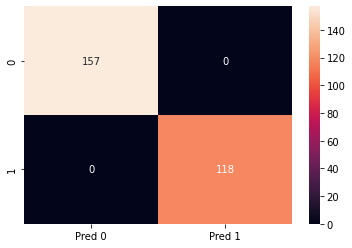

In [97]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(ytest, mlpcypred, labels = [0,1]), columns = ['Pred 0','Pred 1']), annot=True, fmt = 'g')
# Visualing the comparision between predicted and actual using heamap

In [98]:
# No mistakes with MLP Classifier

## *PRINTING ALGORITHM AND ACCURACY SCORE*

In [100]:
print(f'Logistic Regression : {lraccuracies.mean()}')
print(f'SVM with Linear : {svcaccuracies.mean()}')
print(f'SVM with rbf : {svmrbfaccuracies.mean()}')
print(f'Random Forest Classifier : {rfaccuracies.mean()}')
print(f'K Nearest Neigbors Classifier : {kncaccuracies.mean()}')
print(f'Multilayer Perceptron : {mlpcaccuracies.mean()}')

Logistic Regression : 0.9790825688073396
SVM with Linear : 0.9836363636363636
SVM with rbf : 1.0
Random Forest Classifier : 0.9899749791492912
K Nearest Neigbors Classifier : 0.9981818181818183
Multilayer Perceptron : 0.9990909090909093
